In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from datetime import date, timedelta
from sklearn.metrics import mean_squared_error
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [2]:
df_1=pd.read_csv('electricity/1.csv')

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (1,2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_2=pd.read_csv('electricity/2.csv')

In [5]:
df_1['TIMESTAMP']=pd.to_datetime(df_1['timestamp'], unit='s')
df_1['timestamp']=df_1['TIMESTAMP']
df_1.drop('TIMESTAMP',axis=1,inplace=True)
df_1

timestamp        W  VAR         VA          f         VLN  \
0       2013-05-24 00:00:00      0.0  0.0        0.0  49.997299  232.326004   
1       2013-05-24 00:00:01      0.0  0.0        0.0    49.9949  232.326004   
2       2013-05-24 00:00:02      0.0  0.0        0.0    49.9949  232.326004   
3       2013-05-24 00:00:03      0.0  0.0        0.0  49.993099  232.311005   
4       2013-05-24 00:00:04      0.0  0.0        0.0  49.991501  232.292999   
...                     ...      ...  ...        ...        ...         ...   
4391054 2013-08-05 15:33:10  14.8999  0.0  26.733601  50.154499  241.912994   
4391055 2013-08-05 15:33:11  14.8999  0.0  26.733601  50.154499  241.912994   
4391056 2013-08-05 15:33:12  14.9037  0.0  26.712999  50.156399  241.932999   
4391057 2013-08-05 15:33:15  14.9447  0.0  26.755301  50.159901  241.992004   
4391058 2013-08-05 15:33:16  14.9293  0.0    26.7479    50.1586  242.007996   

               PF         A  
0             0.0       0.0  
1             0.0       0.0  
2             0.0       0.0  
3             0.0       0.0  
4             0.0       0.0  
...           ...       ...  
4391054  0.557348  0.110467  
4391055  0.557348  0.110467  
4391056   0.55792  0.110373  
4391057  0.558568   0.11052  
4391058   0.55815  0.110482  

[4391059 rows x 8 columns]

In [6]:
df_2['TIMESTAMP']=pd.to_datetime(df_2['timestamp'], unit='s')
df_2['timestamp']=df_2['TIMESTAMP']
df_2.drop('TIMESTAMP',axis=1,inplace=True)
df_2

timestamp             W           VAR            VA  \
0       2013-05-24 00:00:00    282.744995    -52.148102    295.160004   
1       2013-05-24 00:00:01    288.757996    -59.433601     307.01001   
2       2013-05-24 00:00:02    288.757996    -59.433601     307.01001   
3       2013-05-24 00:00:03    297.394012    -48.224499    313.783997   
4       2013-05-24 00:00:04    303.722992    -55.869999    324.006012   
...                     ...           ...           ...           ...   
4391054 2013-08-05 15:33:10  696.86499023  47.978801727  708.55700684   
4391055 2013-08-05 15:33:11  696.86499023  47.978801727  708.55700684   
4391056 2013-08-05 15:33:12  697.00799561  50.880199432  708.51599121   
4391057 2013-08-05 15:33:15  697.23797607  50.386001587  704.03997803   
4391058 2013-08-05 15:33:16            \N            \N            \N   

                 f         VLN            PF             A  
0        49.997299  232.326004     -0.957937       1.27063  
1          49.9949  232.326004     -0.940548       1.32164  
2          49.9949  232.326004     -0.940548       1.32164  
3        49.993099  232.311005     -0.947768       1.35088  
4        49.991501  232.292999       -0.9374       1.39499  
...            ...         ...           ...           ...  
4391054  50.154499  241.912994  0.9835000038  2.9300899506  
4391055  50.154499  241.912994  0.9835000038  2.9300899506  
4391056  50.156399  241.932999  0.9837579727  2.9296700954  
4391057  50.159901  241.992004  0.9903389812   2.910490036  
4391058    50.1586  242.007996            \N            \N  

[4391059 rows x 8 columns]

In [7]:
df_1.drop(['A','PF','f','VA','VAR','VLN'],axis=1,inplace=True)
df_2.drop(['A','PF','f','VA','VAR','VLN'],axis=1,inplace=True)

In [8]:
df_1.rename(columns={"timestamp": "Timestamp", "W": "W1"},inplace=True)
df_1

Timestamp       W1
0       2013-05-24 00:00:00      0.0
1       2013-05-24 00:00:01      0.0
2       2013-05-24 00:00:02      0.0
3       2013-05-24 00:00:03      0.0
4       2013-05-24 00:00:04      0.0
...                     ...      ...
4391054 2013-08-05 15:33:10  14.8999
4391055 2013-08-05 15:33:11  14.8999
4391056 2013-08-05 15:33:12  14.9037
4391057 2013-08-05 15:33:15  14.9447
4391058 2013-08-05 15:33:16  14.9293

[4391059 rows x 2 columns]

In [9]:
df_2.rename(columns={"timestamp": "time", "W": "W2"},inplace=True)
df_2

time            W2
0       2013-05-24 00:00:00    282.744995
1       2013-05-24 00:00:01    288.757996
2       2013-05-24 00:00:02    288.757996
3       2013-05-24 00:00:03    297.394012
4       2013-05-24 00:00:04    303.722992
...                     ...           ...
4391054 2013-08-05 15:33:10  696.86499023
4391055 2013-08-05 15:33:11  696.86499023
4391056 2013-08-05 15:33:12  697.00799561
4391057 2013-08-05 15:33:15  697.23797607
4391058 2013-08-05 15:33:16            \N

[4391059 rows x 2 columns]

In [11]:
df = pd.concat([df_1,df_2],axis=1)

In [12]:
df.drop('time',axis=1,inplace=True)

In [13]:
df['W1']=pd.to_numeric(df['W1'], errors='coerce')
df['W2']=pd.to_numeric(df['W2'], errors='coerce')

In [14]:
df

Timestamp       W1          W2
0       2013-05-24 00:00:00   0.0000  282.744995
1       2013-05-24 00:00:01   0.0000  288.757996
2       2013-05-24 00:00:02   0.0000  288.757996
3       2013-05-24 00:00:03   0.0000  297.394012
4       2013-05-24 00:00:04   0.0000  303.722992
...                     ...      ...         ...
4391054 2013-08-05 15:33:10  14.8999  696.864990
4391055 2013-08-05 15:33:11  14.8999  696.864990
4391056 2013-08-05 15:33:12  14.9037  697.007996
4391057 2013-08-05 15:33:15  14.9447  697.237976
4391058 2013-08-05 15:33:16  14.9293         NaN

[4391059 rows x 3 columns]

In [15]:
df.isnull().sum()

Timestamp     0
W1           20
W2           48
dtype: int64

In [16]:
df = df.fillna(0)

In [17]:
df['W']=df['W1']+df['W2']
df

Timestamp       W1          W2           W
0       2013-05-24 00:00:00   0.0000  282.744995  282.744995
1       2013-05-24 00:00:01   0.0000  288.757996  288.757996
2       2013-05-24 00:00:02   0.0000  288.757996  288.757996
3       2013-05-24 00:00:03   0.0000  297.394012  297.394012
4       2013-05-24 00:00:04   0.0000  303.722992  303.722992
...                     ...      ...         ...         ...
4391054 2013-08-05 15:33:10  14.8999  696.864990  711.764891
4391055 2013-08-05 15:33:11  14.8999  696.864990  711.764891
4391056 2013-08-05 15:33:12  14.9037  697.007996  711.911695
4391057 2013-08-05 15:33:15  14.9447  697.237976  712.182676
4391058 2013-08-05 15:33:16  14.9293    0.000000   14.929300

[4391059 rows x 4 columns]

In [18]:
df.isnull().sum()

Timestamp    0
W1           0
W2           0
W            0
dtype: int64

In [19]:
(df['W']<0).sum()

0

In [20]:
df.drop(['W1','W2'],axis=1,inplace=True)

In [21]:
df

Timestamp           W
0       2013-05-24 00:00:00  282.744995
1       2013-05-24 00:00:01  288.757996
2       2013-05-24 00:00:02  288.757996
3       2013-05-24 00:00:03  297.394012
4       2013-05-24 00:00:04  303.722992
...                     ...         ...
4391054 2013-08-05 15:33:10  711.764891
4391055 2013-08-05 15:33:11  711.764891
4391056 2013-08-05 15:33:12  711.911695
4391057 2013-08-05 15:33:15  712.182676
4391058 2013-08-05 15:33:16   14.929300

[4391059 rows x 2 columns]

0       2013-05-24 00:00:00
1       2013-05-24 00:00:01
2       2013-05-24 00:00:02
3       2013-05-24 00:00:03
4       2013-05-24 00:00:04
                ...        
78286   2013-05-24 23:59:55
78287   2013-05-24 23:59:56
78288   2013-05-24 23:59:57
78289   2013-05-24 23:59:58
78290   2013-05-24 23:59:59
Name: Timestamp, Length: 78291, dtype: datetime64[ns]


<ipython-input-22-cf70769aa5cb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-22-cf70769aa5cb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

      Timestamp           W
0      00:00:00  282.744995
1      00:00:01  288.757996
2      00:00:02  288.757996
3      00:00:03  297.394012
4      00:00:04  303.722992
...         ...         ...
78286  23:59:55  248.084000
78287  23:59:56  253.901001
78288  23:59:57  247.904999
78289  23:59:58  254.763000
78290  23:59:59  255.453003

[78291 rows x 2 columns]


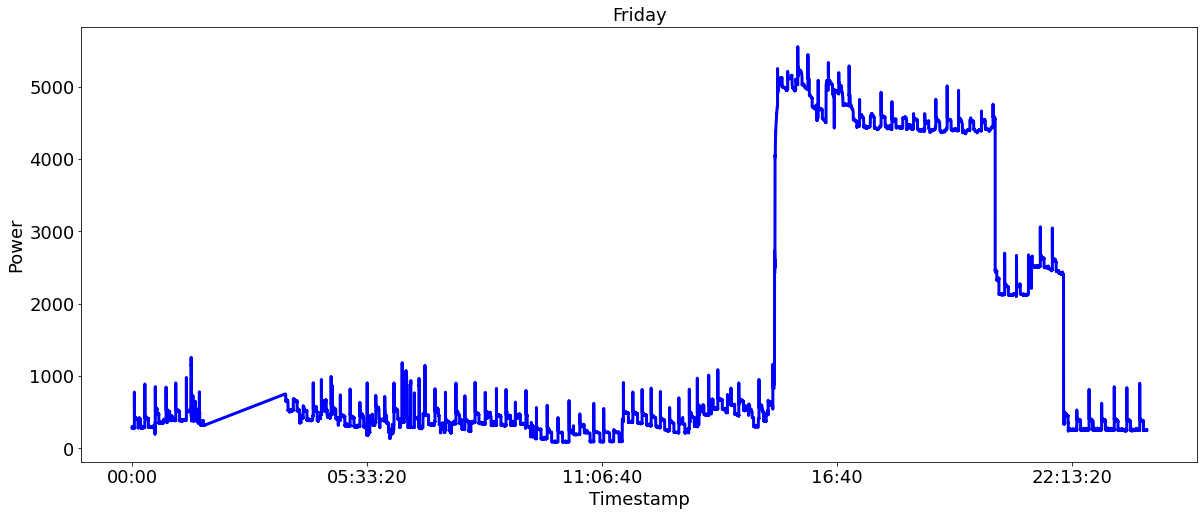

78291    2013-05-25 00:00:00
78292    2013-05-25 00:00:01
78293    2013-05-25 00:00:02
78294    2013-05-25 00:00:03
78295    2013-05-25 00:00:04
                 ...        
149443   2013-05-25 23:59:55
149444   2013-05-25 23:59:56
149445   2013-05-25 23:59:57
149446   2013-05-25 23:59:58
149447   2013-05-25 23:59:59
Name: Timestamp, Length: 71157, dtype: datetime64[ns]


<ipython-input-22-cf70769aa5cb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-22-cf70769aa5cb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

       Timestamp           W
78291   00:00:00  255.188004
78292   00:00:01  255.188004
78293   00:00:02  255.253006
78294   00:00:03  266.376007
78295   00:00:04  266.813995
...          ...         ...
149443  23:59:55  275.822804
149444  23:59:56  267.569397
149445  23:59:57  267.814402
149446  23:59:58  273.576996
149447  23:59:59  273.822387

[71157 rows x 2 columns]


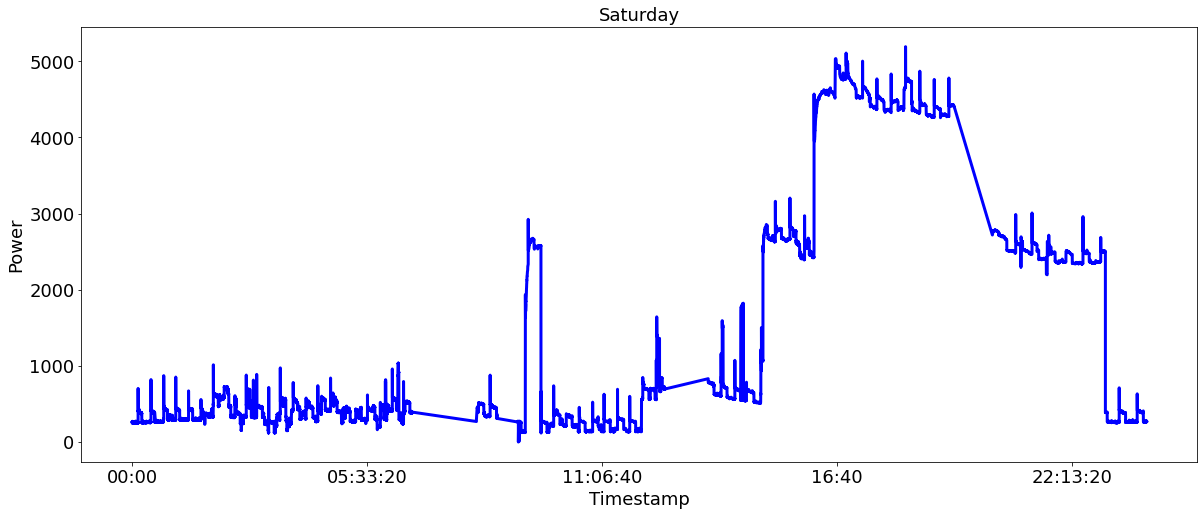

149448   2013-05-26 00:00:00
149449   2013-05-26 00:00:01
149450   2013-05-26 00:00:02
149451   2013-05-26 00:00:03
149452   2013-05-26 00:00:04
                 ...        
230296   2013-05-26 23:59:55
230297   2013-05-26 23:59:56
230298   2013-05-26 23:59:57
230299   2013-05-26 23:59:58
230300   2013-05-26 23:59:59
Name: Timestamp, Length: 80853, dtype: datetime64[ns]
       Timestamp           W
149448  00:00:00  273.822387
149449  00:00:01  262.673793
149450  00:00:02  290.591688
149451  00:00:03  290.591688
149452  00:00:04  279.590700
...          ...         ...
230296  23:59:55  256.128895
230297  23:59:56  255.910598
230298  23:59:57  249.545607
230299  23:59:58  249.387499
230300  23:59:59  249.409401

[80853 rows x 2 columns]


<ipython-input-22-cf70769aa5cb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-22-cf70769aa5cb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

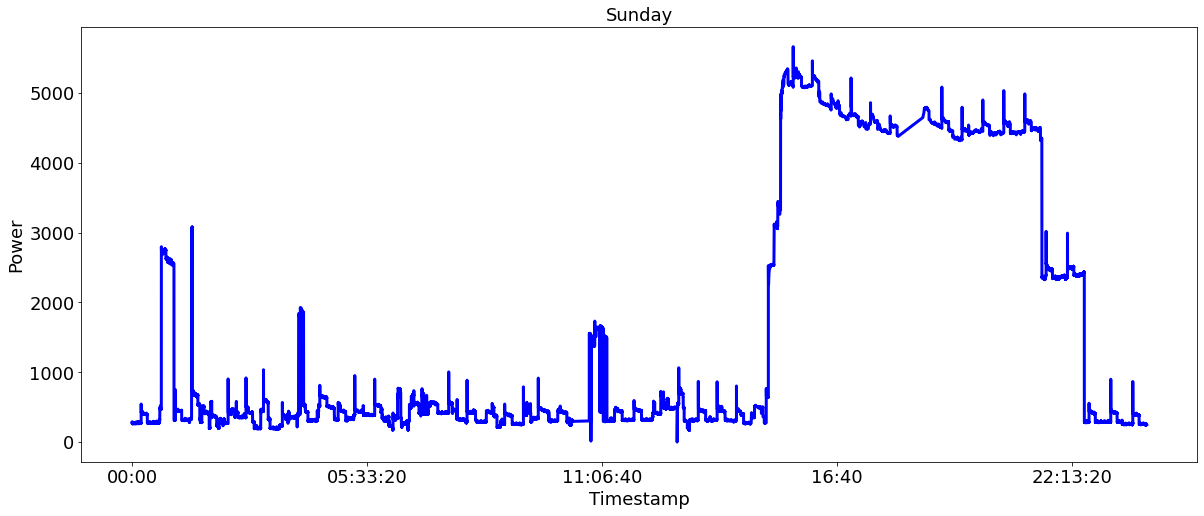

230301   2013-05-27 00:00:00
230302   2013-05-27 00:00:01
230303   2013-05-27 00:00:02
230304   2013-05-27 00:00:03
230305   2013-05-27 00:00:04
                 ...        
310983   2013-05-27 23:59:55
310984   2013-05-27 23:59:56
310985   2013-05-27 23:59:57
310986   2013-05-27 23:59:58
310987   2013-05-27 23:59:59
Name: Timestamp, Length: 80687, dtype: datetime64[ns]
       Timestamp           W
230301  00:00:00  249.732500
230302  00:00:01  257.600996
230303  00:00:02  256.908694
230304  00:00:03  267.974907
230305  00:00:04  267.732100
...          ...         ...
310983  23:59:55  303.738397
310984  23:59:56  303.738397
310985  23:59:57  303.648394
310986  23:59:58  303.019691
310987  23:59:59  296.555808

[80687 rows x 2 columns]


<ipython-input-22-cf70769aa5cb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-22-cf70769aa5cb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

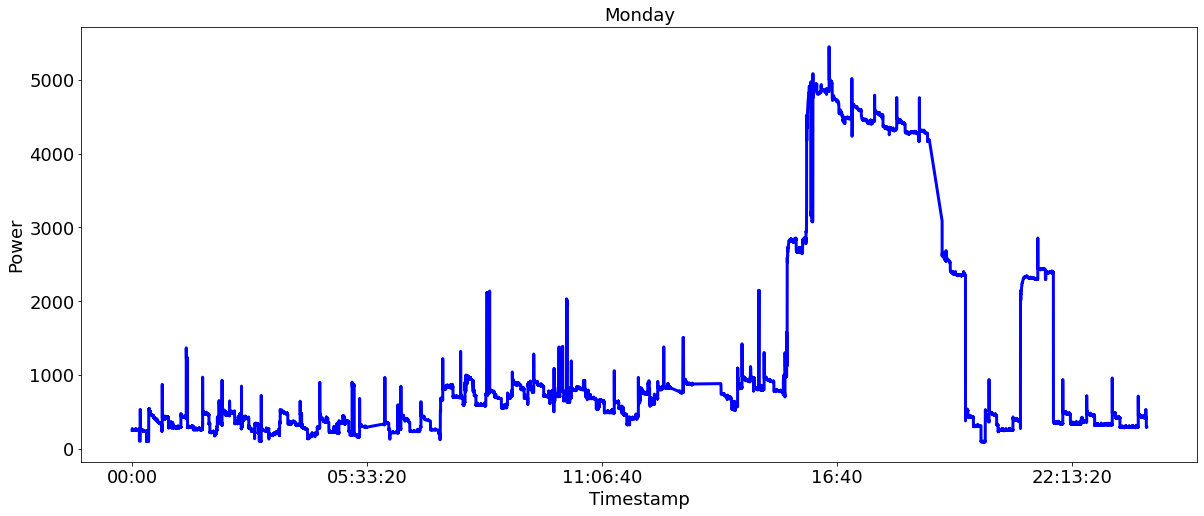

310988   2013-05-28 00:00:00
310989   2013-05-28 00:00:01
310990   2013-05-28 00:00:02
310991   2013-05-28 00:00:03
310992   2013-05-28 00:00:04
                 ...        
386542   2013-05-28 23:59:55
386543   2013-05-28 23:59:56
386544   2013-05-28 23:59:57
386545   2013-05-28 23:59:58
386546   2013-05-28 23:59:59
Name: Timestamp, Length: 75559, dtype: datetime64[ns]
       Timestamp           W
310988  00:00:00  296.442713
310989  00:00:01  296.442713
310990  00:00:02  313.063396
310991  00:00:03  313.211404
310992  00:00:04  313.426393
...          ...         ...
386542  23:59:55  288.552594
386543  23:59:56  288.404687
386544  23:59:57  288.322886
386545  23:59:58  288.998806
386546  23:59:59  288.861897

[75559 rows x 2 columns]


<ipython-input-22-cf70769aa5cb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-22-cf70769aa5cb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

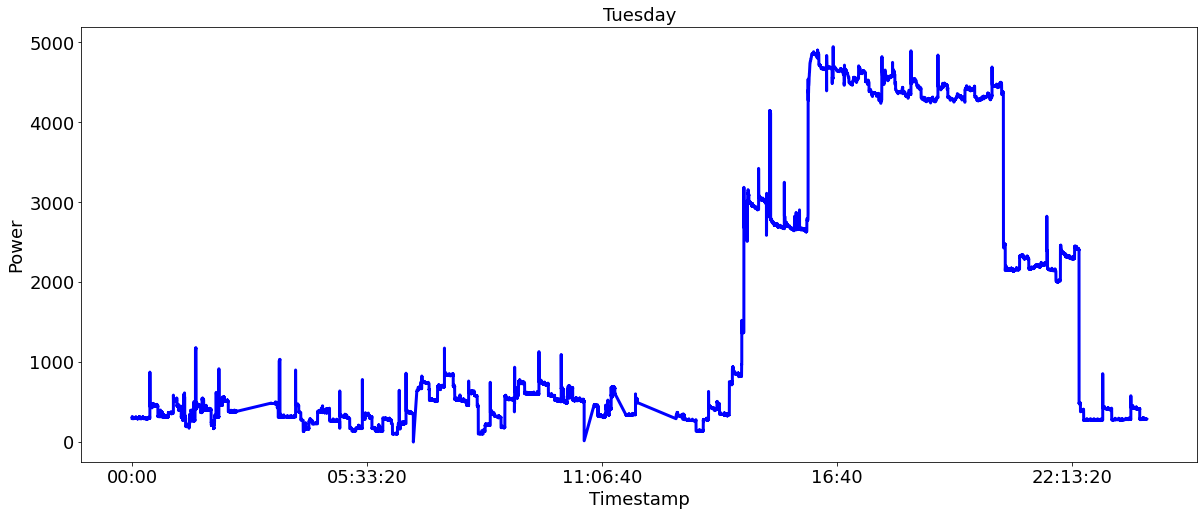

386547   2013-05-29 00:00:00
386548   2013-05-29 00:00:01
386549   2013-05-29 00:00:02
386550   2013-05-29 00:00:03
386551   2013-05-29 00:00:04
                 ...        
464041   2013-05-29 23:59:55
464042   2013-05-29 23:59:56
464043   2013-05-29 23:59:57
464044   2013-05-29 23:59:58
464045   2013-05-29 23:59:59
Name: Timestamp, Length: 77499, dtype: datetime64[ns]
       Timestamp           W
386547  00:00:00  287.725703
386548  00:00:01  287.656611
386549  00:00:02  299.685192
386550  00:00:03  299.883005
386551  00:00:04  300.193010
...          ...         ...
464041  23:59:55  413.681509
464042  23:59:56  412.816197
464043  23:59:57  413.623001
464044  23:59:58  413.623001
464045  23:59:59  413.656903

[77499 rows x 2 columns]


<ipython-input-22-cf70769aa5cb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-22-cf70769aa5cb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

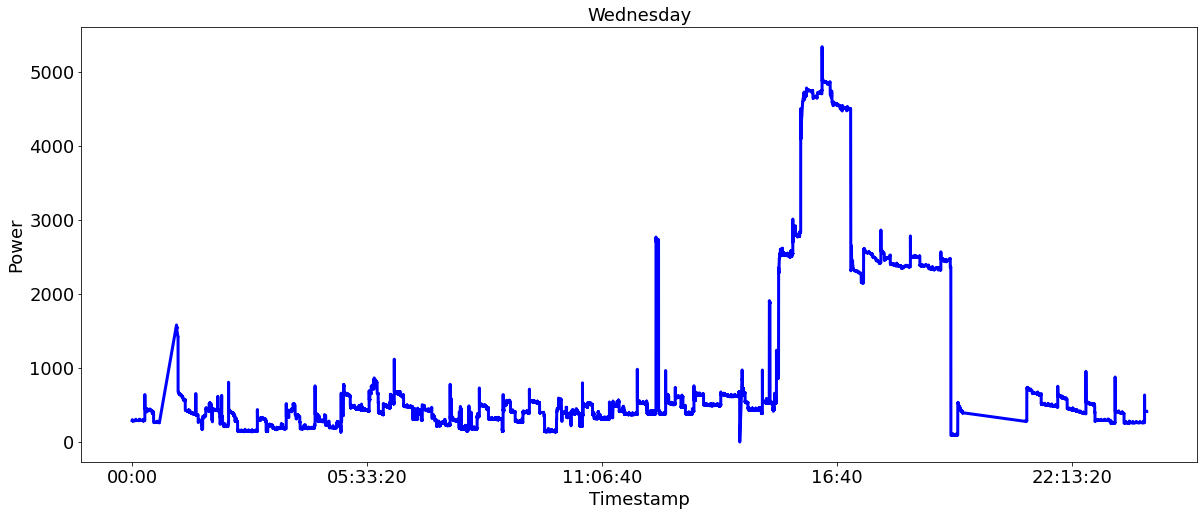

464046   2013-05-30 00:00:00
464047   2013-05-30 00:00:01
464048   2013-05-30 00:00:02
464049   2013-05-30 00:00:03
464050   2013-05-30 00:00:04
                 ...        
547029   2013-05-30 23:59:55
547030   2013-05-30 23:59:56
547031   2013-05-30 23:59:57
547032   2013-05-30 23:59:58
547033   2013-05-30 23:59:59
Name: Timestamp, Length: 82988, dtype: datetime64[ns]
       Timestamp           W
464046  00:00:00  412.761185
464047  00:00:01  412.931504
464048  00:00:02  412.931504
464049  00:00:03  429.638798
464050  00:00:04  428.324586
...          ...         ...
547029  23:59:55  429.429515
547030  23:59:56  429.345806
547031  23:59:57  428.525597
547032  23:59:58  428.529099
547033  23:59:59  429.543988

[82988 rows x 2 columns]


<ipython-input-22-cf70769aa5cb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-22-cf70769aa5cb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

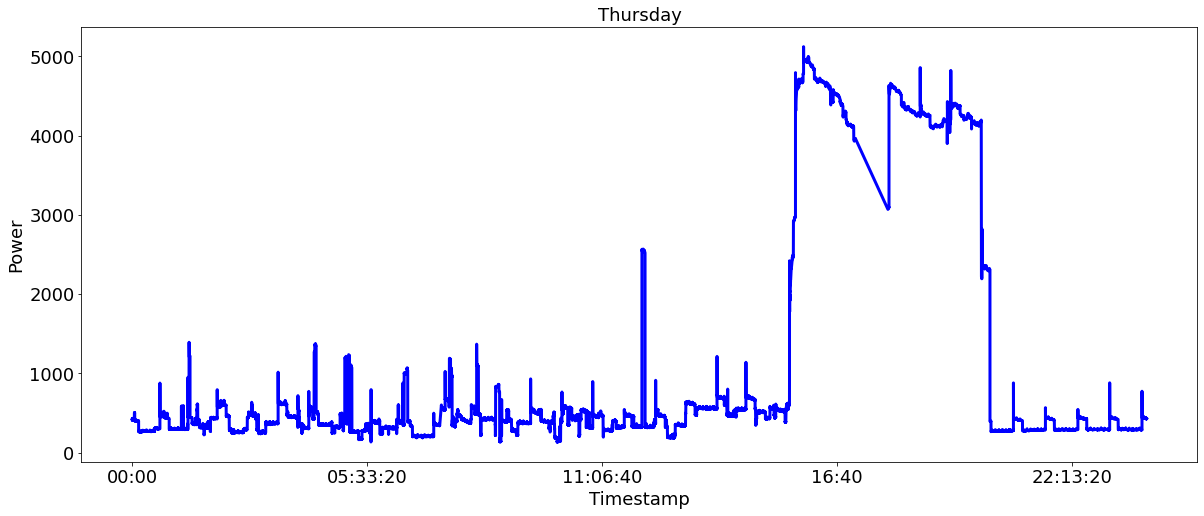

547034   2013-05-31 00:00:00
547035   2013-05-31 00:00:01
547036   2013-05-31 00:00:02
547037   2013-05-31 00:00:03
547038   2013-05-31 00:00:04
                 ...        
598961   2013-05-31 23:59:53
598962   2013-05-31 23:59:55
598963   2013-05-31 23:59:56
598964   2013-05-31 23:59:57
598965   2013-05-31 23:59:59
Name: Timestamp, Length: 51932, dtype: datetime64[ns]


<ipython-input-22-cf70769aa5cb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-22-cf70769aa5cb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

       Timestamp           W
547034  00:00:00  428.395396
547035  00:00:01  428.445488
547036  00:00:02  435.981390
547037  00:00:03  443.763289
547038  00:00:04  443.014308
...          ...         ...
598961  23:59:53  304.302500
598962  23:59:55  303.871311
598963  23:59:56  305.204215
598964  23:59:57  305.326701
598965  23:59:59  304.692285

[51932 rows x 2 columns]


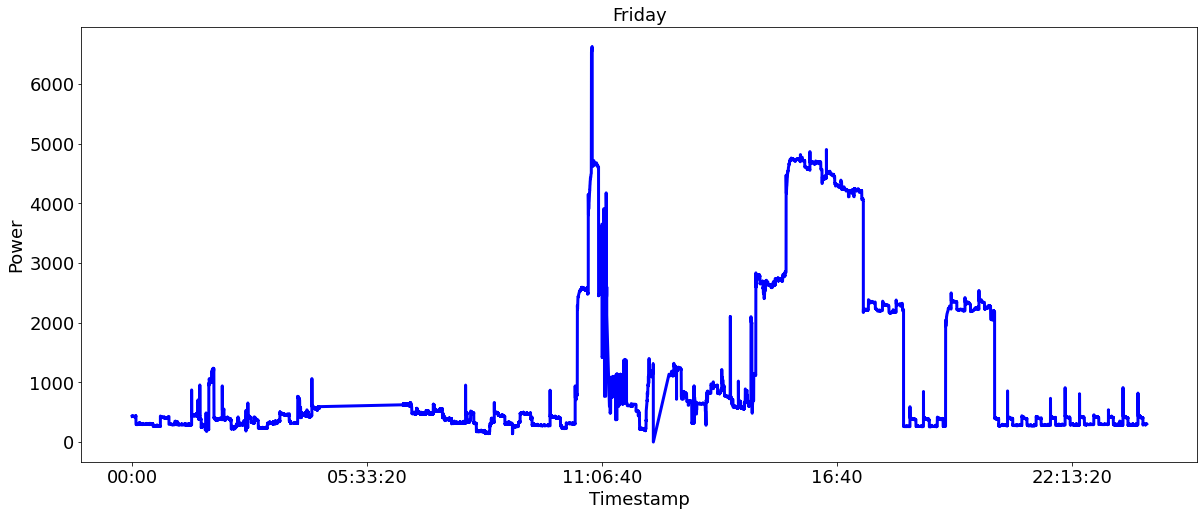

In [22]:
x=0
for i in range (24,32):
    start = pd.to_datetime(date(2013,5,i))
    end = start + timedelta(days=1)
    day = start.day_name()
    x = x + 1
    df_1 = df[(df['Timestamp'] >=start) & (df['Timestamp'] < end)]
    print( df_1['Timestamp'])
    df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
    df_1['Timestamp']=df_1['Time']
    df_1.drop('Time',axis=1,inplace=True)
    print(df_1)
    df_1.groupby('Timestamp')['W'].sum().plot(kind='line',linewidth= 3,figsize=(20,8),color='blue',fontsize=18)
    plt.ylabel('Power',fontsize=18)
    plt.xlabel('Timestamp',fontsize=18)
    plt.title(day,fontsize=18)
    plt.show()
    df_1.to_csv(r'Dataset_combined/Day{0}_{1}.csv'.format(x,day))

598966   2013-06-01 00:00:00
598967   2013-06-01 00:00:01
598968   2013-06-01 00:00:03
598969   2013-06-01 00:00:04
598970   2013-06-01 00:00:05
                 ...        
631288   2013-06-01 16:39:12
631289   2013-06-01 16:39:15
631290   2013-06-01 16:39:16
631291   2013-06-01 16:39:19
631292   2013-06-01 16:39:20
Name: Timestamp, Length: 32327, dtype: datetime64[ns]
       Timestamp            W
598966  00:00:00   304.766012
598967  00:00:01   305.869788
598968  00:00:03   323.646985
598969  00:00:04   323.581491
598970  00:00:05   323.236514
...          ...          ...
631288  16:39:12  4235.829956
631289  16:39:15  4234.309936
631290  16:39:16  4233.939941
631291  16:39:19  4233.150024
631292  16:39:20  4233.070068

[32327 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

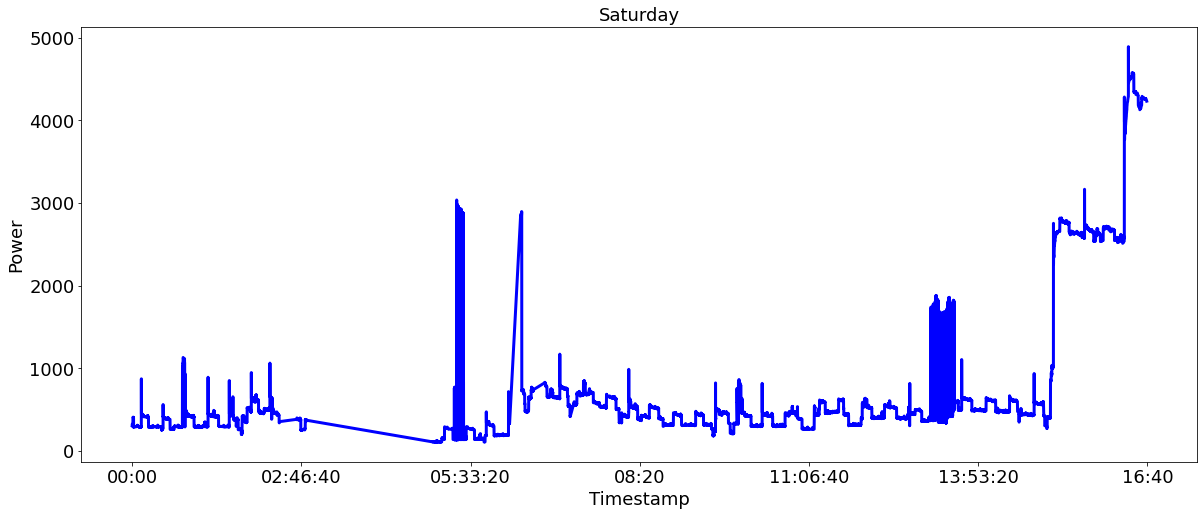

631293   2013-06-02 01:19:00
631294   2013-06-02 01:19:01
631295   2013-06-02 01:19:02
631296   2013-06-02 01:19:19
631297   2013-06-02 01:19:20
                 ...        
686349   2013-06-02 23:59:54
686350   2013-06-02 23:59:55
686351   2013-06-02 23:59:57
686352   2013-06-02 23:59:58
686353   2013-06-02 23:59:59
Name: Timestamp, Length: 55061, dtype: datetime64[ns]
       Timestamp           W
631293  01:19:00  497.800186
631294  01:19:01  503.450506
631295  01:19:02  504.444398
631296  01:19:19  496.887599
631297  01:19:20  502.858292
...          ...         ...
686349  23:59:54  316.222397
686350  23:59:55  316.236405
686351  23:59:57  318.409685
686352  23:59:58  317.792009
686353  23:59:59  310.719699

[55061 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

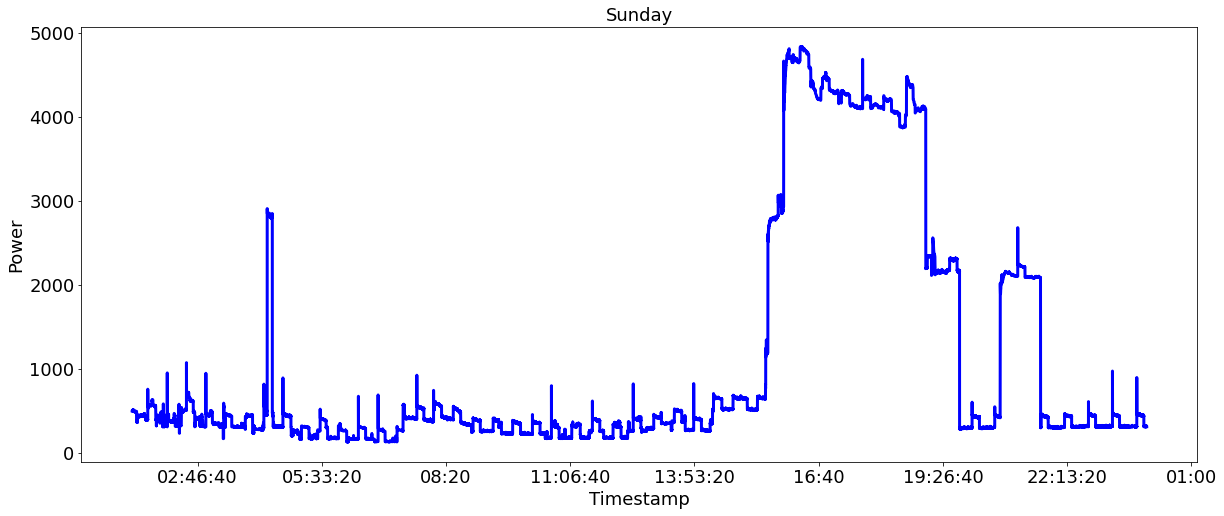

686354   2013-06-03 00:00:00
686355   2013-06-03 00:00:04
686356   2013-06-03 00:00:05
686357   2013-06-03 00:00:06
686358   2013-06-03 00:00:08
                 ...        
751817   2013-06-03 23:59:53
751818   2013-06-03 23:59:54
751819   2013-06-03 23:59:55
751820   2013-06-03 23:59:56
751821   2013-06-03 23:59:59
Name: Timestamp, Length: 65468, dtype: datetime64[ns]
       Timestamp           W
686354  00:00:00  319.786301
686355  00:00:04  323.498504
686356  00:00:05  323.479105
686357  00:00:06  324.158108
686358  00:00:08  330.339903
...          ...         ...
751817  23:59:53  799.726192
751818  23:59:54  799.735779
751819  23:59:55  800.118309
751820  23:59:56  799.926723
751821  23:59:59  799.313587

[65468 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

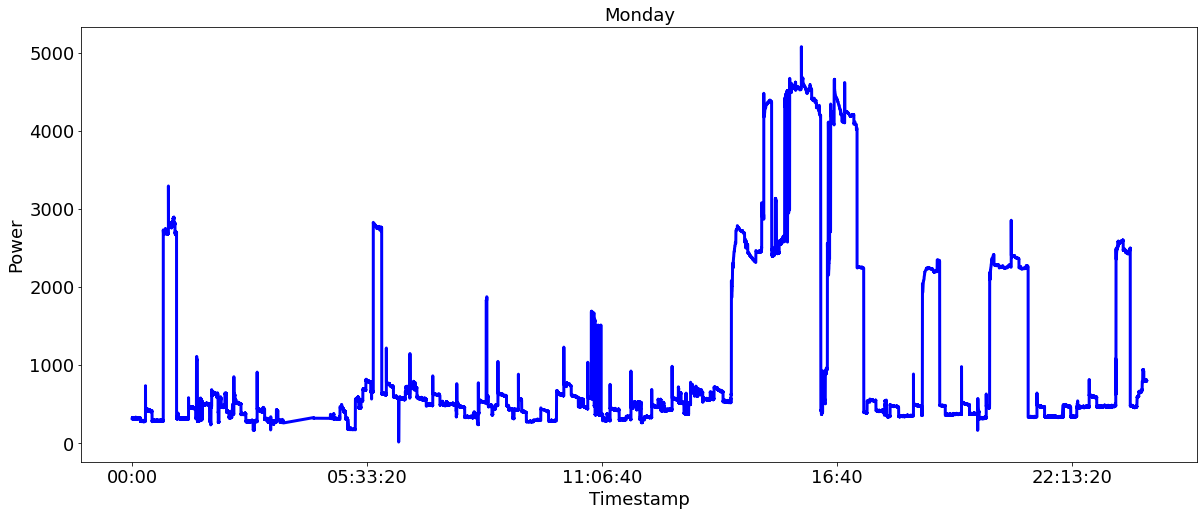

751822   2013-06-04 00:00:00
751823   2013-06-04 00:00:01
751824   2013-06-04 00:00:04
751825   2013-06-04 00:00:05
751826   2013-06-04 00:00:06
                 ...        
799976   2013-06-04 23:59:54
799977   2013-06-04 23:59:55
799978   2013-06-04 23:59:56
799979   2013-06-04 23:59:57
799980   2013-06-04 23:59:59
Name: Timestamp, Length: 48159, dtype: datetime64[ns]
       Timestamp           W
751822  00:00:00  799.218906
751823  00:00:01  799.493771
751824  00:00:04  814.784019
751825  00:00:05  814.524494
751826  00:00:06  801.627102
...          ...         ...
799976  23:59:54  750.411400
799977  23:59:55  743.191093
799978  23:59:56  743.021610
799979  23:59:57  742.830208
799980  23:59:59  742.573730

[48159 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

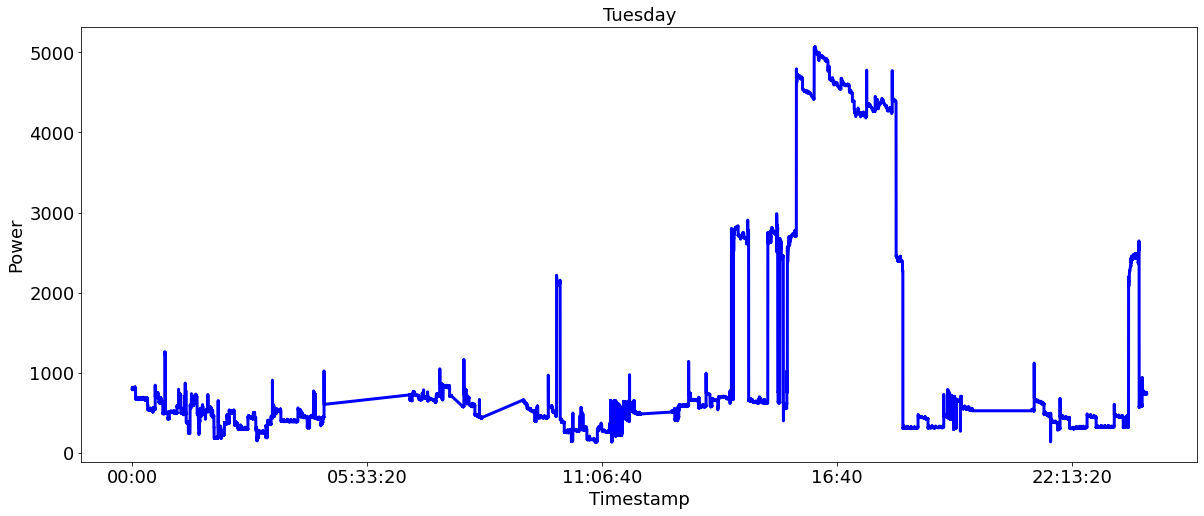

799981   2013-06-05 00:00:00
799982   2013-06-05 00:00:01
799983   2013-06-05 00:00:02
799984   2013-06-05 00:00:03
799985   2013-06-05 00:00:04
                 ...        
853239   2013-06-05 23:59:50
853240   2013-06-05 23:59:51
853241   2013-06-05 23:59:53
853242   2013-06-05 23:59:54
853243   2013-06-05 23:59:57
Name: Timestamp, Length: 53263, dtype: datetime64[ns]
       Timestamp            W
799981  00:00:00   742.613804
799982  00:00:01   742.321316
799983  00:00:02   742.397713
799984  00:00:03   754.213173
799985  00:00:04   756.151794
...          ...          ...
853239  23:59:50  2779.469879
853240  23:59:51  2779.355701
853241  23:59:53  2779.462082
853242  23:59:54  2779.394680
853243  23:59:57  2779.305882

[53263 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

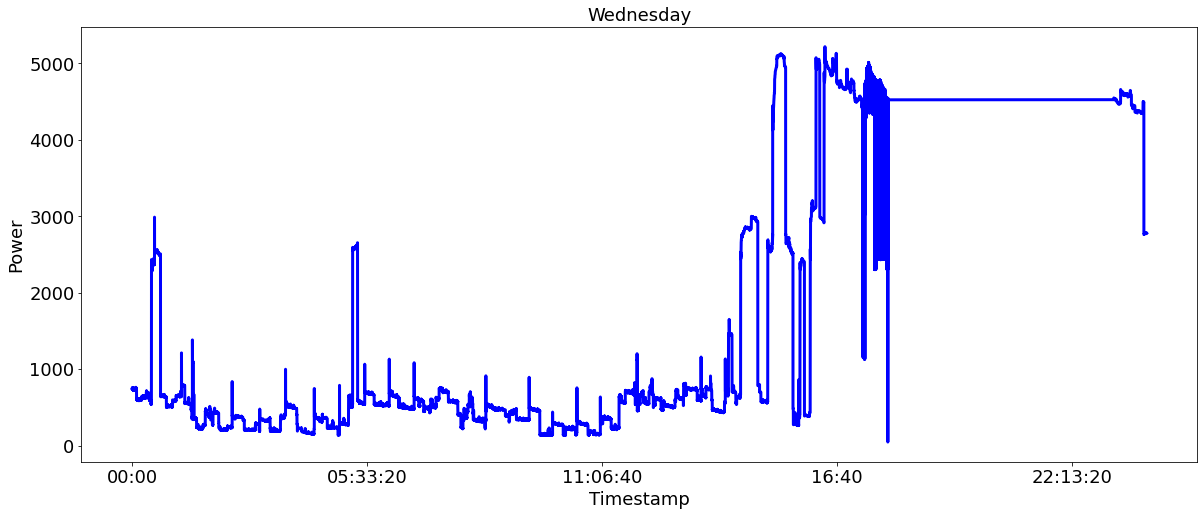

853244   2013-06-06 00:00:02
853245   2013-06-06 00:00:06
853246   2013-06-06 00:00:07
853247   2013-06-06 00:00:10
853248   2013-06-06 00:00:11
                 ...        
897257   2013-06-06 23:59:51
897258   2013-06-06 23:59:52
897259   2013-06-06 23:59:53
897260   2013-06-06 23:59:55
897261   2013-06-06 23:59:56
Name: Timestamp, Length: 44018, dtype: datetime64[ns]
       Timestamp            W
853244  00:00:02  2777.986794
853245  00:00:06  2781.137268
853246  00:00:07  2781.577641
853247  00:00:10  2782.040440
853248  00:00:11  2782.435650
...          ...          ...
897257  23:59:51   315.834307
897258  23:59:52   315.736094
897259  23:59:53   315.636505
897260  23:59:55   315.652986
897261  23:59:56   315.697187

[44018 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

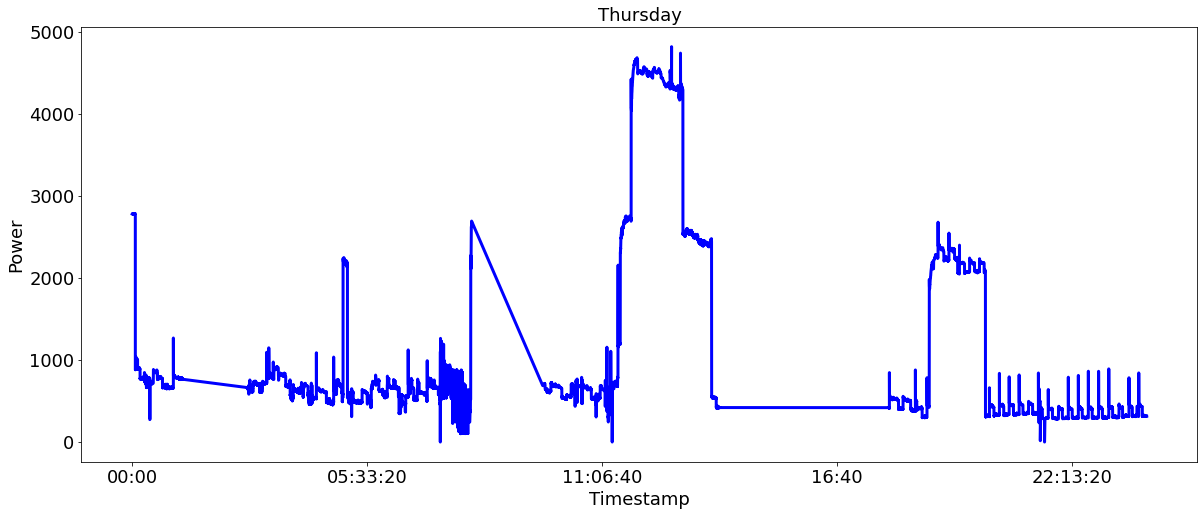

897262   2013-06-07 00:00:00
897263   2013-06-07 00:00:01
897264   2013-06-07 00:00:02
897265   2013-06-07 00:00:03
897266   2013-06-07 00:00:04
                 ...        
963739   2013-06-07 23:59:52
963740   2013-06-07 23:59:55
963741   2013-06-07 23:59:56
963742   2013-06-07 23:59:57
963743   2013-06-07 23:59:59
Name: Timestamp, Length: 66482, dtype: datetime64[ns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

       Timestamp           W
897262  00:00:00  316.165699
897263  00:00:01  314.821399
897264  00:00:02  314.717101
897265  00:00:03  331.514414
897266  00:00:04  331.662205
...          ...         ...
963739  23:59:52  347.612186
963740  23:59:55  347.669312
963741  23:59:56  347.667610
963742  23:59:57  347.774208
963743  23:59:59  347.527309

[66482 rows x 2 columns]


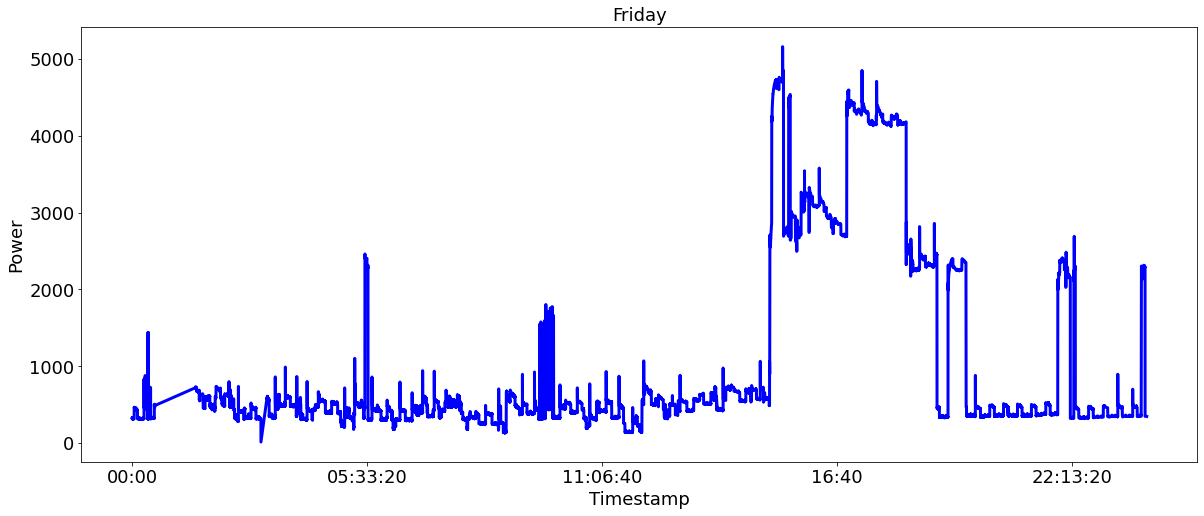

963744    2013-06-08 00:00:00
963745    2013-06-08 00:00:02
963746    2013-06-08 00:00:03
963747    2013-06-08 00:00:04
963748    2013-06-08 00:00:05
                  ...        
1011584   2013-06-08 23:59:55
1011585   2013-06-08 23:59:56
1011586   2013-06-08 23:59:57
1011587   2013-06-08 23:59:58
1011588   2013-06-08 23:59:59
Name: Timestamp, Length: 47845, dtype: datetime64[ns]
        Timestamp           W
963744   00:00:00  347.623806
963745   00:00:02  365.568890
963746   00:00:03  365.349495
963747   00:00:04  365.349495
963748   00:00:05  365.376316
...           ...         ...
1011584  23:59:55  291.262203
1011585  23:59:56  290.673901
1011586  23:59:57  290.631686
1011587  23:59:58  292.170715
1011588  23:59:59  290.899687

[47845 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

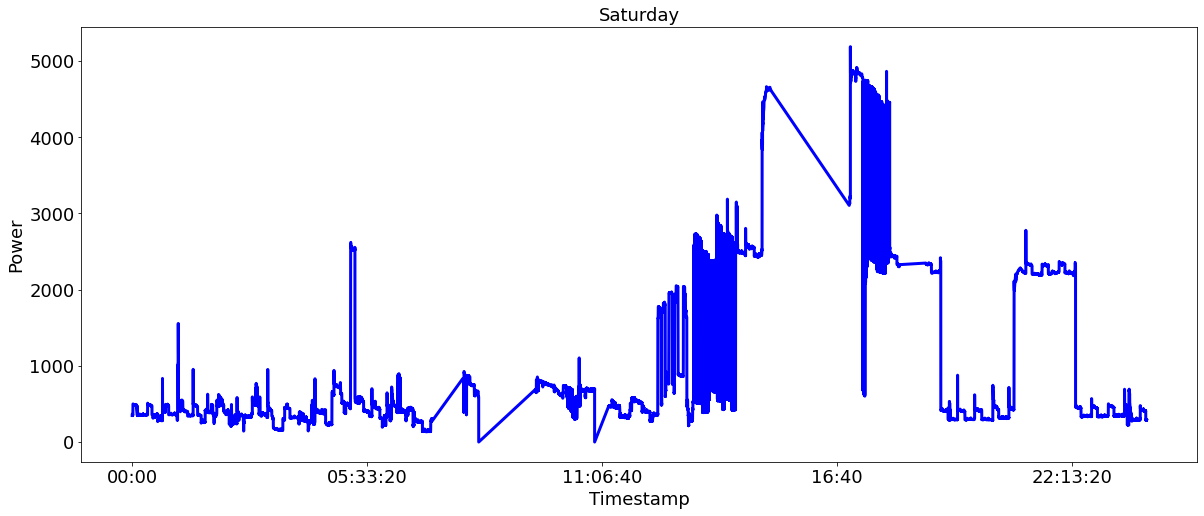

1011589   2013-06-09 00:00:00
1011590   2013-06-09 00:00:01
1011591   2013-06-09 00:00:02
1011592   2013-06-09 00:00:03
1011593   2013-06-09 00:00:04
                  ...        
1065087   2013-06-09 23:59:54
1065088   2013-06-09 23:59:55
1065089   2013-06-09 23:59:56
1065090   2013-06-09 23:59:57
1065091   2013-06-09 23:59:58
Name: Timestamp, Length: 53503, dtype: datetime64[ns]
        Timestamp           W
1011589  00:00:00  291.018507
1011590  00:00:01  290.821997
1011591  00:00:02  291.651500
1011592  00:00:03  306.633387
1011593  00:00:04  306.482000
...           ...         ...
1065087  23:59:54  309.351211
1065088  23:59:55  310.270706
1065089  23:59:56  308.505001
1065090  23:59:57  310.160313
1065091  23:59:58  308.817109

[53503 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

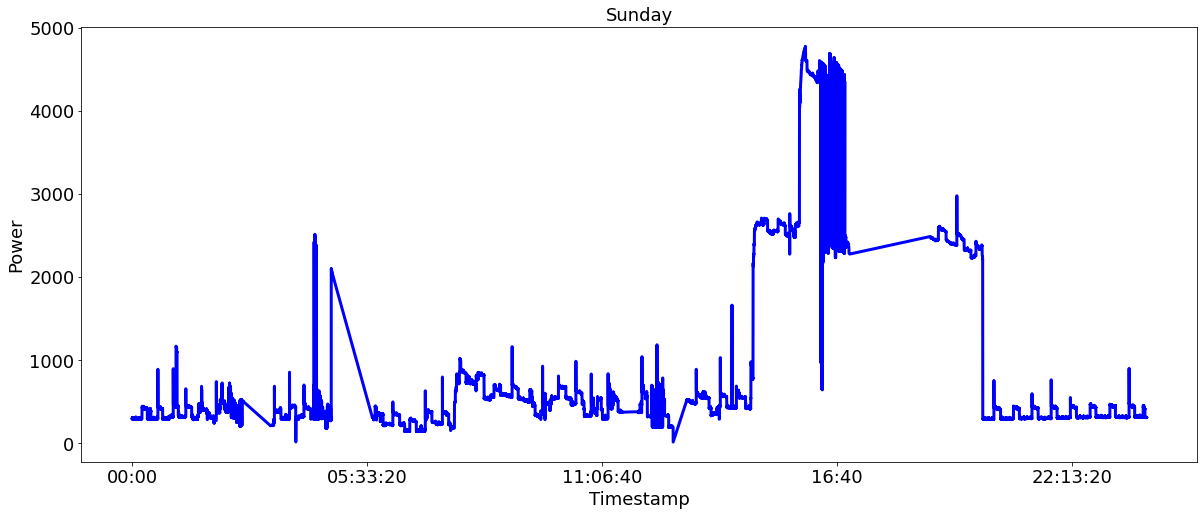

1065092   2013-06-10 00:00:00
1065093   2013-06-10 00:00:01
1065094   2013-06-10 00:00:02
1065095   2013-06-10 00:00:03
1065096   2013-06-10 00:00:04
                  ...        
1121829   2013-06-10 23:59:54
1121830   2013-06-10 23:59:56
1121831   2013-06-10 23:59:57
1121832   2013-06-10 23:59:58
1121833   2013-06-10 23:59:59
Name: Timestamp, Length: 56742, dtype: datetime64[ns]
        Timestamp           W
1065092  00:00:00  309.148314
1065093  00:00:01  310.515100
1065094  00:00:02  309.880889
1065095  00:00:03  325.374599
1065096  00:00:04  325.339001
...           ...         ...
1121829  23:59:54  504.562899
1121830  23:59:56  380.868399
1121831  23:59:57  385.775711
1121832  23:59:58  385.854187
1121833  23:59:59  378.428291

[56742 rows x 2 columns]

<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

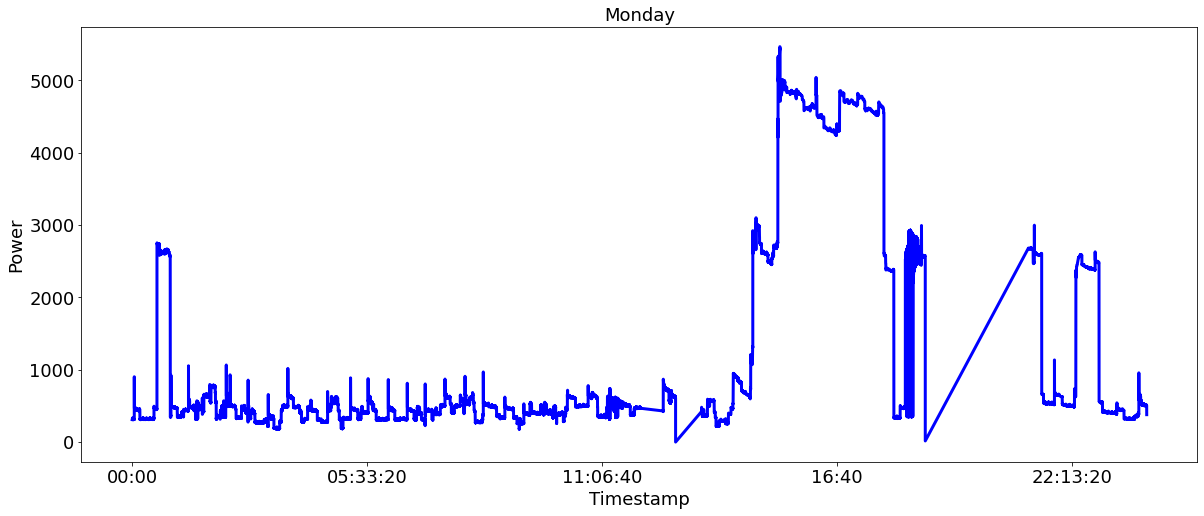

1121834   2013-06-11 00:00:00
1121835   2013-06-11 00:00:01
1121836   2013-06-11 00:00:02
1121837   2013-06-11 00:00:03
1121838   2013-06-11 00:00:04
                  ...        
1179547   2013-06-11 23:59:54
1179548   2013-06-11 23:59:55
1179549   2013-06-11 23:59:57
1179550   2013-06-11 23:59:58
1179551   2013-06-11 23:59:59
Name: Timestamp, Length: 57718, dtype: datetime64[ns]
        Timestamp           W
1121834  00:00:00  383.026590
1121835  00:00:01  378.323708
1121836  00:00:02  378.296993
1121837  00:00:03  396.825695
1121838  00:00:04  396.770205
...           ...         ...
1179547  23:59:54  622.867090
1179548  23:59:55  621.548969
1179549  23:59:57  621.512081
1179550  23:59:58  621.455214
1179551  23:59:59  621.470522

[57718 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

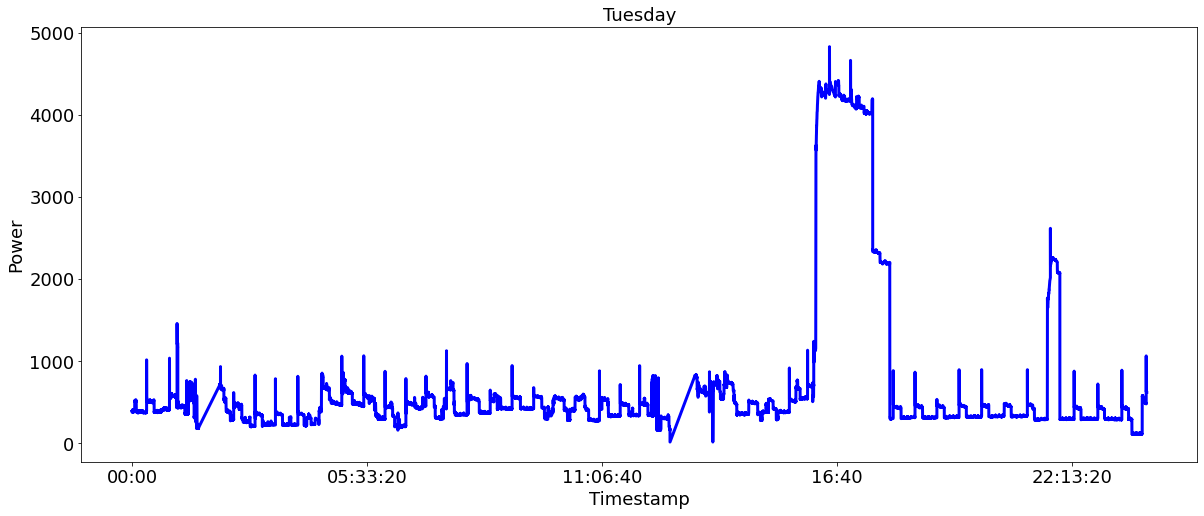

1179552   2013-06-12 00:00:01
1179553   2013-06-12 00:00:02
1179554   2013-06-12 00:00:04
1179555   2013-06-12 00:00:05
1179556   2013-06-12 00:00:07
                  ...        
1229569   2013-06-12 23:59:50
1229570   2013-06-12 23:59:51
1229571   2013-06-12 23:59:52
1229572   2013-06-12 23:59:55
1229573   2013-06-12 23:59:58
Name: Timestamp, Length: 50022, dtype: datetime64[ns]
        Timestamp           W
1179552  00:00:01  621.467897
1179553  00:00:02  621.785217
1179554  00:00:04  638.687408
1179555  00:00:05  638.881992
1179556  00:00:07  645.400330
...           ...         ...
1229569  23:59:50  313.565991
1229570  23:59:51  312.945708
1229571  23:59:52  314.713793
1229572  23:59:55  316.616995
1229573  23:59:58  315.062399

[50022 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

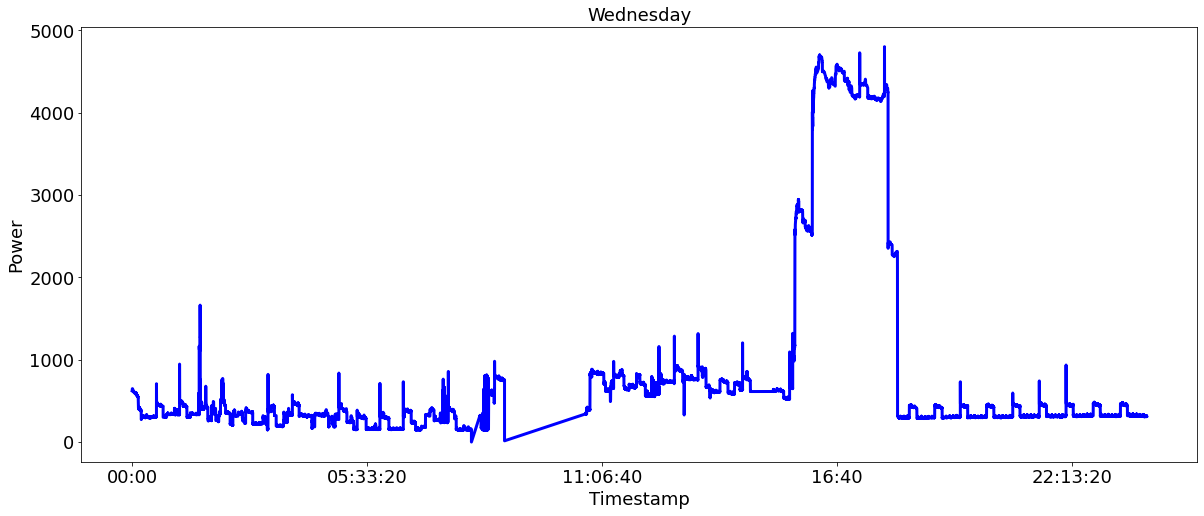

1229574   2013-06-13 00:00:01
1229575   2013-06-13 00:00:02
1229576   2013-06-13 00:00:03
1229577   2013-06-13 00:00:04
1229578   2013-06-13 00:00:05
                  ...        
1299645   2013-06-13 23:59:51
1299646   2013-06-13 23:59:54
1299647   2013-06-13 23:59:55
1299648   2013-06-13 23:59:56
1299649   2013-06-13 23:59:57
Name: Timestamp, Length: 70076, dtype: datetime64[ns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

        Timestamp           W
1229574  00:00:01  314.454589
1229575  00:00:02  314.016898
1229576  00:00:03  335.707098
1229577  00:00:04  335.655207
1229578  00:00:05  334.552489
...           ...         ...
1299645  23:59:51  283.500710
1299646  23:59:54  284.289515
1299647  23:59:55  283.140812
1299648  23:59:56  283.198200
1299649  23:59:57  283.077488

[70076 rows x 2 columns]


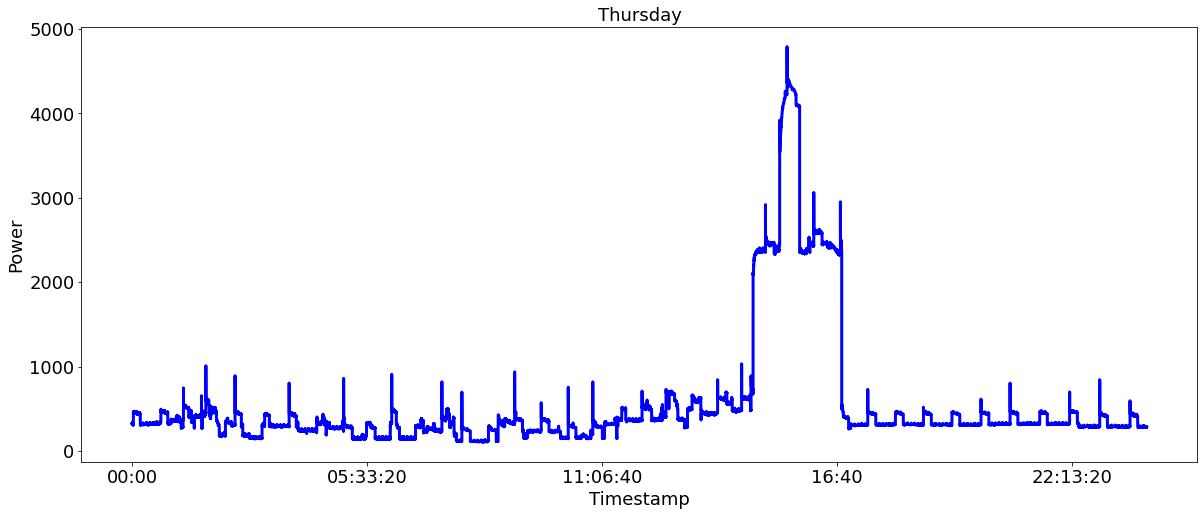

1299650   2013-06-14 00:00:00
1299651   2013-06-14 00:00:01
1299652   2013-06-14 00:00:04
1299653   2013-06-14 00:00:05
1299654   2013-06-14 00:00:08
                  ...        
1365637   2013-06-14 23:59:55
1365638   2013-06-14 23:59:56
1365639   2013-06-14 23:59:57
1365640   2013-06-14 23:59:58
1365641   2013-06-14 23:59:59
Name: Timestamp, Length: 65992, dtype: datetime64[ns]
        Timestamp           W
1299650  00:00:00  282.700590
1299651  00:00:01  283.452713
1299652  00:00:04  304.021786
1299653  00:00:05  303.785595
1299654  00:00:08  296.355915
...           ...         ...
1365637  23:59:55  293.628090
1365638  23:59:56  293.476315
1365639  23:59:57  293.498102
1365640  23:59:58  293.554089
1365641  23:59:59  293.447916

[65992 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

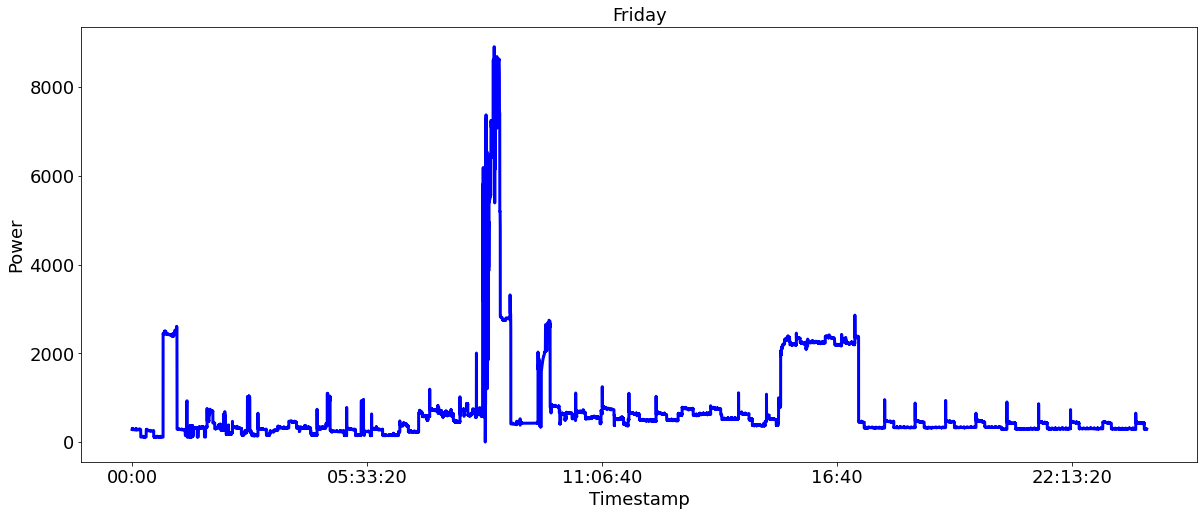

1365642   2013-06-15 00:00:00
1365643   2013-06-15 00:00:02
1365644   2013-06-15 00:00:03
1365645   2013-06-15 00:00:04
1365646   2013-06-15 00:00:06
                  ...        
1440279   2013-06-15 23:59:53
1440280   2013-06-15 23:59:54
1440281   2013-06-15 23:59:55
1440282   2013-06-15 23:59:56
1440283   2013-06-15 23:59:59
Name: Timestamp, Length: 74642, dtype: datetime64[ns]
        Timestamp           W
1365642  00:00:00  293.288614
1365643  00:00:02  293.099001
1365644  00:00:03  306.648010
1365645  00:00:04  306.579988
1365646  00:00:06  306.993307
...           ...         ...
1440279  23:59:53  425.765993
1440280  23:59:54  425.793314
1440281  23:59:55  425.812786
1440282  23:59:56  424.375408
1440283  23:59:59  425.343592

[74642 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

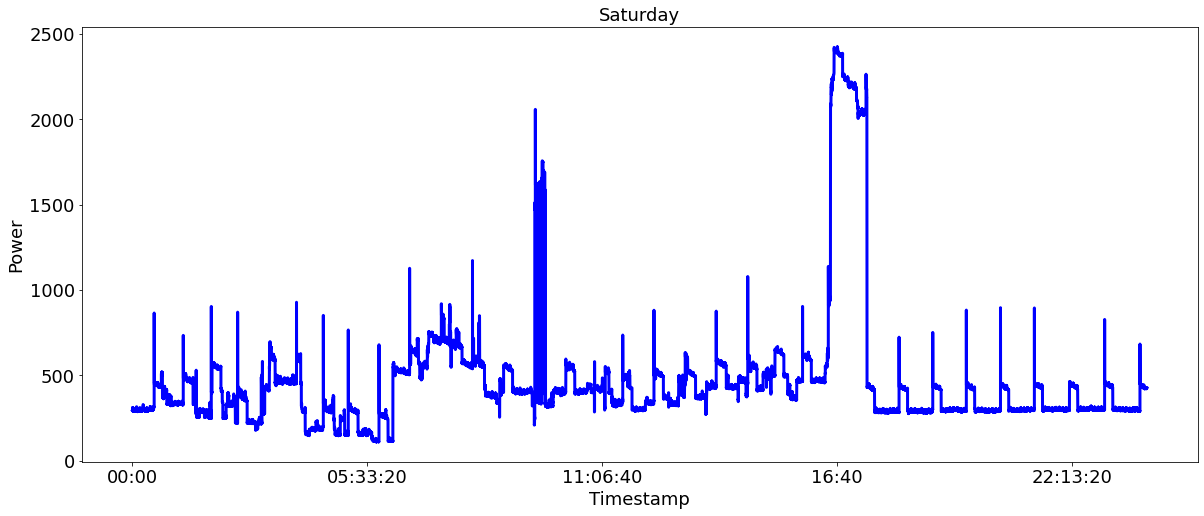

1440284   2013-06-16 00:00:00
1440285   2013-06-16 00:00:01
1440286   2013-06-16 00:00:02
1440287   2013-06-16 00:00:03
1440288   2013-06-16 00:00:04
                  ...        
1488496   2013-06-16 23:59:54
1488497   2013-06-16 23:59:56
1488498   2013-06-16 23:59:57
1488499   2013-06-16 23:59:58
1488500   2013-06-16 23:59:59
Name: Timestamp, Length: 48217, dtype: datetime64[ns]
        Timestamp           W
1440284  00:00:00  425.311686
1440285  00:00:01  425.249801
1440286  00:00:02  426.235189
1440287  00:00:03  440.586813
1440288  00:00:04  440.778587
...           ...         ...
1488496  23:59:54  305.687886
1488497  23:59:56  306.174789
1488498  23:59:57  305.491397
1488499  23:59:58  298.811993
1488500  23:59:59  306.947504

[48217 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

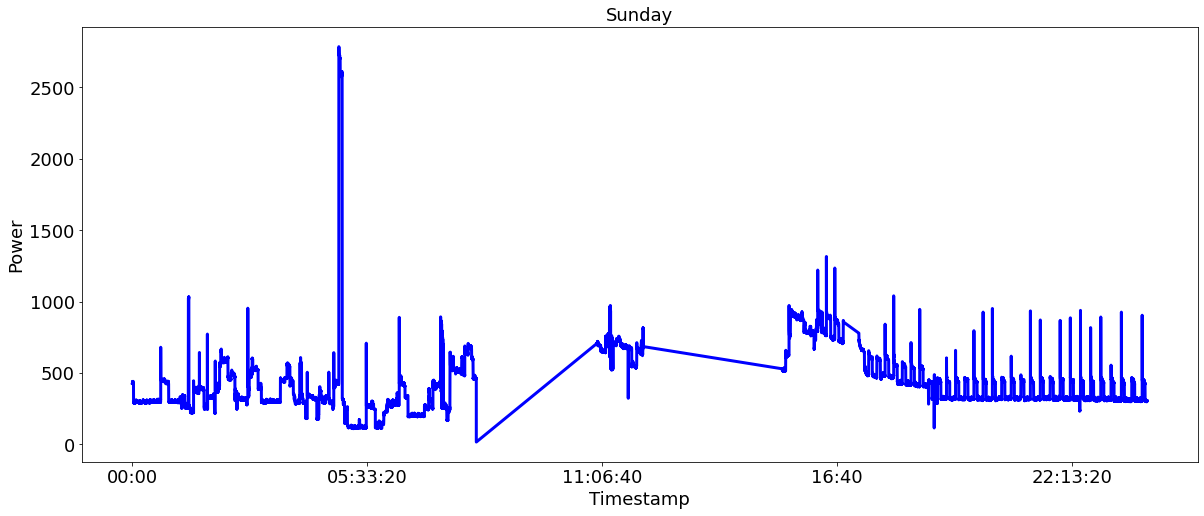

1488501   2013-06-17 00:00:00
1488502   2013-06-17 00:00:01
1488503   2013-06-17 00:00:03
1488504   2013-06-17 00:00:04
1488505   2013-06-17 00:00:05
                  ...        
1560820   2013-06-17 23:59:55
1560821   2013-06-17 23:59:56
1560822   2013-06-17 23:59:57
1560823   2013-06-17 23:59:58
1560824   2013-06-17 23:59:59
Name: Timestamp, Length: 72324, dtype: datetime64[ns]
        Timestamp           W
1488501  00:00:00  308.062093
1488502  00:00:01  307.809196
1488503  00:00:03  318.641493
1488504  00:00:04  318.863207
1488505  00:00:05  316.715888
...           ...         ...
1560820  23:59:55  301.955496
1560821  23:59:56  302.042398
1560822  23:59:57  303.084492
1560823  23:59:58  301.721109
1560824  23:59:59  301.735191

[72324 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

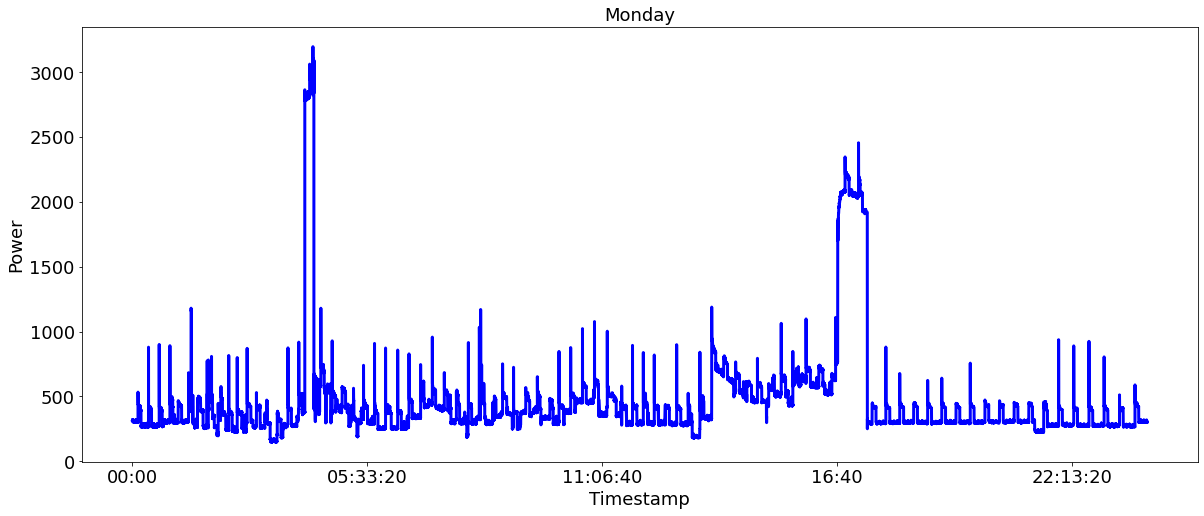

1560825   2013-06-18 00:00:00
1560826   2013-06-18 00:00:01
1560827   2013-06-18 00:00:02
1560828   2013-06-18 00:00:03
1560829   2013-06-18 00:00:04
                  ...        
1633213   2013-06-18 23:59:54
1633214   2013-06-18 23:59:55
1633215   2013-06-18 23:59:57
1633216   2013-06-18 23:59:58
1633217   2013-06-18 23:59:59
Name: Timestamp, Length: 72393, dtype: datetime64[ns]
        Timestamp           W
1560825  00:00:00  301.735191
1560826  00:00:01  301.471115
1560827  00:00:02  308.536985
1560828  00:00:03  318.345694
1560829  00:00:04  318.338886
...           ...         ...
1633213  23:59:54  263.610193
1633214  23:59:55  263.524700
1633215  23:59:57  263.586905
1633216  23:59:58  259.802498
1633217  23:59:59  266.864199

[72393 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

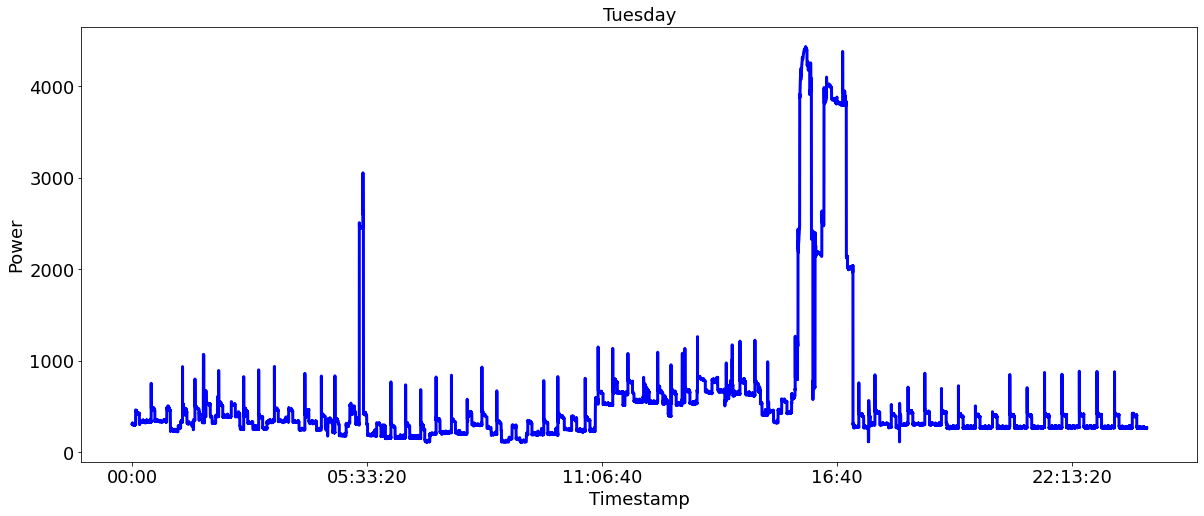

1633218   2013-06-19 00:00:00
1633219   2013-06-19 00:00:01
1633220   2013-06-19 00:00:02
1633221   2013-06-19 00:00:03
1633222   2013-06-19 00:00:04
                  ...        
1688266   2013-06-19 23:59:54
1688267   2013-06-19 23:59:55
1688268   2013-06-19 23:59:56
1688269   2013-06-19 23:59:57
1688270   2013-06-19 23:59:59
Name: Timestamp, Length: 55053, dtype: datetime64[ns]
        Timestamp           W
1633218  00:00:00  258.535603
1633219  00:00:01  266.073505
1633220  00:00:02  274.749712
1633221  00:00:03  280.038286
1633222  00:00:04  279.193493
...           ...         ...
1688266  23:59:54  261.654705
1688267  23:59:55  261.046595
1688268  23:59:56  262.242405
1688269  23:59:57  261.170199
1688270  23:59:59  262.113997

[55053 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

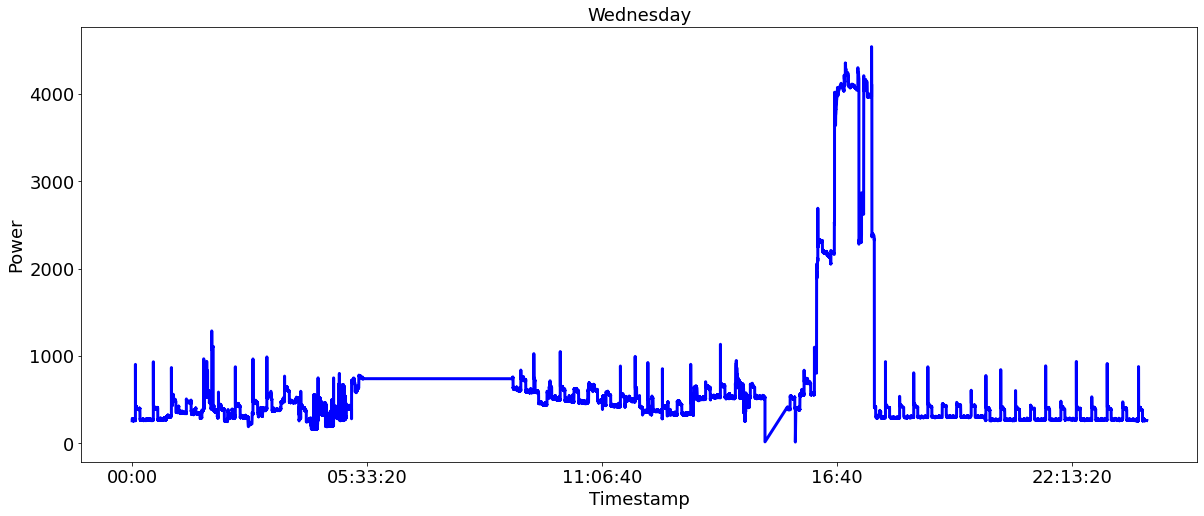

1688271   2013-06-20 00:00:00
1688272   2013-06-20 00:00:01
1688273   2013-06-20 00:00:02
1688274   2013-06-20 00:00:03
1688275   2013-06-20 00:00:04
                  ...        
1741732   2013-06-20 23:59:50
1741733   2013-06-20 23:59:51
1741734   2013-06-20 23:59:52
1741735   2013-06-20 23:59:55
1741736   2013-06-20 23:59:58
Name: Timestamp, Length: 53466, dtype: datetime64[ns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

        Timestamp           W
1688271  00:00:00  262.087600
1688272  00:00:01  262.109096
1688273  00:00:02  278.010902
1688274  00:00:03  278.174202
1688275  00:00:04  278.097004
...           ...         ...
1741732  23:59:50  287.969303
1741733  23:59:51  287.014906
1741734  23:59:52  287.700996
1741735  23:59:55  288.445405
1741736  23:59:58  289.160709

[53466 rows x 2 columns]


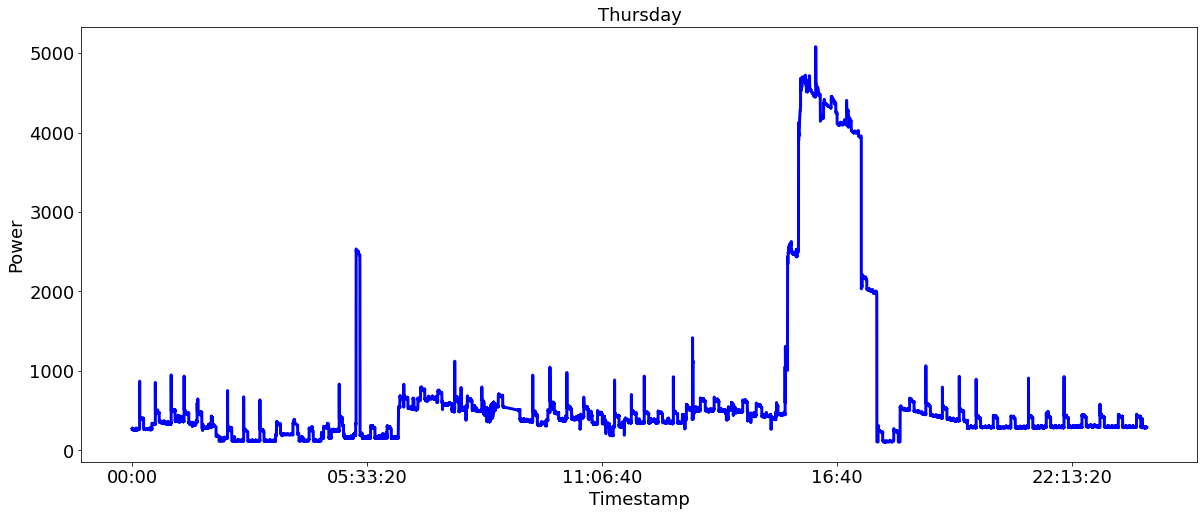

1741737   2013-06-21 00:00:01
1741738   2013-06-21 00:00:02
1741739   2013-06-21 00:00:03
1741740   2013-06-21 00:00:04
1741741   2013-06-21 00:00:05
                  ...        
1802920   2013-06-21 23:59:53
1802921   2013-06-21 23:59:54
1802922   2013-06-21 23:59:56
1802923   2013-06-21 23:59:57
1802924   2013-06-21 23:59:59
Name: Timestamp, Length: 61188, dtype: datetime64[ns]
        Timestamp           W
1741737  00:00:01  288.851910
1741738  00:00:02  300.021807
1741739  00:00:03  300.021807
1741740  00:00:04  308.335304
1741741  00:00:05  301.812105
...           ...         ...
1802920  23:59:53  312.828301
1802921  23:59:54  314.201712
1802922  23:59:56  312.548388
1802923  23:59:57  313.687014
1802924  23:59:59  312.692300

[61188 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

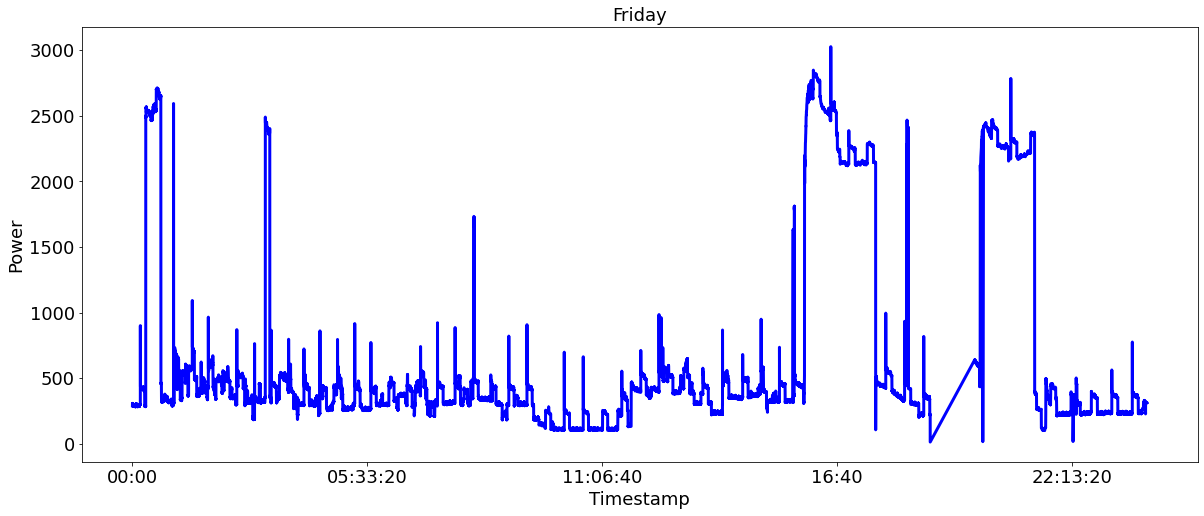

1802925   2013-06-22 00:00:00
1802926   2013-06-22 00:00:04
1802927   2013-06-22 00:00:05
1802928   2013-06-22 00:00:06
1802929   2013-06-22 00:00:07
                  ...        
1858973   2013-06-22 23:59:55
1858974   2013-06-22 23:59:56
1858975   2013-06-22 23:59:57
1858976   2013-06-22 23:59:58
1858977   2013-06-22 23:59:59
Name: Timestamp, Length: 56053, dtype: datetime64[ns]
        Timestamp           W
1802925  00:00:00  312.634288
1802926  00:00:04  325.613316
1802927  00:00:05  324.767715
1802928  00:00:06  325.145303
1802929  00:00:07  325.197894
...           ...         ...
1858973  23:59:55  333.859609
1858974  23:59:56  333.768710
1858975  23:59:57  333.748597
1858976  23:59:58  333.755603
1858977  23:59:59  330.443499

[56053 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

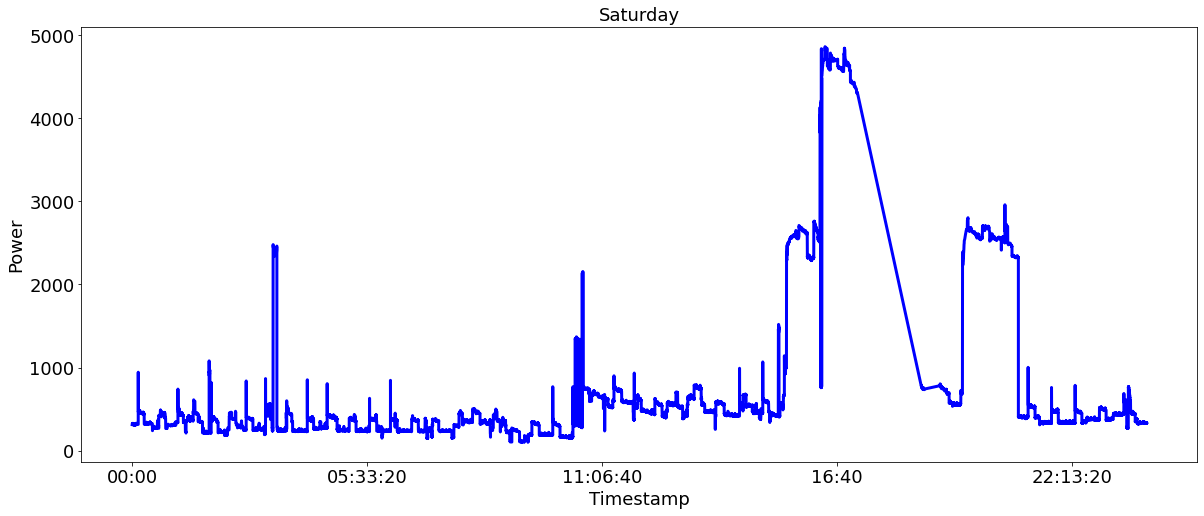

1858978   2013-06-23 00:00:00
1858979   2013-06-23 00:00:01
1858980   2013-06-23 00:00:02
1858981   2013-06-23 00:00:04
1858982   2013-06-23 00:00:05
                  ...        
1917784   2013-06-23 23:59:48
1917785   2013-06-23 23:59:51
1917786   2013-06-23 23:59:52
1917787   2013-06-23 23:59:55
1917788   2013-06-23 23:59:58
Name: Timestamp, Length: 58811, dtype: datetime64[ns]
        Timestamp           W
1858978  00:00:00  330.627197
1858979  00:00:01  338.882414
1858980  00:00:02  339.029113
1858981  00:00:04  350.330490
1858982  00:00:05  350.263188
...           ...         ...
1917784  23:59:48  305.101089
1917785  23:59:51  304.318488
1917786  23:59:52  305.488309
1917787  23:59:55  306.276001
1917788  23:59:58  312.419888

[58811 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

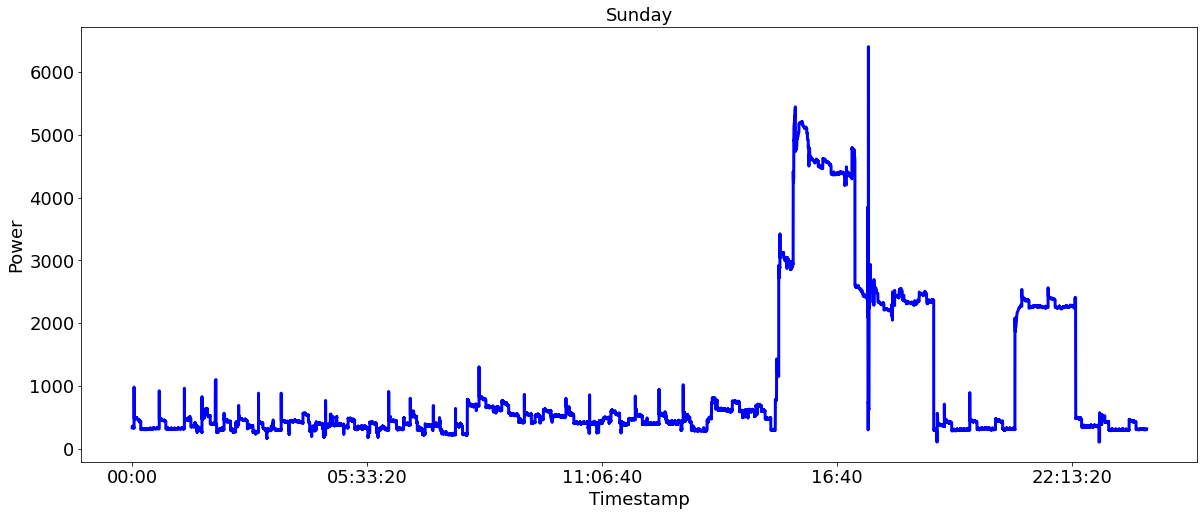

1917789   2013-06-24 00:00:01
1917790   2013-06-24 00:00:02
1917791   2013-06-24 00:00:03
1917792   2013-06-24 00:00:07
1917793   2013-06-24 00:00:08
                  ...        
1976851   2013-06-24 23:59:55
1976852   2013-06-24 23:59:56
1976853   2013-06-24 23:59:57
1976854   2013-06-24 23:59:58
1976855   2013-06-24 23:59:59
Name: Timestamp, Length: 59067, dtype: datetime64[ns]
        Timestamp           W
1917789  00:00:01  310.856206
1917790  00:00:02  305.736310
1917791  00:00:03  324.218697
1917792  00:00:07  322.005587
1917793  00:00:08  322.755813
...           ...         ...
1976851  23:59:55  325.293602
1976852  23:59:56  325.500308
1976853  23:59:57  325.500308
1976854  23:59:58  326.305599
1976855  23:59:59  325.482509

[59067 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

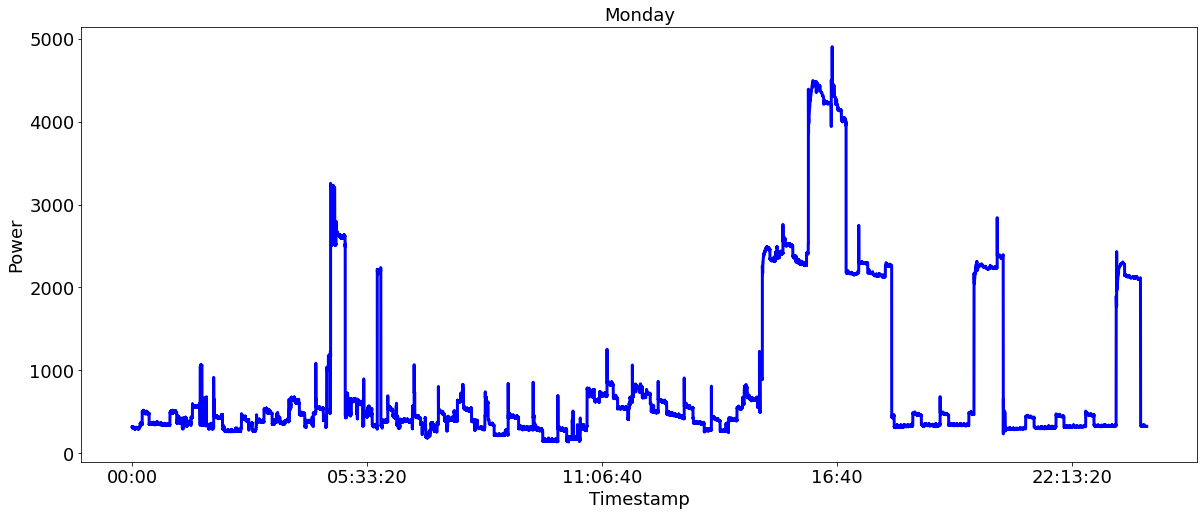

1976856   2013-06-25 00:00:02
1976857   2013-06-25 00:00:03
1976858   2013-06-25 00:00:06
1976859   2013-06-25 00:00:07
1976860   2013-06-25 00:00:10
                  ...        
2030292   2013-06-25 23:59:47
2030293   2013-06-25 23:59:50
2030294   2013-06-25 23:59:53
2030295   2013-06-25 23:59:56
2030296   2013-06-25 23:59:59
Name: Timestamp, Length: 53441, dtype: datetime64[ns]
        Timestamp           W
1976856  00:00:02  326.738609
1976857  00:00:03  335.658213
1976858  00:00:06  341.715011
1976859  00:00:07  342.481895
1976860  00:00:10  342.211309
...           ...         ...
2030292  23:59:47  297.828900
2030293  23:59:50  296.876906
2030294  23:59:53  296.468491
2030295  23:59:56  297.559893
2030296  23:59:59  297.246795

[53441 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

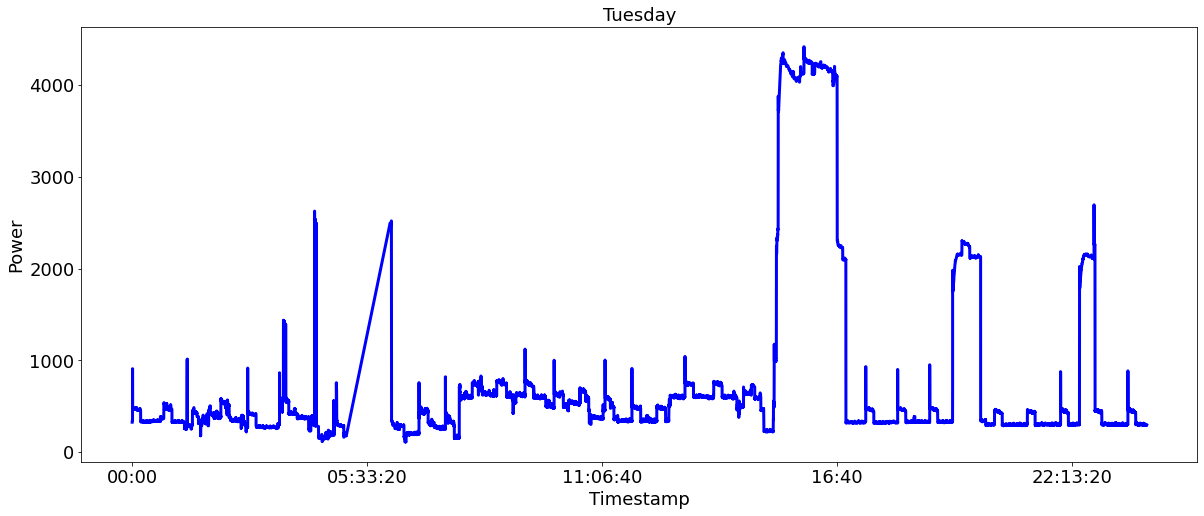

2030297   2013-06-26 00:00:00
2030298   2013-06-26 00:00:01
2030299   2013-06-26 00:00:02
2030300   2013-06-26 00:00:03
2030301   2013-06-26 00:00:04
                  ...        
2081515   2013-06-26 23:59:54
2081516   2013-06-26 23:59:55
2081517   2013-06-26 23:59:56
2081518   2013-06-26 23:59:58
2081519   2013-06-26 23:59:59
Name: Timestamp, Length: 51223, dtype: datetime64[ns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

        Timestamp           W
2030297  00:00:00  297.262801
2030298  00:00:01  297.610114
2030299  00:00:02  297.610114
2030300  00:00:03  313.972406
2030301  00:00:04  312.357415
...           ...         ...
2081515  23:59:54  296.802988
2081516  23:59:55  296.681895
2081517  23:59:56  296.524487
2081518  23:59:58  297.845809
2081519  23:59:59  297.133794

[51223 rows x 2 columns]


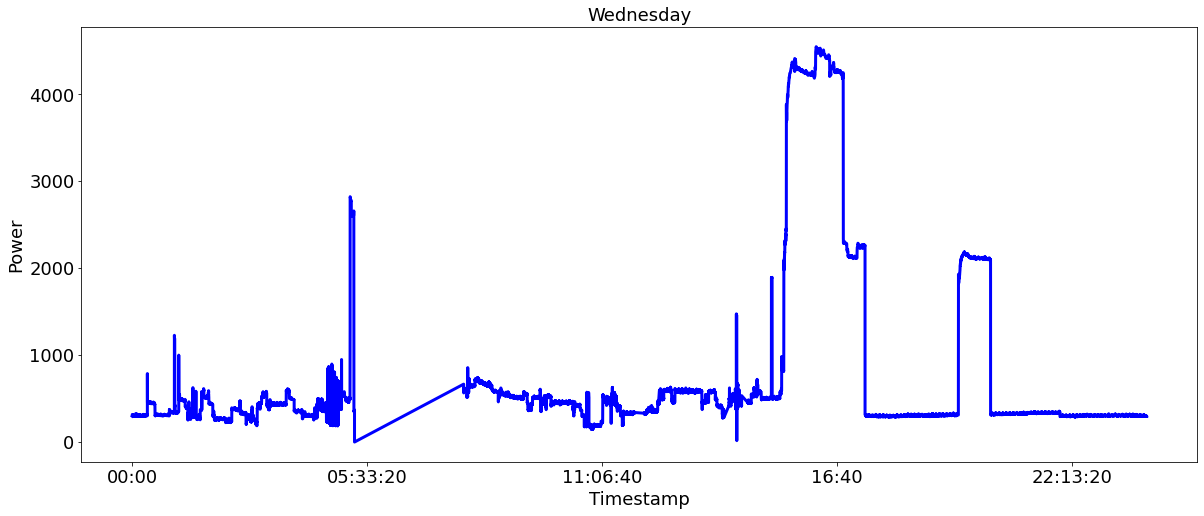

2081520   2013-06-27 00:00:00
2081521   2013-06-27 00:00:02
2081522   2013-06-27 00:00:03
2081523   2013-06-27 00:00:04
2081524   2013-06-27 00:00:05
                  ...        
2134859   2013-06-27 23:59:54
2134860   2013-06-27 23:59:55
2134861   2013-06-27 23:59:56
2134862   2013-06-27 23:59:58
2134863   2013-06-27 23:59:59
Name: Timestamp, Length: 53344, dtype: datetime64[ns]
        Timestamp           W
2081520  00:00:00  297.235306
2081521  00:00:02  308.833591
2081522  00:00:03  308.833591
2081523  00:00:04  309.026915
2081524  00:00:05  309.095210
...           ...         ...
2134859  23:59:54  400.202206
2134860  23:59:55  396.817011
2134861  23:59:56  396.946195
2134862  23:59:58  396.524293
2134863  23:59:59  399.698490

[53344 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

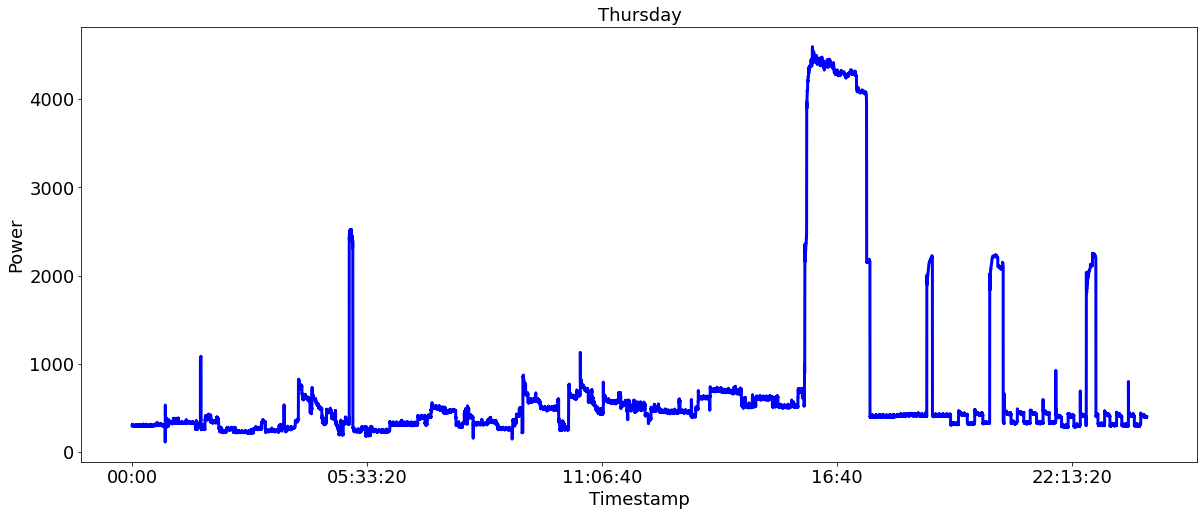

2134864   2013-06-28 00:00:00
2134865   2013-06-28 00:00:01
2134866   2013-06-28 00:00:02
2134867   2013-06-28 00:00:03
2134868   2013-06-28 00:00:04
                  ...        
2196101   2013-06-28 23:59:54
2196102   2013-06-28 23:59:55
2196103   2013-06-28 23:59:57
2196104   2013-06-28 23:59:58
2196105   2013-06-28 23:59:59
Name: Timestamp, Length: 61242, dtype: datetime64[ns]
        Timestamp           W
2134864  00:00:00  394.043011
2134865  00:00:01  397.218090
2134866  00:00:02  405.433396
2134867  00:00:03  411.752096
2134868  00:00:04  416.873088
...           ...         ...
2196101  23:59:54  408.467090
2196102  23:59:55  408.369701
2196103  23:59:57  409.325493
2196104  23:59:58  408.449915
2196105  23:59:59  413.216093

[61242 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

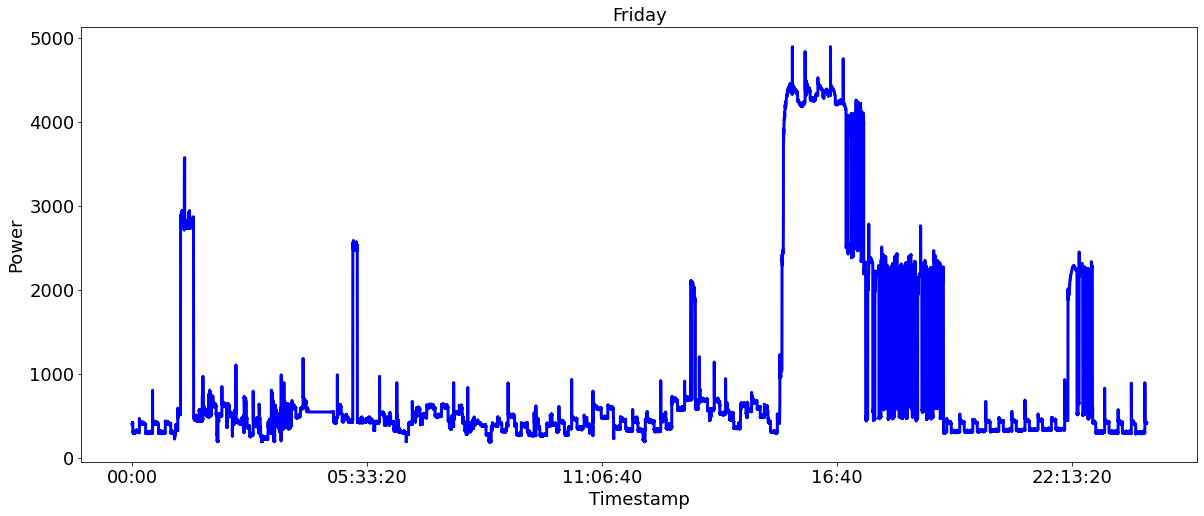

2196106   2013-06-29 00:00:03
2196107   2013-06-29 00:00:04
2196108   2013-06-29 00:00:05
2196109   2013-06-29 00:00:07
2196110   2013-06-29 00:00:08
                  ...        
2253928   2013-06-29 23:59:54
2253929   2013-06-29 23:59:55
2253930   2013-06-29 23:59:57
2253931   2013-06-29 23:59:58
2253932   2013-06-29 23:59:59
Name: Timestamp, Length: 57827, dtype: datetime64[ns]
        Timestamp           W
2196106  00:00:03  423.178286
2196107  00:00:04  423.063611
2196108  00:00:05  422.941207
2196109  00:00:07  423.026696
2196110  00:00:08  423.228388
...           ...         ...
2253928  23:59:54  309.090185
2253929  23:59:55  309.103013
2253930  23:59:57  309.345486
2253931  23:59:58  309.186003
2253932  23:59:59  310.821112

[57827 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

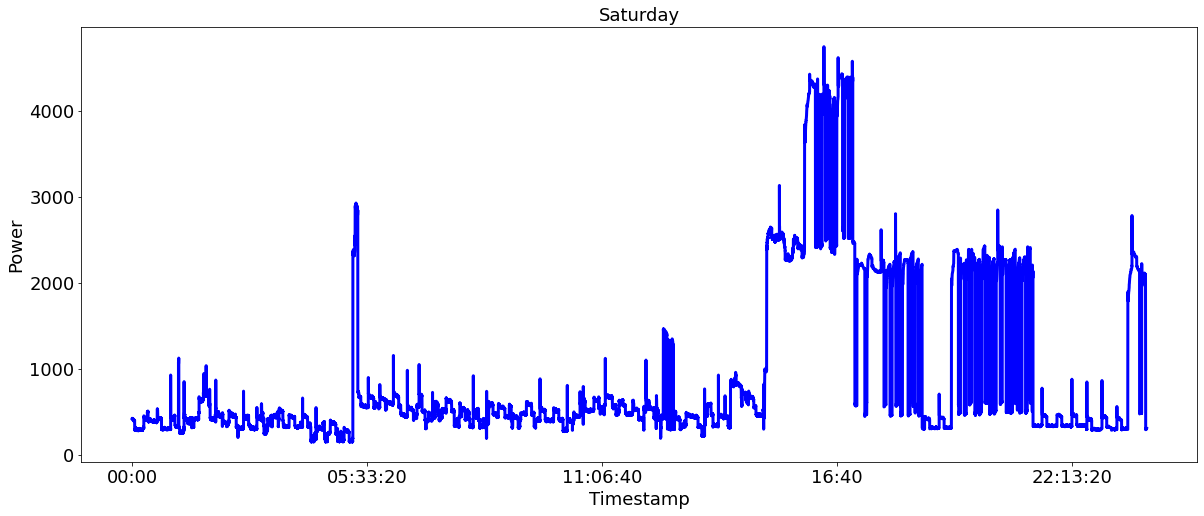

2253933   2013-06-30 00:00:01
2253934   2013-06-30 00:00:02
2253935   2013-06-30 00:00:03
2253936   2013-06-30 00:00:05
2253937   2013-06-30 00:00:06
                  ...        
2311414   2013-06-30 23:59:53
2311415   2013-06-30 23:59:54
2311416   2013-06-30 23:59:56
2311417   2013-06-30 23:59:57
2311418   2013-06-30 23:59:59
Name: Timestamp, Length: 57486, dtype: datetime64[ns]
        Timestamp           W
2253933  00:00:01  309.448504
2253934  00:00:02  309.567085
2253935  00:00:03  329.133305
2253936  00:00:05  327.815104
2253937  00:00:06  328.390008
...           ...         ...
2311414  23:59:53  442.106606
2311415  23:59:54  442.197494
2311416  23:59:56  442.125689
2311417  23:59:57  441.889890
2311418  23:59:59  441.401011

[57486 rows x 2 columns]


<ipython-input-23-27ec4cb40784>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-23-27ec4cb40784>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

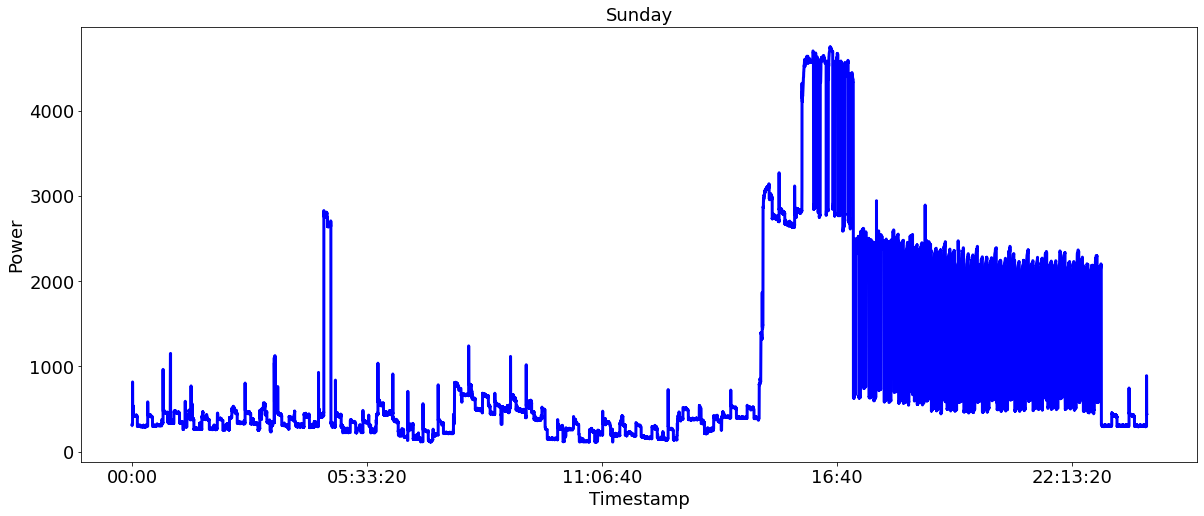

In [23]:
for i in range (1,31):
    start = pd.to_datetime(date(2013,6,i))
    end = start + timedelta(days=1)
    day = start.day_name()
    x = x + 1
    df_1 = df[(df['Timestamp'] >=start) & (df['Timestamp'] < end)]
    print( df_1['Timestamp'])
    df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
    df_1['Timestamp']=df_1['Time']
    df_1.drop('Time',axis=1,inplace=True)
    print(df_1)
    df_1.groupby('Timestamp')['W'].sum().plot(kind='line',linewidth= 3,figsize=(20,8),color='blue',fontsize=18)
    plt.ylabel('Power',fontsize=18)
    plt.xlabel('Timestamp',fontsize=18)
    plt.title(day,fontsize=18)
    plt.show()
    df_1.to_csv(r'Dataset_combined/Day{0}_{1}.csv'.format(x,day))

2311419   2013-07-01 00:00:00
2311420   2013-07-01 00:00:01
2311421   2013-07-01 00:00:02
2311422   2013-07-01 00:00:03
2311423   2013-07-01 00:00:04
                  ...        
2375523   2013-07-01 23:59:53
2375524   2013-07-01 23:59:56
2375525   2013-07-01 23:59:57
2375526   2013-07-01 23:59:58
2375527   2013-07-01 23:59:59
Name: Timestamp, Length: 64109, dtype: datetime64[ns]
        Timestamp           W
2311419  00:00:00  440.233700
2311420  00:00:01  440.174200
2311421  00:00:02  440.866090
2311422  00:00:03  453.625010
2311423  00:00:04  453.468912
...           ...         ...
2375523  23:59:53  385.270303
2375524  23:59:56  382.195498
2375525  23:59:57  381.933594
2375526  23:59:58  381.886801
2375527  23:59:59  381.889009

[64109 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

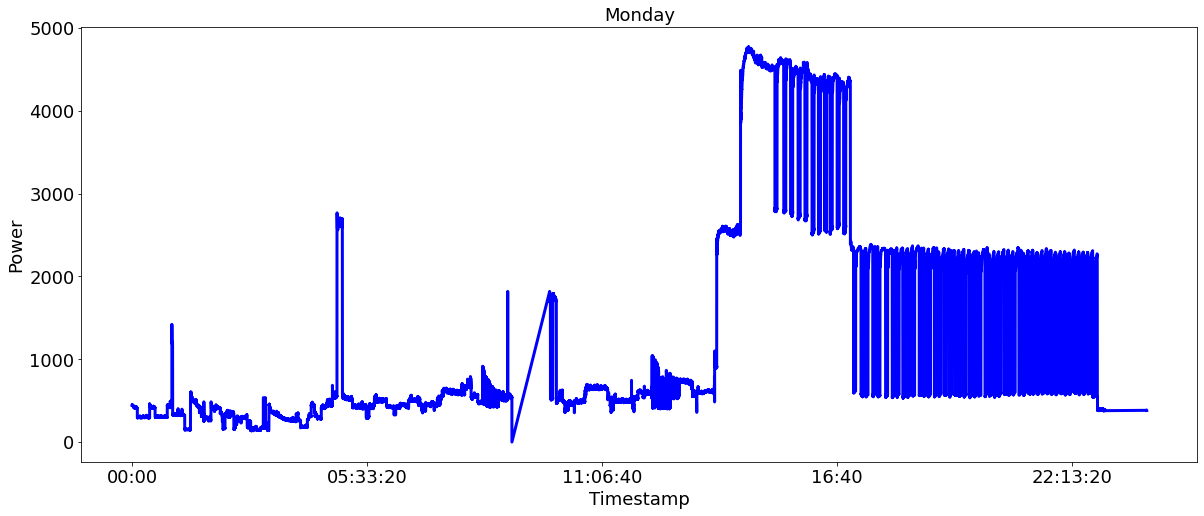

2375528   2013-07-02 00:00:00
2375529   2013-07-02 00:00:03
2375530   2013-07-02 00:00:04
2375531   2013-07-02 00:00:05
2375532   2013-07-02 00:00:06
                  ...        
2435874   2013-07-02 23:59:54
2435875   2013-07-02 23:59:55
2435876   2013-07-02 23:59:56
2435877   2013-07-02 23:59:57
2435878   2013-07-02 23:59:59
Name: Timestamp, Length: 60351, dtype: datetime64[ns]
        Timestamp           W
2375528  00:00:00  381.889009
2375529  00:00:03  389.010893
2375530  00:00:04  400.392988
2375531  00:00:05  399.432605
2375532  00:00:06  399.450199
...           ...         ...
2435874  23:59:54  383.138506
2435875  23:59:55  383.204700
2435876  23:59:56  383.254511
2435877  23:59:57  383.286092
2435878  23:59:59  382.659409

[60351 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

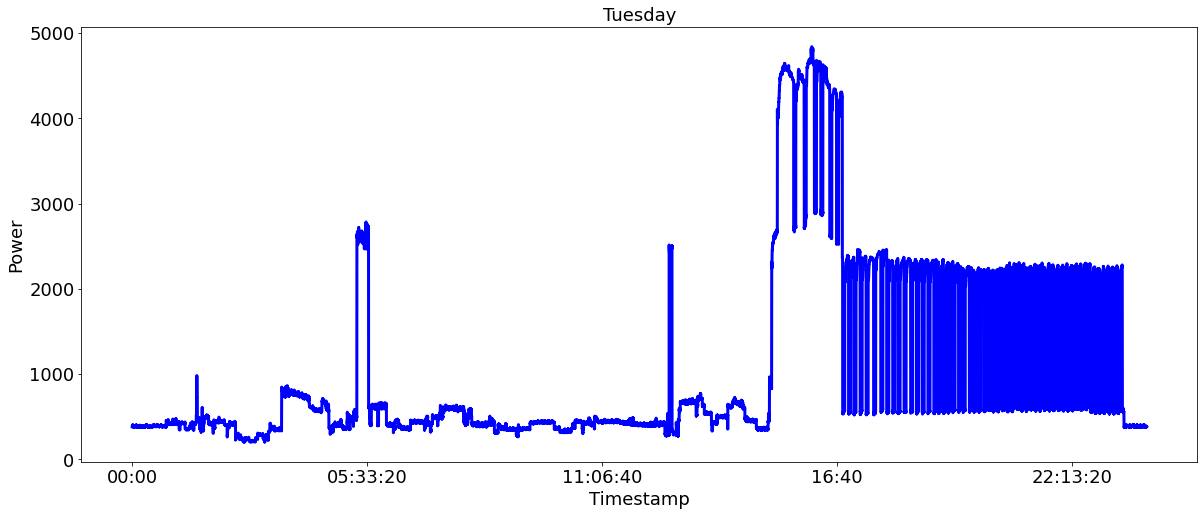

2435879   2013-07-03 00:00:00
2435880   2013-07-03 00:00:03
2435881   2013-07-03 00:00:04
2435882   2013-07-03 00:00:05
2435883   2013-07-03 00:00:06
                  ...        
2499642   2013-07-03 23:59:51
2499643   2013-07-03 23:59:56
2499644   2013-07-03 23:59:57
2499645   2013-07-03 23:59:58
2499646   2013-07-03 23:59:59
Name: Timestamp, Length: 63768, dtype: datetime64[ns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

        Timestamp            W
2435879  00:00:00   382.801215
2435880  00:00:03   397.727797
2435881  00:00:04   404.581389
2435882  00:00:05   398.307598
2435883  00:00:06   403.353186
...           ...          ...
2499642  23:59:51  2222.128309
2499643  23:59:56  2222.584068
2499644  23:59:57  2221.762283
2499645  23:59:58  2221.762283
2499646  23:59:59  2221.987988

[63768 rows x 2 columns]


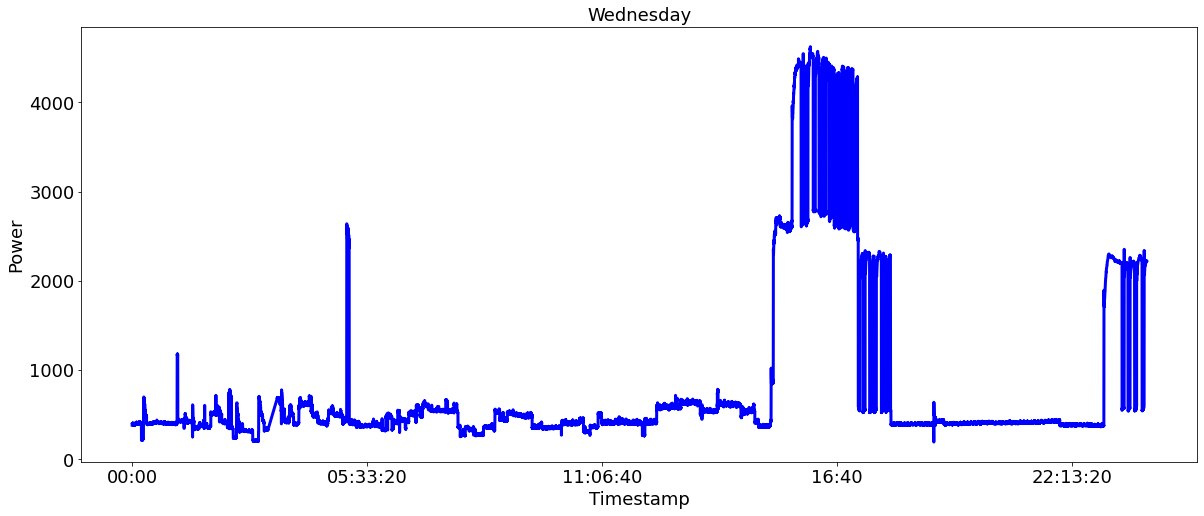

2499647   2013-07-04 00:00:00
2499648   2013-07-04 00:00:01
2499649   2013-07-04 00:00:02
2499650   2013-07-04 00:00:03
2499651   2013-07-04 00:00:06
                  ...        
2556732   2013-07-04 23:59:51
2556733   2013-07-04 23:59:55
2556734   2013-07-04 23:59:56
2556735   2013-07-04 23:59:58
2556736   2013-07-04 23:59:59
Name: Timestamp, Length: 57090, dtype: datetime64[ns]
        Timestamp            W
2499647  00:00:00  2222.140551
2499648  00:00:01  2223.912779
2499649  00:00:02  2223.912779
2499650  00:00:03  2225.999552
2499651  00:00:06  2227.718393
...           ...          ...
2556732  23:59:51   391.635303
2556733  23:59:55   390.749308
2556734  23:59:56   390.715285
2556735  23:59:58   390.599809
2556736  23:59:59   389.848407

[57090 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

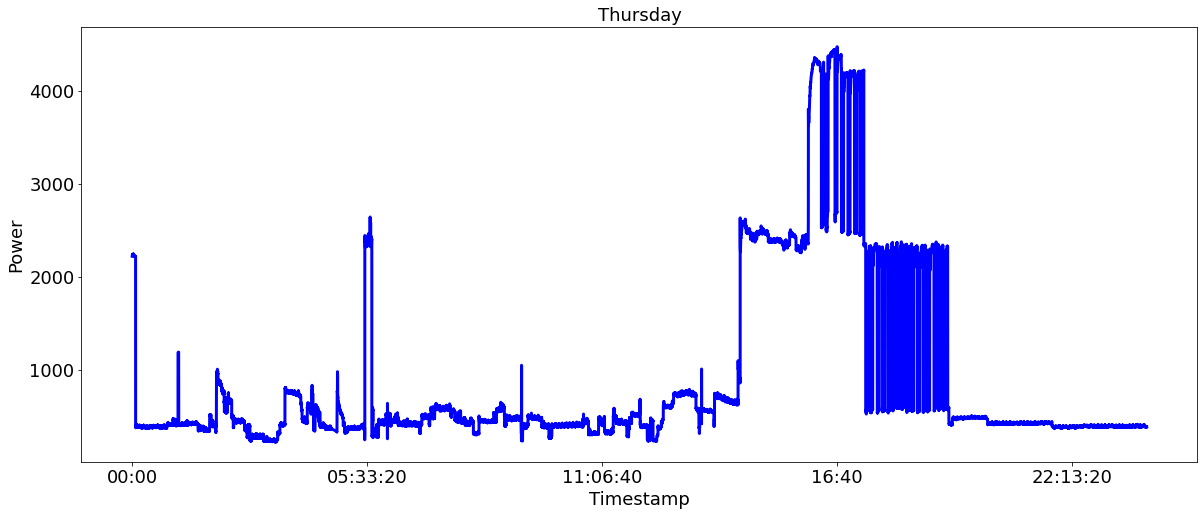

2556737   2013-07-05 00:00:03
2556738   2013-07-05 00:00:04
2556739   2013-07-05 00:00:06
2556740   2013-07-05 00:00:07
2556741   2013-07-05 00:00:09
                  ...        
2603887   2013-07-05 23:59:45
2603888   2013-07-05 23:59:50
2603889   2013-07-05 23:59:53
2603890   2013-07-05 23:59:56
2603891   2013-07-05 23:59:59
Name: Timestamp, Length: 47155, dtype: datetime64[ns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

        Timestamp           W
2556737  00:00:03  411.175799
2556738  00:00:04  406.183913
2556739  00:00:06  405.889705
2556740  00:00:07  406.026515
2556741  00:00:09  404.853508
...           ...         ...
2603887  23:59:45  384.109911
2603888  23:59:50  378.275801
2603889  23:59:53  380.303095
2603890  23:59:56  382.612602
2603891  23:59:59  383.912794

[47155 rows x 2 columns]


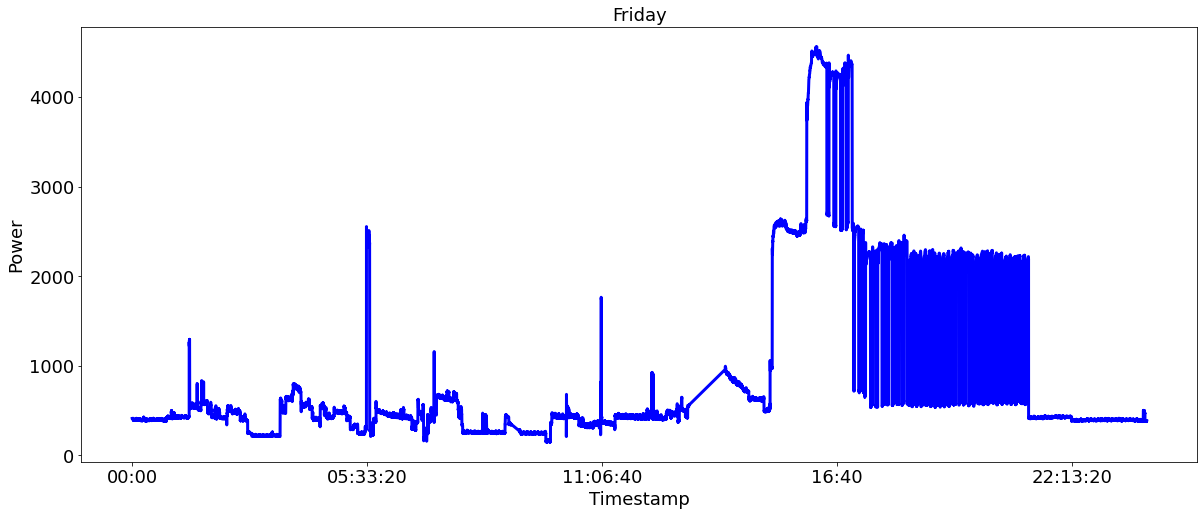

2603892   2013-07-06 00:00:02
2603893   2013-07-06 00:00:07
2603894   2013-07-06 00:00:10
2603895   2013-07-06 00:00:15
2603896   2013-07-06 00:00:18
                  ...        
2650402   2013-07-06 23:59:50
2650403   2013-07-06 23:59:51
2650404   2013-07-06 23:59:52
2650405   2013-07-06 23:59:55
2650406   2013-07-06 23:59:58
Name: Timestamp, Length: 46515, dtype: datetime64[ns]
        Timestamp           W
2603892  00:00:02  380.476700
2603893  00:00:07  398.442506
2603894  00:00:10  403.257301
2603895  00:00:15  403.060405
2603896  00:00:18  398.215889
...           ...         ...
2650402  23:59:50  205.735695
2650403  23:59:51  205.713093
2650404  23:59:52  205.666101
2650405  23:59:55  205.806400
2650406  23:59:58  204.638308

[46515 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

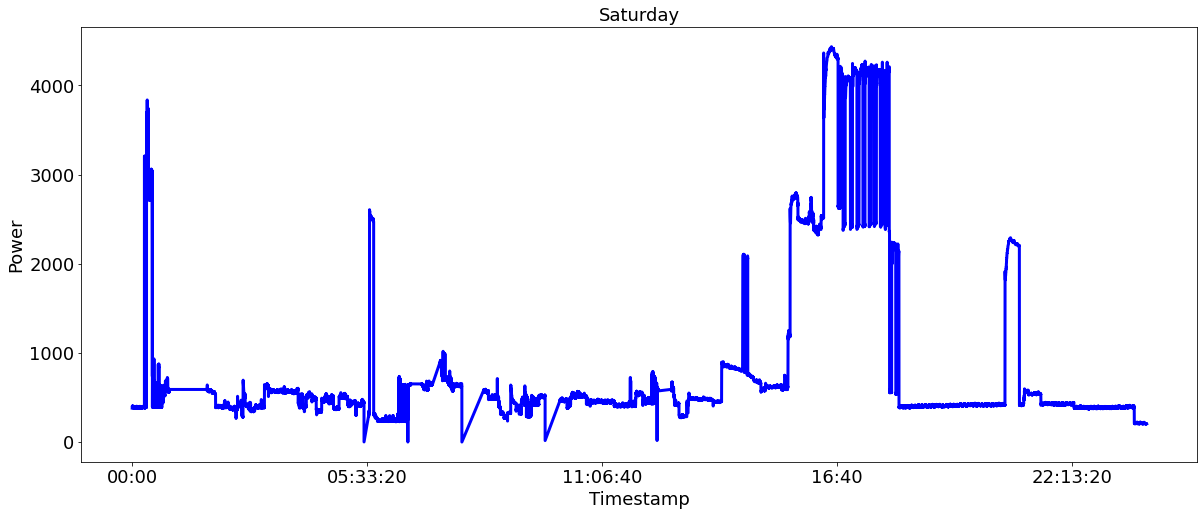

2650407   2013-07-07 00:00:03
2650408   2013-07-07 00:00:04
2650409   2013-07-07 00:00:05
2650410   2013-07-07 00:00:06
2650411   2013-07-07 00:00:07
                  ...        
2706295   2013-07-07 23:59:50
2706296   2013-07-07 23:59:51
2706297   2013-07-07 23:59:52
2706298   2013-07-07 23:59:55
2706299   2013-07-07 23:59:58
Name: Timestamp, Length: 55893, dtype: datetime64[ns]
        Timestamp           W
2650407  00:00:03  222.246504
2650408  00:00:04  222.240200
2650409  00:00:05  221.122404
2650410  00:00:06  221.122404
2650411  00:00:07  221.022898
...           ...         ...
2706295  23:59:50  385.646214
2706296  23:59:51  385.646214
2706297  23:59:52  378.880688
2706298  23:59:55  381.565985
2706299  23:59:58  381.011913

[55893 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

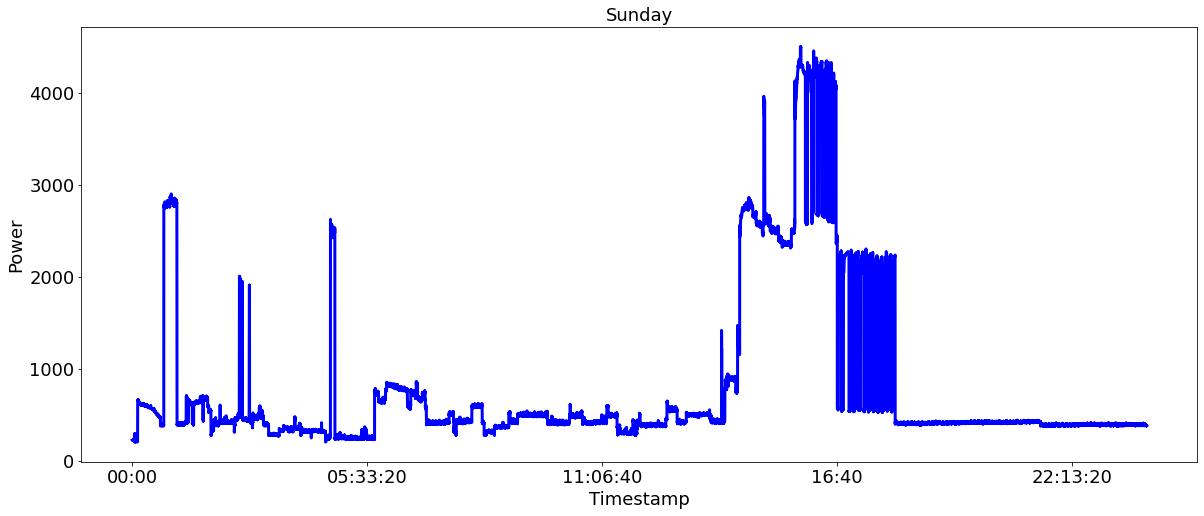

2706300   2013-07-08 00:00:03
2706301   2013-07-08 00:00:04
2706302   2013-07-08 00:00:05
2706303   2013-07-08 00:00:06
2706304   2013-07-08 00:00:07
                  ...        
2761530   2013-07-08 23:59:50
2761531   2013-07-08 23:59:52
2761532   2013-07-08 23:59:53
2761533   2013-07-08 23:59:57
2761534   2013-07-08 23:59:58
Name: Timestamp, Length: 55235, dtype: datetime64[ns]
        Timestamp           W
2706300  00:00:03  386.671612
2706301  00:00:04  393.336798
2706302  00:00:05  392.601702
2706303  00:00:06  397.445496
2706304  00:00:07  397.445496
...           ...         ...
2761530  23:59:50  384.624598
2761531  23:59:52  389.339886
2761532  23:59:53  389.258291
2761533  23:59:57  389.014910
2761534  23:59:58  384.748188

[55235 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

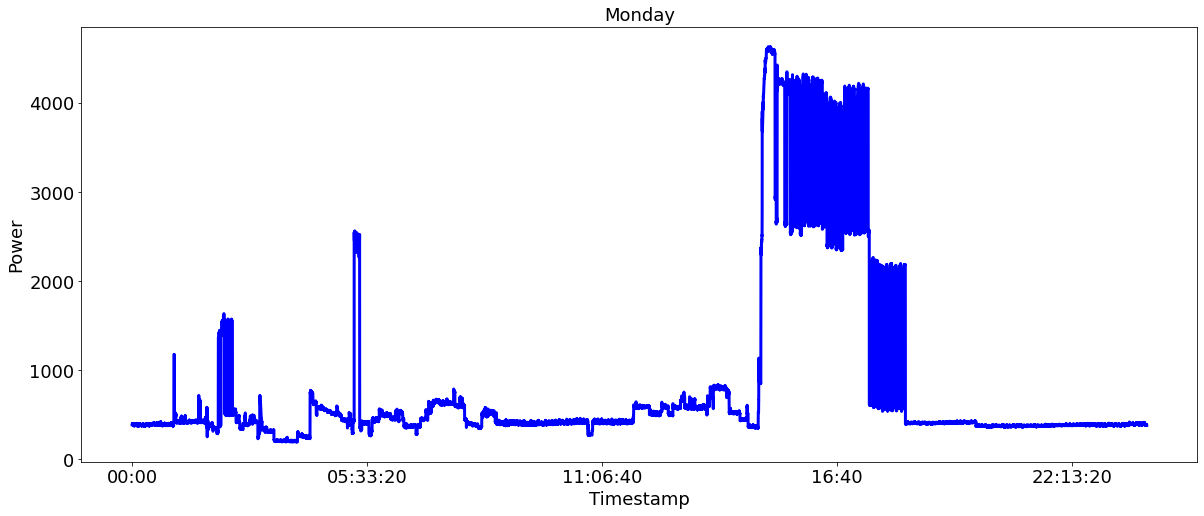

2761535   2013-07-09 00:00:00
2761536   2013-07-09 00:00:01
2761537   2013-07-09 00:00:02
2761538   2013-07-09 00:00:03
2761539   2013-07-09 00:00:04
                  ...        
2824669   2013-07-09 23:59:55
2824670   2013-07-09 23:59:56
2824671   2013-07-09 23:59:57
2824672   2013-07-09 23:59:58
2824673   2013-07-09 23:59:59
Name: Timestamp, Length: 63139, dtype: datetime64[ns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

        Timestamp           W
2761535  00:00:00  393.388998
2761536  00:00:01  392.311888
2761537  00:00:02  399.801691
2761538  00:00:03  401.474491
2761539  00:00:04  407.518902
...           ...         ...
2824669  23:59:55  347.627190
2824670  23:59:56  347.690389
2824671  23:59:57  348.060692
2824672  23:59:58  347.844109
2824673  23:59:59  347.729203

[63139 rows x 2 columns]


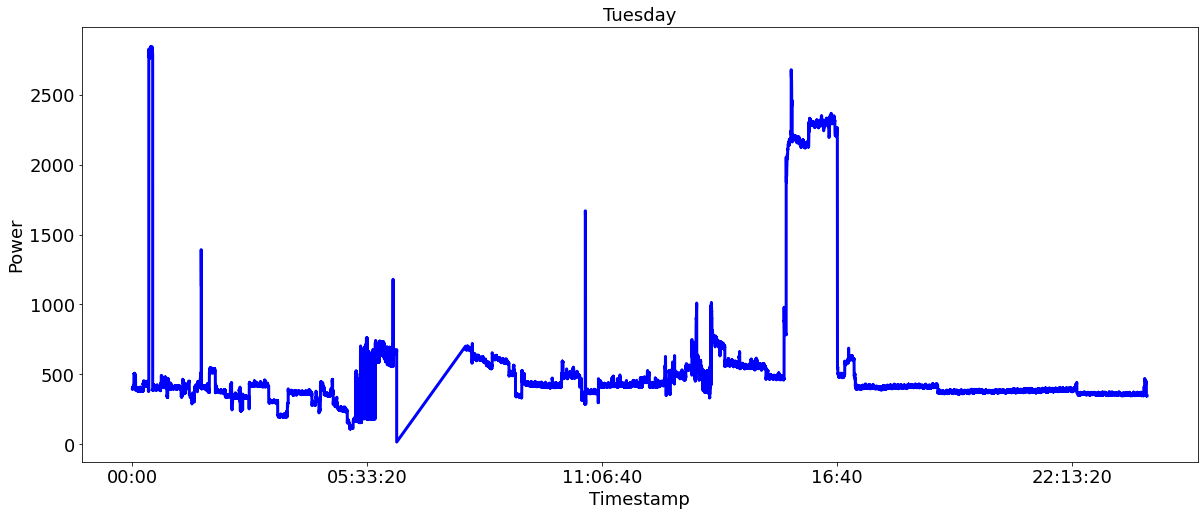

2824674   2013-07-10 00:00:00
2824675   2013-07-10 00:00:03
2824676   2013-07-10 00:00:04
2824677   2013-07-10 00:00:05
2824678   2013-07-10 00:00:06
                  ...        
2899603   2013-07-10 23:59:53
2899604   2013-07-10 23:59:56
2899605   2013-07-10 23:59:57
2899606   2013-07-10 23:59:58
2899607   2013-07-10 23:59:59
Name: Timestamp, Length: 74934, dtype: datetime64[ns]
        Timestamp           W
2824674  00:00:00  355.131499
2824675  00:00:03  361.323694
2824676  00:00:04  361.379296
2824677  00:00:05  361.437203
2824678  00:00:06  361.573189
...           ...         ...
2899603  23:59:53  348.091295
2899604  23:59:56  349.134291
2899605  23:59:57  347.725798
2899606  23:59:58  347.794313
2899607  23:59:59  347.932110

[74934 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

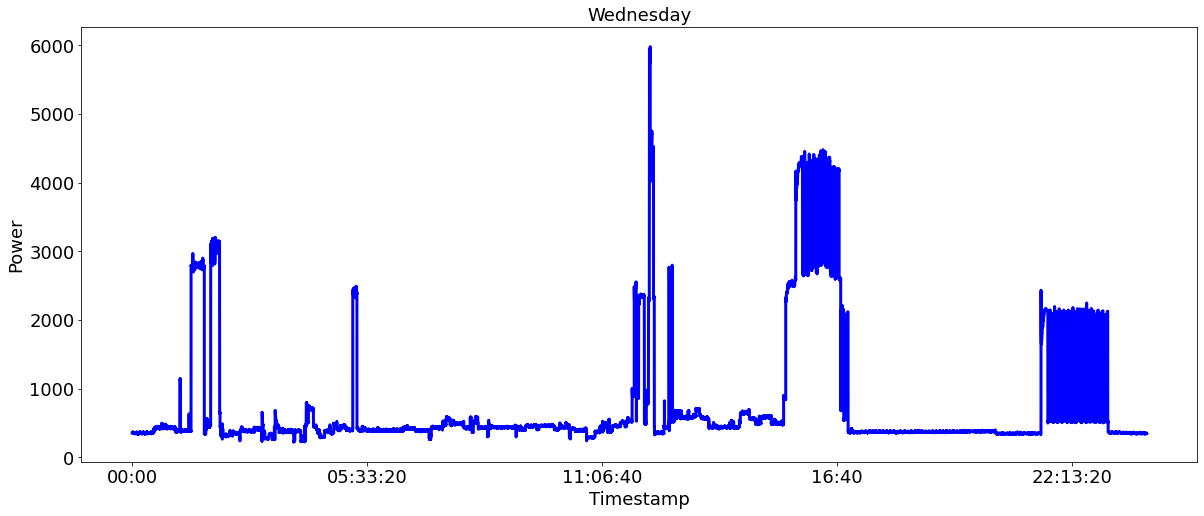

2899608   2013-07-11 00:00:00
2899609   2013-07-11 00:00:01
2899610   2013-07-11 00:00:04
2899611   2013-07-11 00:00:05
2899612   2013-07-11 00:00:06
                  ...        
2962687   2013-07-11 23:59:53
2962688   2013-07-11 23:59:54
2962689   2013-07-11 23:59:55
2962690   2013-07-11 23:59:58
2962691   2013-07-11 23:59:59
Name: Timestamp, Length: 63084, dtype: datetime64[ns]
        Timestamp           W
2899608  00:00:00  347.873394
2899609  00:00:01  348.926706
2899610  00:00:04  370.769600
2899611  00:00:05  368.063614
2899612  00:00:06  367.698103
...           ...         ...
2962687  23:59:53  443.448502
2962688  23:59:54  443.448502
2962689  23:59:55  450.722906
2962690  23:59:58  437.770391
2962691  23:59:59  447.363295

[63084 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

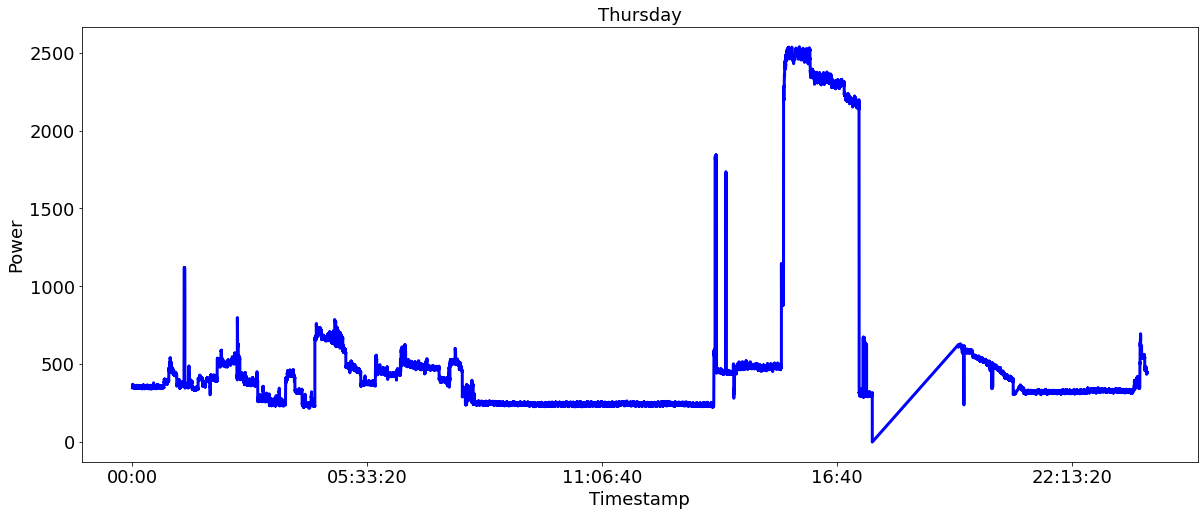

2962692   2013-07-12 00:00:00
2962693   2013-07-12 00:00:01
2962694   2013-07-12 00:00:04
2962695   2013-07-12 00:00:07
2962696   2013-07-12 00:00:10
                  ...        
3005031   2013-07-12 23:30:31
3005032   2013-07-12 23:30:32
3005033   2013-07-12 23:30:33
3005034   2013-07-12 23:30:34
3005035   2013-07-12 23:30:36
Name: Timestamp, Length: 42344, dtype: datetime64[ns]
        Timestamp           W
2962692  00:00:00  451.905712
2962693  00:00:01  451.905712
2962694  00:00:04  461.277588
2962695  00:00:07  460.377415
2962696  00:00:10  470.567789
...           ...         ...
3005031  23:30:31  381.763393
3005032  23:30:32  380.541399
3005033  23:30:33  380.628998
3005034  23:30:34  380.555290
3005035  23:30:36   17.408400

[42344 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

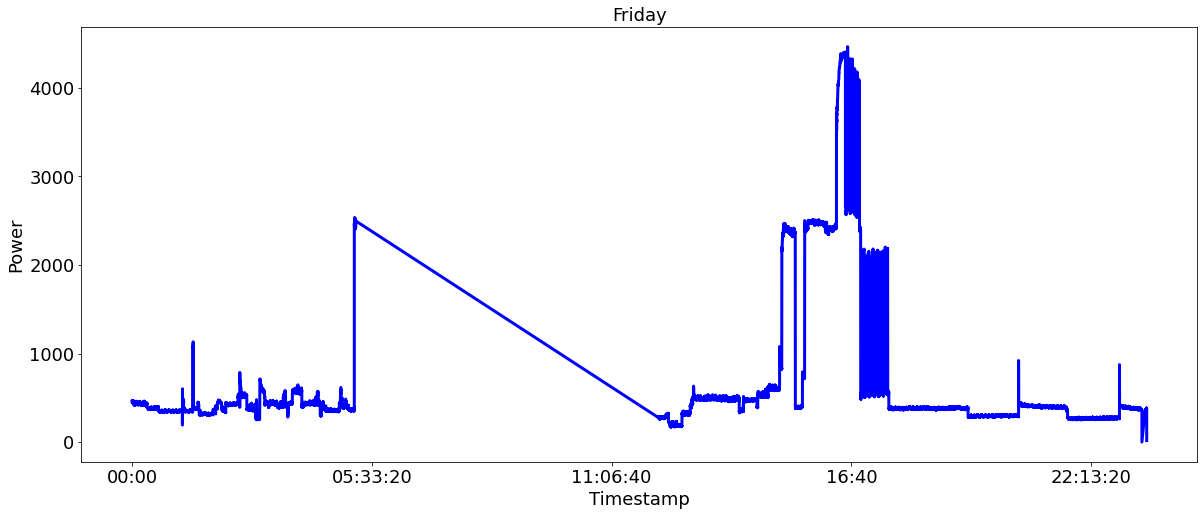

3005036   2013-07-13 01:01:29
3005037   2013-07-13 01:01:51
3005038   2013-07-13 01:01:53
3005039   2013-07-13 01:01:54
3005040   2013-07-13 01:01:56
                  ...        
3056839   2013-07-13 23:59:53
3056840   2013-07-13 23:59:54
3056841   2013-07-13 23:59:56
3056842   2013-07-13 23:59:57
3056843   2013-07-13 23:59:59
Name: Timestamp, Length: 51808, dtype: datetime64[ns]
        Timestamp           W
3005036  01:01:29  595.627703
3005037  01:01:51  596.364571
3005038  01:01:53  595.173927
3005039  01:01:54  595.214722
3005040  01:01:56  595.305208
...           ...         ...
3056839  23:59:53  341.886604
3056840  23:59:54  341.954299
3056841  23:59:56  341.330102
3056842  23:59:57  341.424808
3056843  23:59:59  341.641294

[51808 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

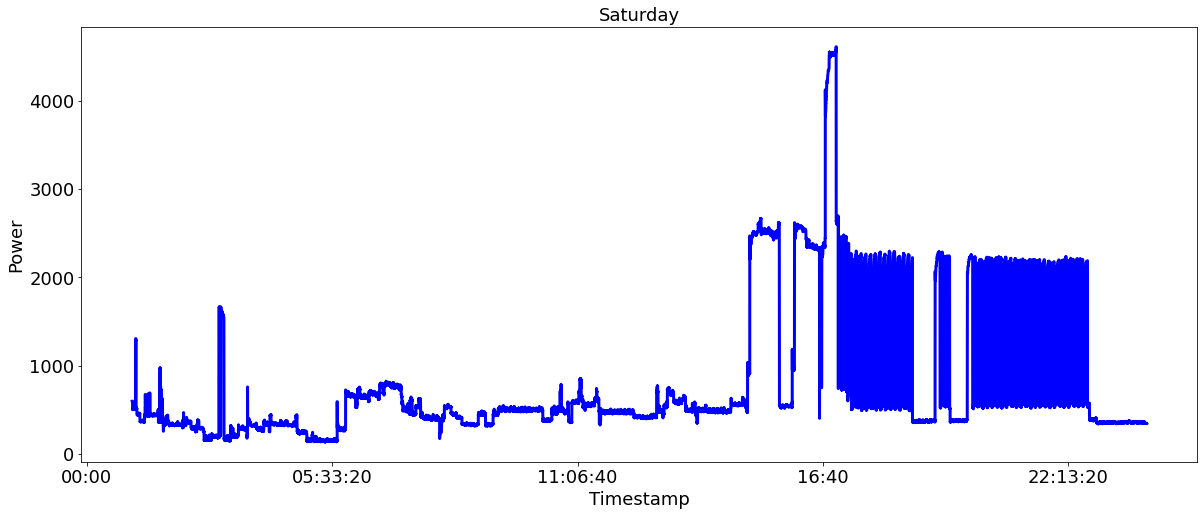

3056844   2013-07-14 00:00:00
3056845   2013-07-14 00:00:02
3056846   2013-07-14 00:00:03
3056847   2013-07-14 00:00:05
3056848   2013-07-14 00:00:06
                  ...        
3115011   2013-07-14 23:59:53
3115012   2013-07-14 23:59:54
3115013   2013-07-14 23:59:56
3115014   2013-07-14 23:59:57
3115015   2013-07-14 23:59:59
Name: Timestamp, Length: 58172, dtype: datetime64[ns]
        Timestamp           W
3056844  00:00:00  341.781614
3056845  00:00:02  362.883213
3056846  00:00:03  363.419411
3056847  00:00:05  361.600513
3056848  00:00:06  361.310616
...           ...         ...
3115011  23:59:53  314.181699
3115012  23:59:54  314.223303
3115013  23:59:56  314.266110
3115014  23:59:57  314.129706
3115015  23:59:59  315.109489

[58172 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

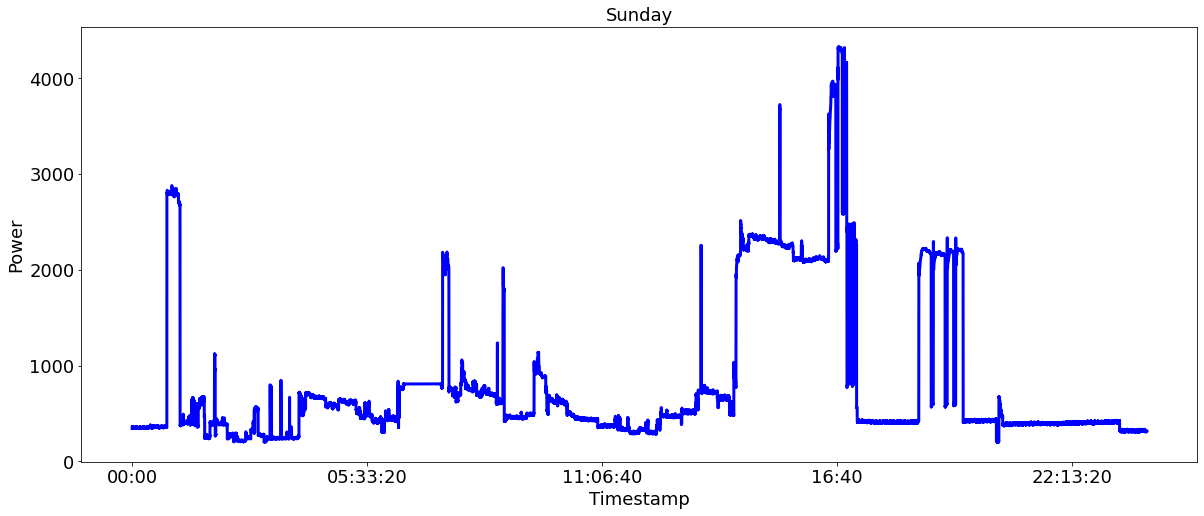

3115016   2013-07-15 00:00:00
3115017   2013-07-15 00:00:02
3115018   2013-07-15 00:00:03
3115019   2013-07-15 00:00:04
3115020   2013-07-15 00:00:05
                  ...        
3176071   2013-07-15 23:59:55
3176072   2013-07-15 23:59:56
3176073   2013-07-15 23:59:57
3176074   2013-07-15 23:59:58
3176075   2013-07-15 23:59:59
Name: Timestamp, Length: 61060, dtype: datetime64[ns]
        Timestamp           W
3115016  00:00:00  314.985515
3115017  00:00:02  324.888514
3115018  00:00:03  333.584200
3115019  00:00:04  333.323589
3115020  00:00:05  331.595586
...           ...         ...
3176071  23:59:55  302.076910
3176072  23:59:56  301.998187
3176073  23:59:57  302.761705
3176074  23:59:58  302.791587
3176075  23:59:59  302.855302

[61060 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

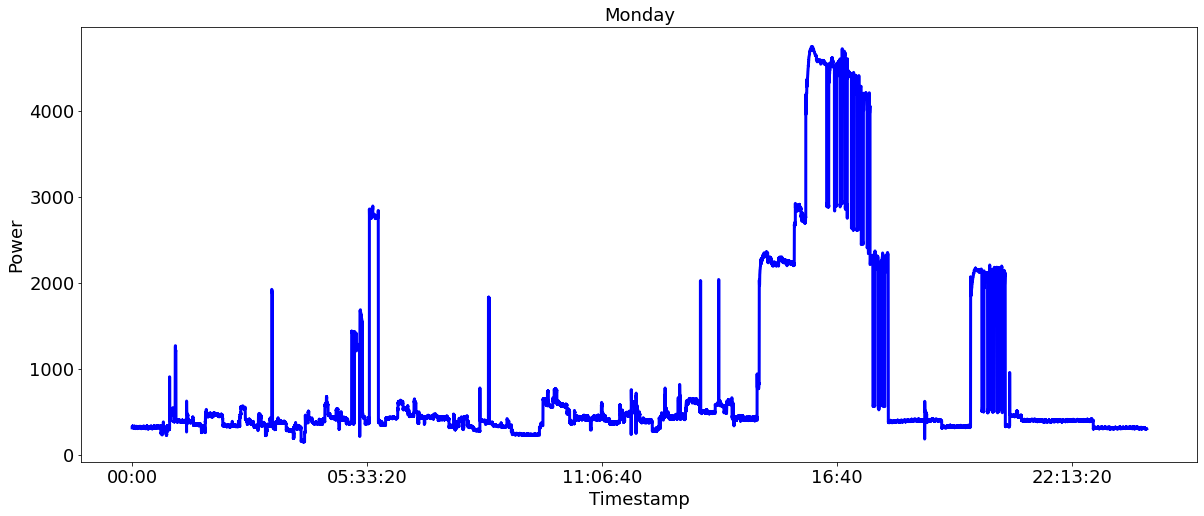

3176076   2013-07-16 00:00:02
3176077   2013-07-16 00:00:05
3176078   2013-07-16 00:00:06
3176079   2013-07-16 00:00:09
3176080   2013-07-16 00:00:10
                  ...        
3242252   2013-07-16 23:59:55
3242253   2013-07-16 23:59:56
3242254   2013-07-16 23:59:57
3242255   2013-07-16 23:59:58
3242256   2013-07-16 23:59:59
Name: Timestamp, Length: 66181, dtype: datetime64[ns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

        Timestamp           W
3176076  00:00:02  315.196885
3176077  00:00:05  322.955011
3176078  00:00:06  321.849797
3176079  00:00:09  322.067693
3176080  00:00:10  321.665504
...           ...         ...
3242252  23:59:55  372.599291
3242253  23:59:56  372.512311
3242254  23:59:57  369.863091
3242255  23:59:58  372.222999
3242256  23:59:59  372.374310

[66181 rows x 2 columns]


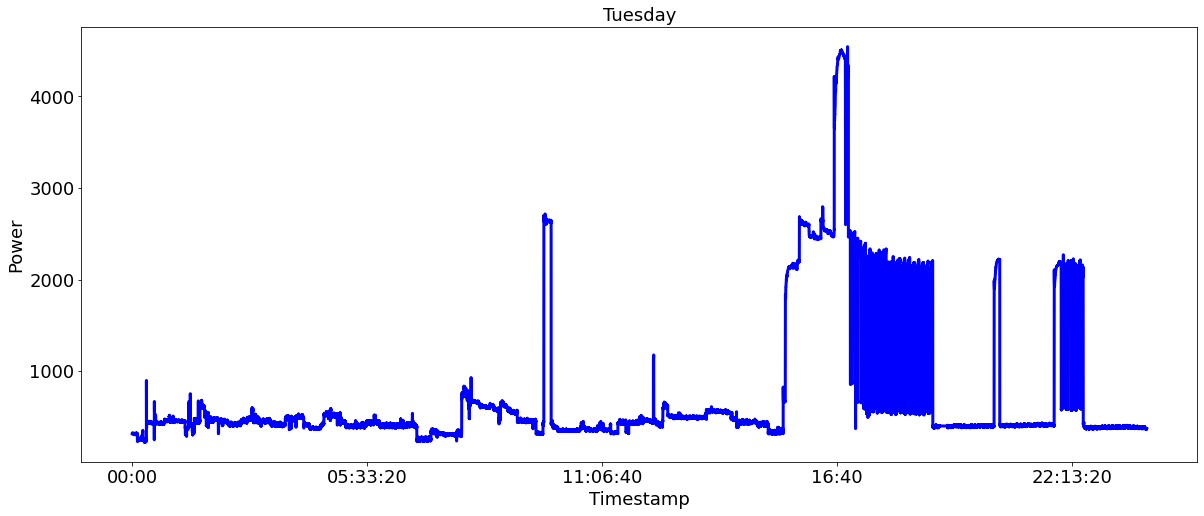

3242257   2013-07-17 00:00:01
3242258   2013-07-17 00:00:02
3242259   2013-07-17 00:00:04
3242260   2013-07-17 00:00:05
3242261   2013-07-17 00:00:06
                  ...        
3310114   2013-07-17 23:59:54
3310115   2013-07-17 23:59:56
3310116   2013-07-17 23:59:57
3310117   2013-07-17 23:59:58
3310118   2013-07-17 23:59:59
Name: Timestamp, Length: 67862, dtype: datetime64[ns]
        Timestamp           W
3242257  00:00:01  368.775399
3242258  00:00:02  385.004302
3242259  00:00:04  387.214090
3242260  00:00:05  385.660007
3242261  00:00:06  385.879586
...           ...         ...
3310114  23:59:54  376.421902
3310115  23:59:56  377.229689
3310116  23:59:57  377.050507
3310117  23:59:58  375.881109
3310118  23:59:59  375.695487

[67862 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

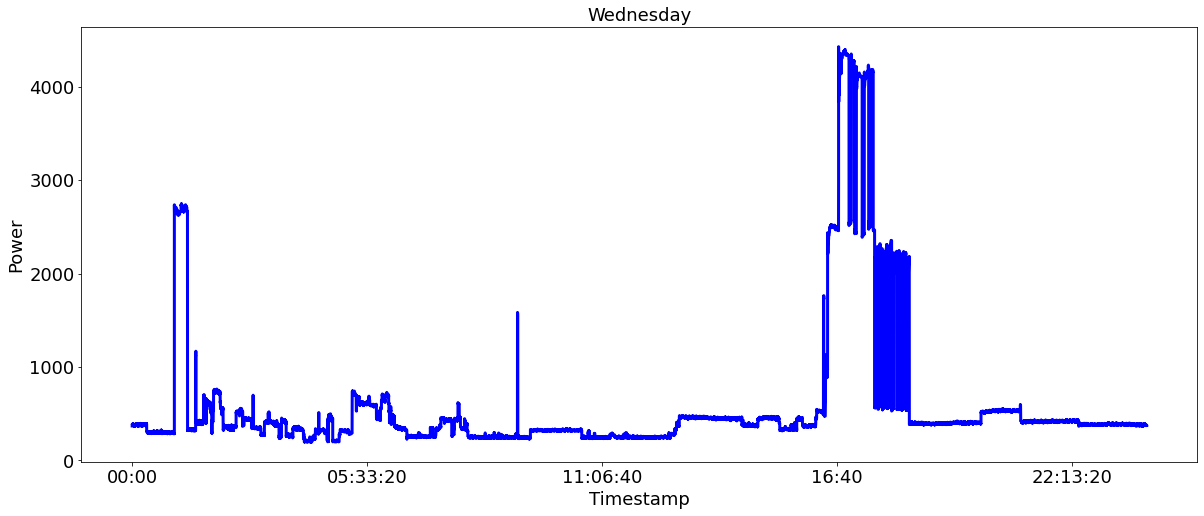

3310119   2013-07-18 00:00:00
3310120   2013-07-18 00:00:04
3310121   2013-07-18 00:00:05
3310122   2013-07-18 00:00:06
3310123   2013-07-18 00:00:07
                  ...        
3365102   2013-07-18 23:59:48
3365103   2013-07-18 23:59:51
3365104   2013-07-18 23:59:52
3365105   2013-07-18 23:59:55
3365106   2013-07-18 23:59:58
Name: Timestamp, Length: 54988, dtype: datetime64[ns]
        Timestamp           W
3310119  00:00:00  375.579707
3310120  00:00:04  390.589788
3310121  00:00:05  390.732109
3310122  00:00:06  390.939496
3310123  00:00:07  390.994999
...           ...         ...
3365102  23:59:48  900.906000
3365103  23:59:51  908.267723
3365104  23:59:52  907.847794
3365105  23:59:55  898.722029
3365106  23:59:58  897.976313

[54988 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

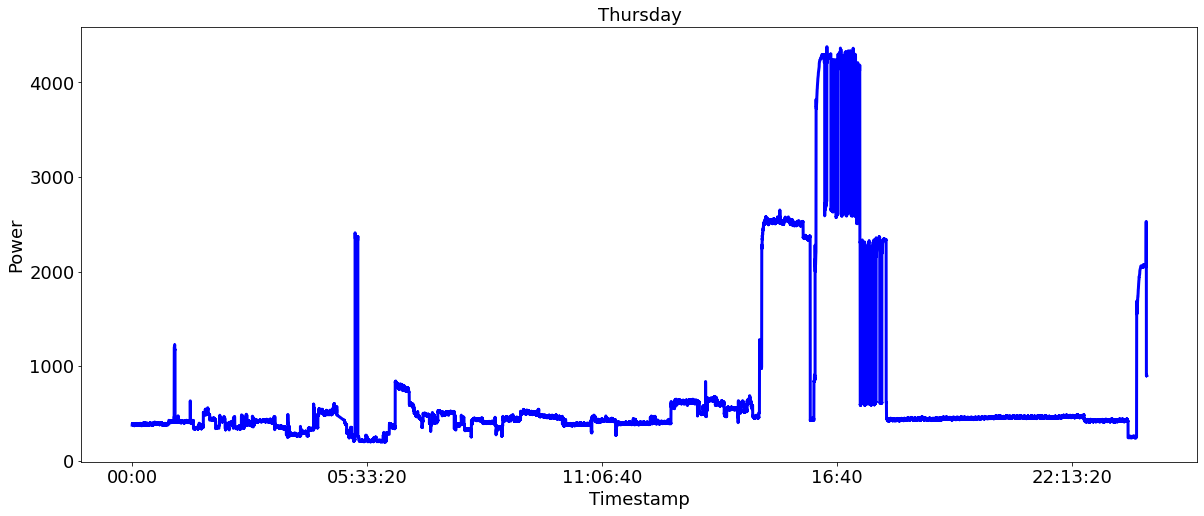

3365107   2013-07-19 00:00:01
3365108   2013-07-19 00:00:02
3365109   2013-07-19 00:00:03
3365110   2013-07-19 00:00:04
3365111   2013-07-19 00:00:05
                  ...        
3422358   2013-07-19 23:59:47
3422359   2013-07-19 23:59:50
3422360   2013-07-19 23:59:53
3422361   2013-07-19 23:59:56
3422362   2013-07-19 23:59:59
Name: Timestamp, Length: 57256, dtype: datetime64[ns]
        Timestamp           W
3365107  00:00:01  897.097878
3365108  00:00:02  897.112724
3365109  00:00:03  899.682114
3365110  00:00:04  900.143278
3365111  00:00:05  900.554329
...           ...         ...
3422358  23:59:47  291.190288
3422359  23:59:50  291.079796
3422360  23:59:53  290.196887
3422361  23:59:56  291.329692
3422362  23:59:59  291.237906

[57256 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

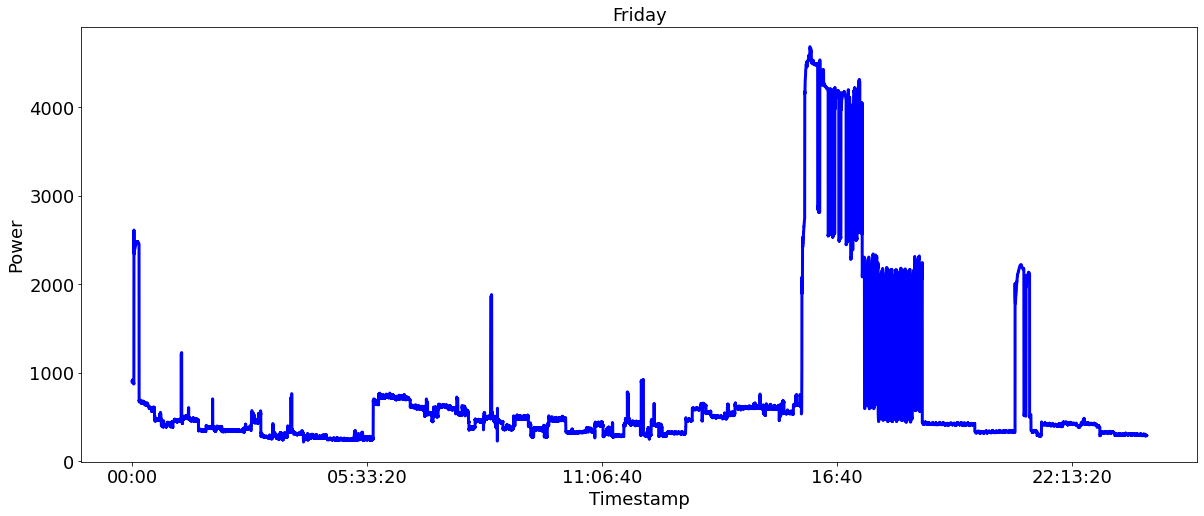

3422363   2013-07-20 00:00:04
3422364   2013-07-20 00:00:07
3422365   2013-07-20 00:00:10
3422366   2013-07-20 00:00:13
3422367   2013-07-20 00:00:14
                  ...        
3477225   2013-07-20 23:59:52
3477226   2013-07-20 23:59:54
3477227   2013-07-20 23:59:55
3477228   2013-07-20 23:59:57
3477229   2013-07-20 23:59:58
Name: Timestamp, Length: 54867, dtype: datetime64[ns]
        Timestamp           W
3422363  00:00:04  304.616012
3422364  00:00:07  303.503801
3422365  00:00:10  303.342912
3422366  00:00:13  304.189700
3422367  00:00:14  304.211701
...           ...         ...
3477225  23:59:52  361.358201
3477226  23:59:54  361.325006
3477227  23:59:55  361.194815
3477228  23:59:57  361.130590
3477229  23:59:58  361.059793

[54867 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

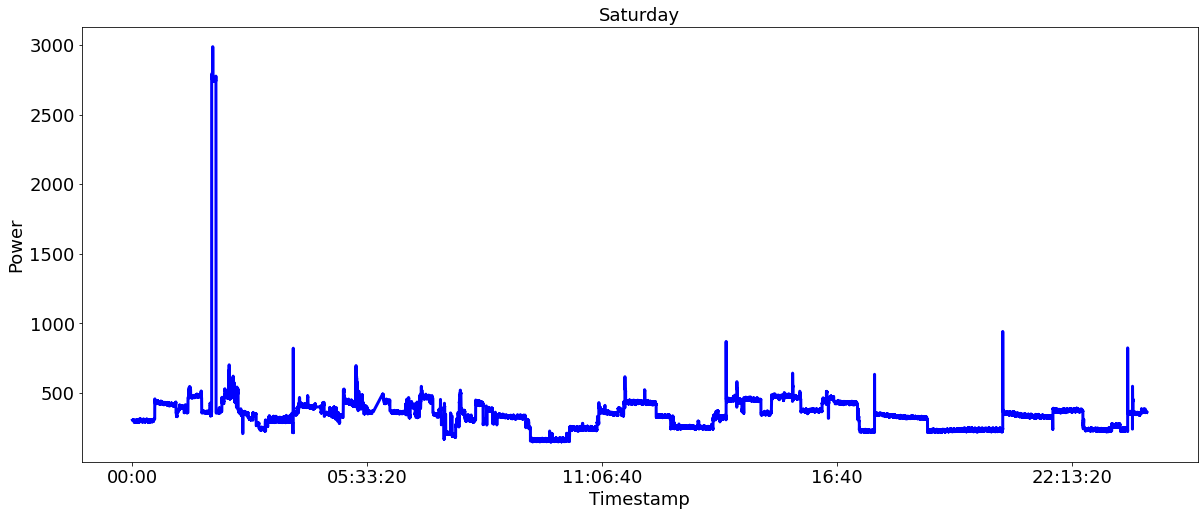

3477230   2013-07-21 00:00:00
3477231   2013-07-21 00:00:01
3477232   2013-07-21 00:00:03
3477233   2013-07-21 00:00:04
3477234   2013-07-21 00:00:05
                  ...        
3530756   2013-07-21 23:59:53
3530757   2013-07-21 23:59:54
3530758   2013-07-21 23:59:55
3530759   2013-07-21 23:59:57
3530760   2013-07-21 23:59:58
Name: Timestamp, Length: 53531, dtype: datetime64[ns]
        Timestamp           W
3477230  00:00:00  362.428099
3477231  00:00:01  361.399515
3477232  00:00:03  377.245214
3477233  00:00:04  377.314185
3477234  00:00:05  376.474003
...           ...         ...
3530756  23:59:53  300.005289
3530757  23:59:54  299.308586
3530758  23:59:55  300.428891
3530759  23:59:57  300.191504
3530760  23:59:58  300.402607

[53531 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

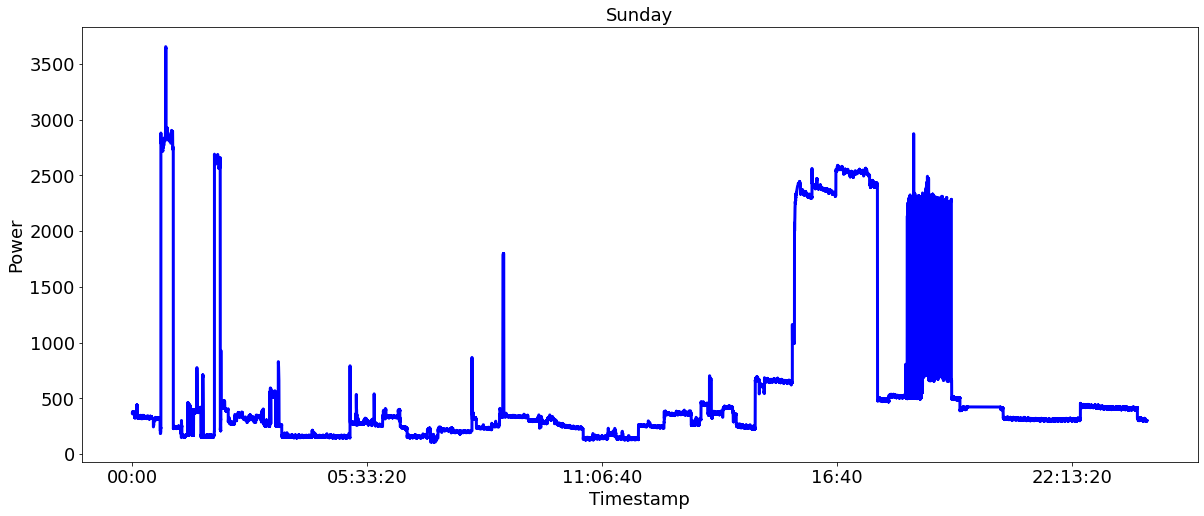

3530761   2013-07-22 00:00:00
3530762   2013-07-22 00:00:01
3530763   2013-07-22 00:00:02
3530764   2013-07-22 00:00:03
3530765   2013-07-22 00:00:04
                  ...        
3591845   2013-07-22 23:59:54
3591846   2013-07-22 23:59:56
3591847   2013-07-22 23:59:57
3591848   2013-07-22 23:59:58
3591849   2013-07-22 23:59:59
Name: Timestamp, Length: 61089, dtype: datetime64[ns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

        Timestamp           W
3530761  00:00:00  300.002591
3530762  00:00:01  300.974703
3530763  00:00:02  317.314999
3530764  00:00:03  317.174894
3530765  00:00:04  317.199497
...           ...         ...
3591845  23:59:54  389.449591
3591846  23:59:56  385.108890
3591847  23:59:57  386.341003
3591848  23:59:58  384.257586
3591849  23:59:59  385.114110

[61089 rows x 2 columns]


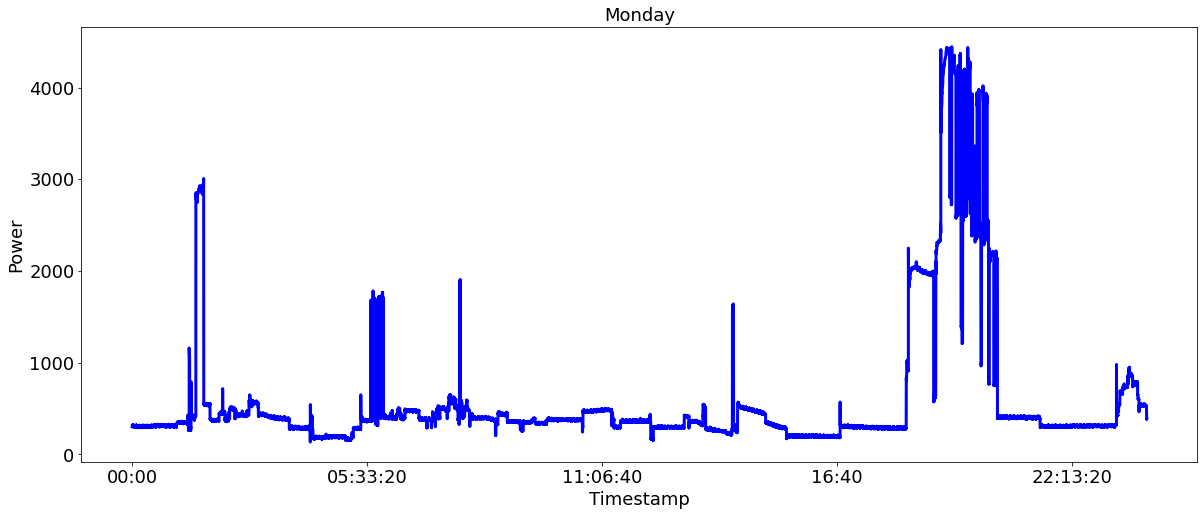

3591850   2013-07-23 00:00:00
3591851   2013-07-23 00:00:04
3591852   2013-07-23 00:00:05
3591853   2013-07-23 00:00:06
3591854   2013-07-23 00:00:07
                  ...        
3654021   2013-07-23 23:59:53
3654022   2013-07-23 23:59:54
3654023   2013-07-23 23:59:57
3654024   2013-07-23 23:59:58
3654025   2013-07-23 23:59:59
Name: Timestamp, Length: 62176, dtype: datetime64[ns]
        Timestamp           W
3591850  00:00:00  421.665889
3591851  00:00:04  415.507507
3591852  00:00:05  418.847487
3591853  00:00:06  420.172711
3591854  00:00:07  414.173912
...           ...         ...
3654021  23:59:53  296.932693
3654022  23:59:54  296.893986
3654023  23:59:57  297.166201
3654024  23:59:58  297.234087
3654025  23:59:59  297.325397

[62176 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

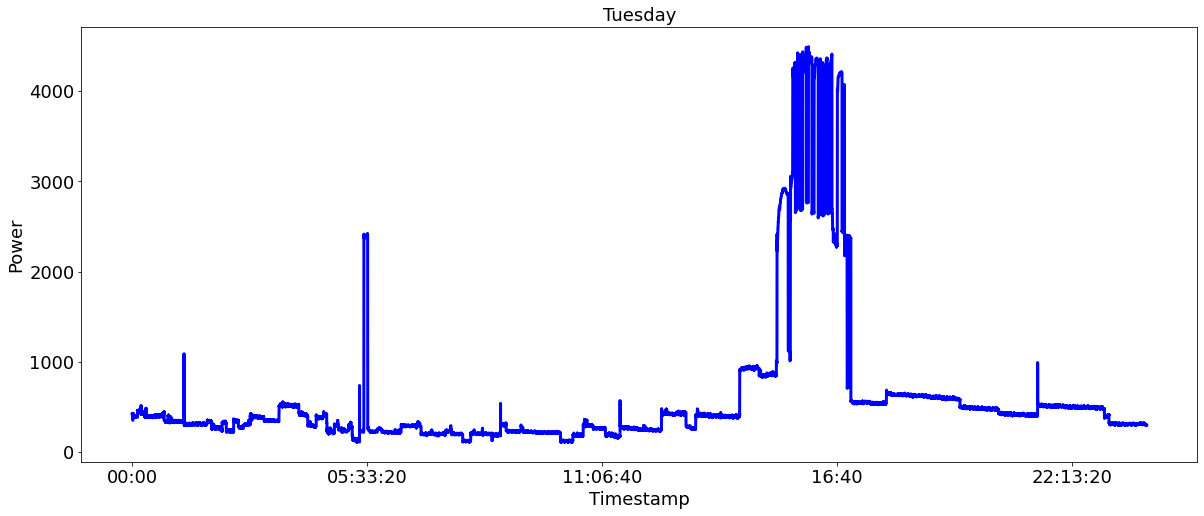

3654026   2013-07-24 00:00:00
3654027   2013-07-24 00:00:03
3654028   2013-07-24 00:00:04
3654029   2013-07-24 00:00:05
3654030   2013-07-24 00:00:06
                  ...        
3721697   2013-07-24 23:59:54
3721698   2013-07-24 23:59:55
3721699   2013-07-24 23:59:56
3721700   2013-07-24 23:59:58
3721701   2013-07-24 23:59:59
Name: Timestamp, Length: 67676, dtype: datetime64[ns]
        Timestamp           W
3654026  00:00:00  297.459411
3654027  00:00:03  314.465911
3654028  00:00:04  315.439707
3654029  00:00:05  315.347300
3654030  00:00:06  313.586910
...           ...         ...
3721697  23:59:54  290.847589
3721698  23:59:55  290.741211
3721699  23:59:56  290.731498
3721700  23:59:58  290.634201
3721701  23:59:59  290.010310

[67676 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

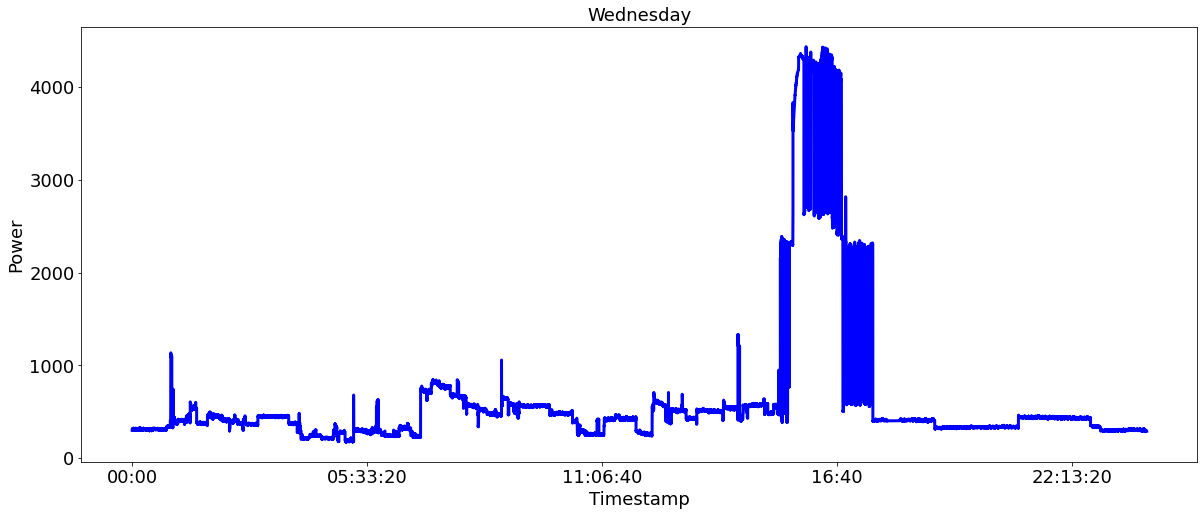

3721702   2013-07-25 00:00:01
3721703   2013-07-25 00:00:02
3721704   2013-07-25 00:00:03
3721705   2013-07-25 00:00:04
3721706   2013-07-25 00:00:06
                  ...        
3791705   2013-07-25 23:59:55
3791706   2013-07-25 23:59:56
3791707   2013-07-25 23:59:57
3791708   2013-07-25 23:59:58
3791709   2013-07-25 23:59:59
Name: Timestamp, Length: 70008, dtype: datetime64[ns]
        Timestamp           W
3721702  00:00:01  289.934091
3721703  00:00:02  290.056185
3721704  00:00:03  305.674992
3721705  00:00:04  305.714386
3721706  00:00:06  304.954690
...           ...         ...
3791705  23:59:55  370.893588
3791706  23:59:56  371.070812
3791707  23:59:57  372.022198
3791708  23:59:58  371.717295
3791709  23:59:59  371.643887

[70008 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

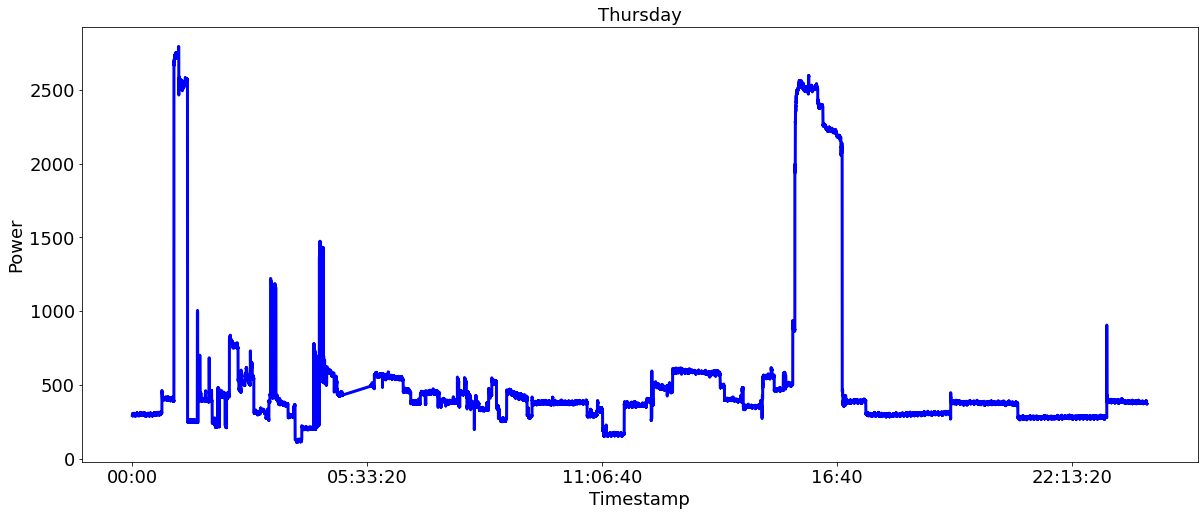

3791710   2013-07-26 00:00:01
3791711   2013-07-26 00:00:02
3791712   2013-07-26 00:00:03
3791713   2013-07-26 00:00:04
3791714   2013-07-26 00:00:05
                  ...        
3860846   2013-07-26 23:59:51
3860847   2013-07-26 23:59:52
3860848   2013-07-26 23:59:55
3860849   2013-07-26 23:59:56
3860850   2013-07-26 23:59:59
Name: Timestamp, Length: 69141, dtype: datetime64[ns]
        Timestamp           W
3791710  00:00:01  370.799004
3791711  00:00:02  372.114614
3791712  00:00:03  372.510302
3791713  00:00:04  372.960302
3791714  00:00:05  382.231588
...           ...         ...
3860846  23:59:51  448.223288
3860847  23:59:52  439.453691
3860848  23:59:55  442.331604
3860849  23:59:56  441.496994
3860850  23:59:59  443.732096

[69141 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

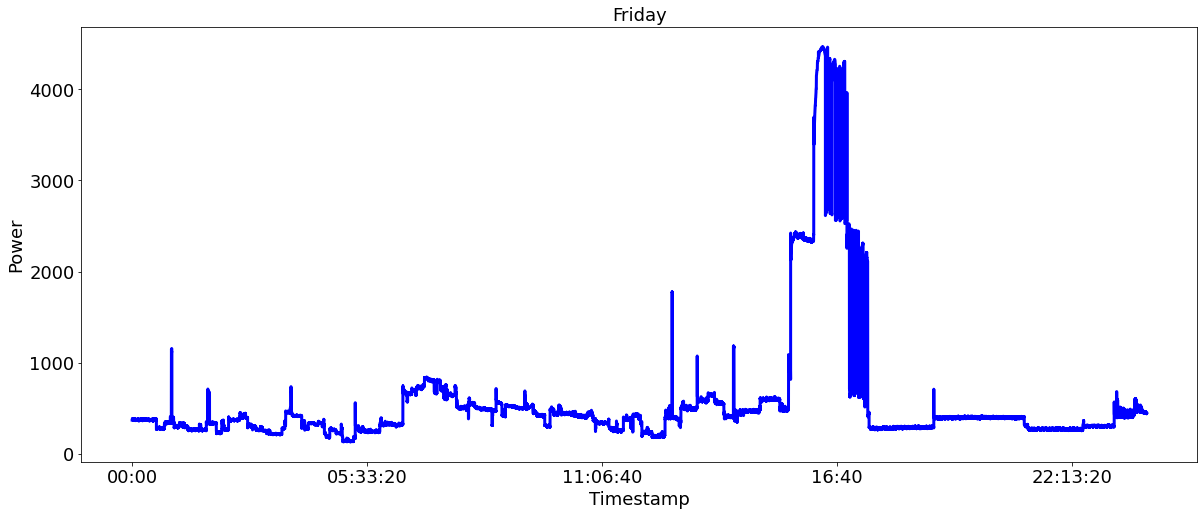

3860851   2013-07-27 00:00:00
3860852   2013-07-27 00:00:03
3860853   2013-07-27 00:00:04
3860854   2013-07-27 00:00:07
3860855   2013-07-27 00:00:10
                  ...        
3918098   2013-07-27 23:59:54
3918099   2013-07-27 23:59:55
3918100   2013-07-27 23:59:56
3918101   2013-07-27 23:59:58
3918102   2013-07-27 23:59:59
Name: Timestamp, Length: 57252, dtype: datetime64[ns]
        Timestamp           W
3860851  00:00:00  442.138903
3860852  00:00:03  441.514198
3860853  00:00:04  441.534206
3860854  00:00:07  442.707207
3860855  00:00:10  445.475214
...           ...         ...
3918098  23:59:54  388.132111
3918099  23:59:55  388.147705
3918100  23:59:56  388.918114
3918101  23:59:58  388.906588
3918102  23:59:59  388.910394

[57252 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

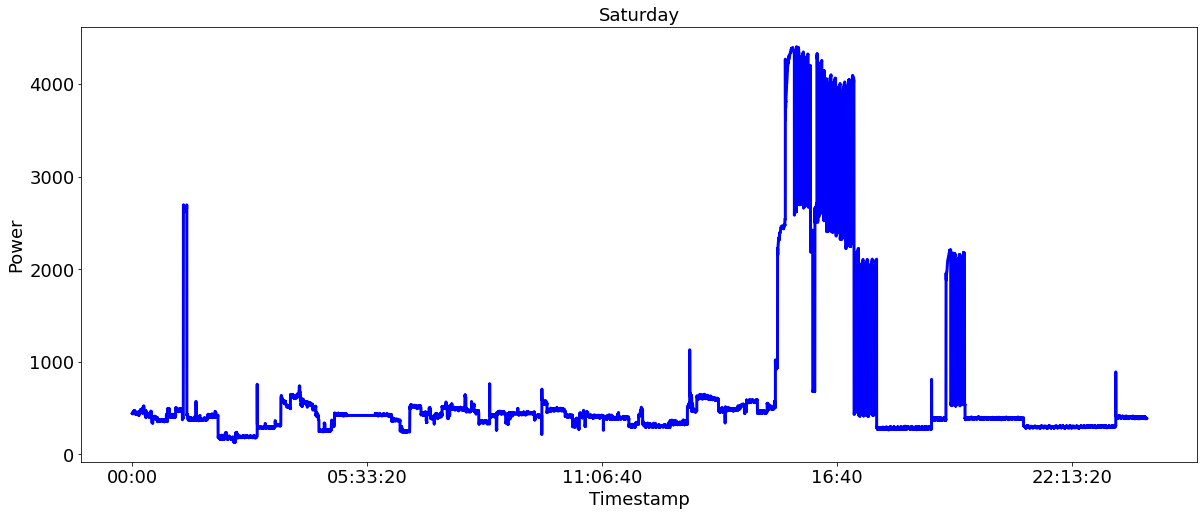

3918103   2013-07-28 00:00:00
3918104   2013-07-28 00:00:04
3918105   2013-07-28 00:00:05
3918106   2013-07-28 00:00:06
3918107   2013-07-28 00:00:08
                  ...        
3970376   2013-07-28 23:59:53
3970377   2013-07-28 23:59:55
3970378   2013-07-28 23:59:56
3970379   2013-07-28 23:59:58
3970380   2013-07-28 23:59:59
Name: Timestamp, Length: 52278, dtype: datetime64[ns]
        Timestamp           W
3918103  00:00:00  388.878602
3918104  00:00:04  403.097210
3918105  00:00:05  401.593306
3918106  00:00:06  401.731604
3918107  00:00:08  402.033392
...           ...         ...
3970376  23:59:53  155.797099
3970377  23:59:55  154.027095
3970378  23:59:56  155.361403
3970379  23:59:58  154.811596
3970380  23:59:59  155.393098

[52278 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

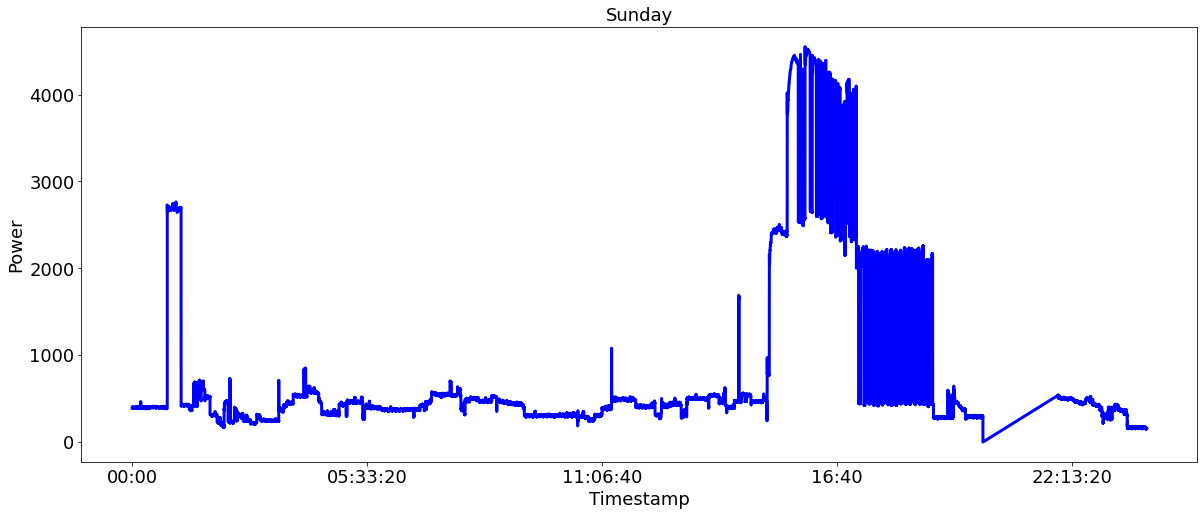

3970381   2013-07-29 00:00:01
3970382   2013-07-29 00:00:02
3970383   2013-07-29 00:00:04
3970384   2013-07-29 00:00:05
3970385   2013-07-29 00:00:06
                  ...        
4022586   2013-07-29 23:59:53
4022587   2013-07-29 23:59:54
4022588   2013-07-29 23:59:56
4022589   2013-07-29 23:59:57
4022590   2013-07-29 23:59:59
Name: Timestamp, Length: 52210, dtype: datetime64[ns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

        Timestamp           W
3970381  00:00:01  158.316095
3970382  00:00:02  167.839204
3970383  00:00:04  171.876696
3970384  00:00:05  171.731396
3970385  00:00:06  171.896504
...           ...         ...
4022586  23:59:53  385.067715
4022587  23:59:54  383.854112
4022588  23:59:56  386.674294
4022589  23:59:57  386.635195
4022590  23:59:59  383.191195

[52210 rows x 2 columns]


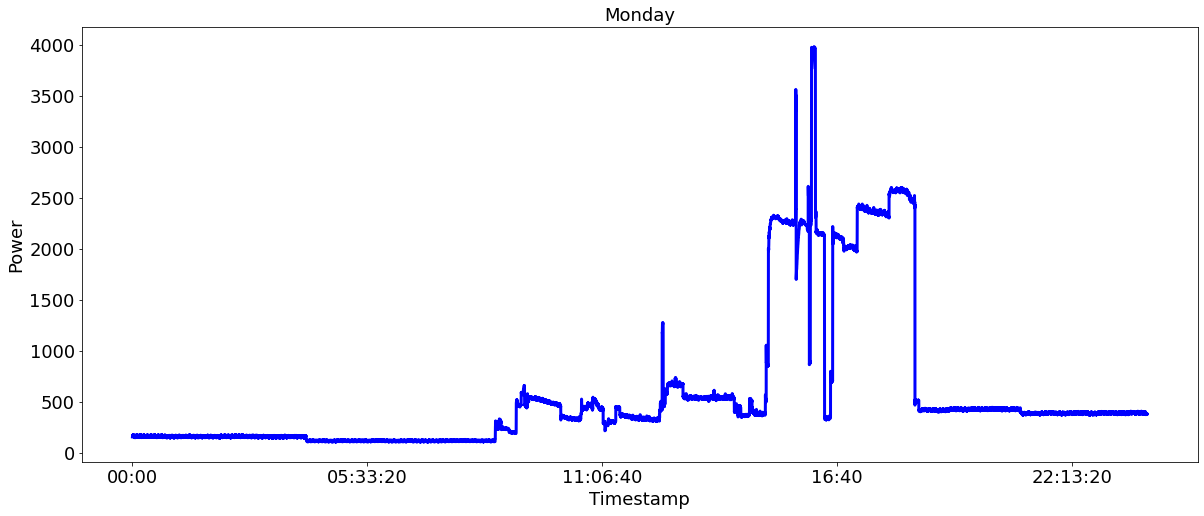

4022591   2013-07-30 00:00:00
4022592   2013-07-30 00:00:02
4022593   2013-07-30 00:00:03
4022594   2013-07-30 00:00:05
4022595   2013-07-30 00:00:06
                  ...        
4081471   2013-07-30 23:59:54
4081472   2013-07-30 23:59:55
4081473   2013-07-30 23:59:56
4081474   2013-07-30 23:59:57
4081475   2013-07-30 23:59:58
Name: Timestamp, Length: 58885, dtype: datetime64[ns]
        Timestamp           W
4022591  00:00:00  383.126507
4022592  00:00:02  398.756603
4022593  00:00:03  402.724411
4022594  00:00:05  398.462105
4022595  00:00:06  398.345106
...           ...         ...
4081471  23:59:54  373.882090
4081472  23:59:55  373.787086
4081473  23:59:56  373.934405
4081474  23:59:57  375.279202
4081475  23:59:58  373.488585

[58885 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

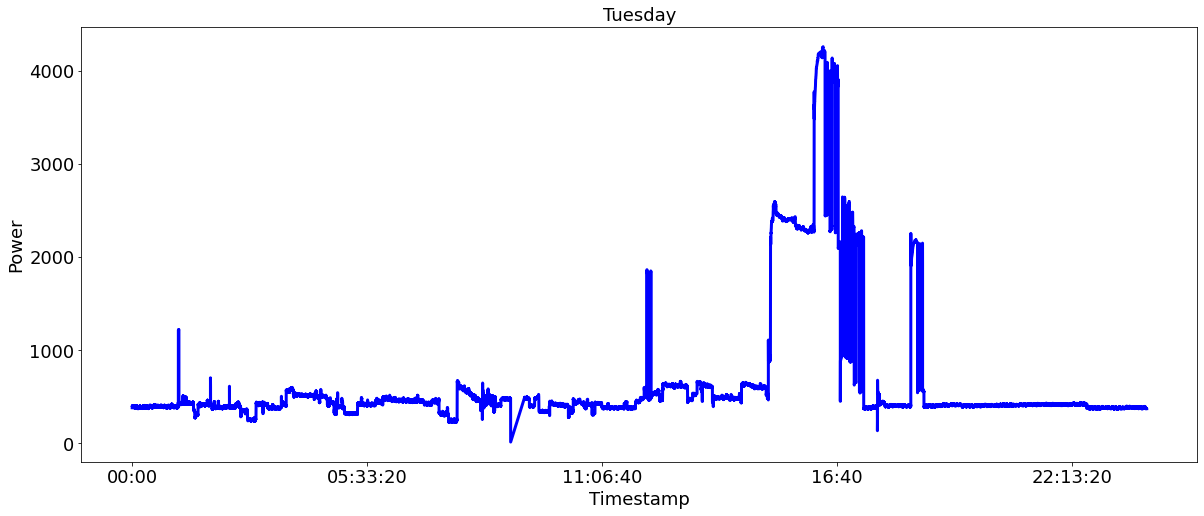

4081476   2013-07-31 00:00:00
4081477   2013-07-31 00:00:01
4081478   2013-07-31 00:00:05
4081479   2013-07-31 00:00:06
4081480   2013-07-31 00:00:08
                  ...        
4130468   2013-07-31 23:59:54
4130469   2013-07-31 23:59:55
4130470   2013-07-31 23:59:56
4130471   2013-07-31 23:59:57
4130472   2013-07-31 23:59:58
Name: Timestamp, Length: 48997, dtype: datetime64[ns]
        Timestamp           W
4081476  00:00:00  373.393914
4081477  00:00:01  373.490001
4081478  00:00:05  387.301609
4081479  00:00:06  387.334601
4081480  00:00:08  391.414886
...           ...         ...
4130468  23:59:54  373.770007
4130469  23:59:55  378.801207
4130470  23:59:56  378.820013
4130471  23:59:57  378.873891
4130472  23:59:58  378.978214

[48997 rows x 2 columns]


<ipython-input-24-4dac8f44c3ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-24-4dac8f44c3ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

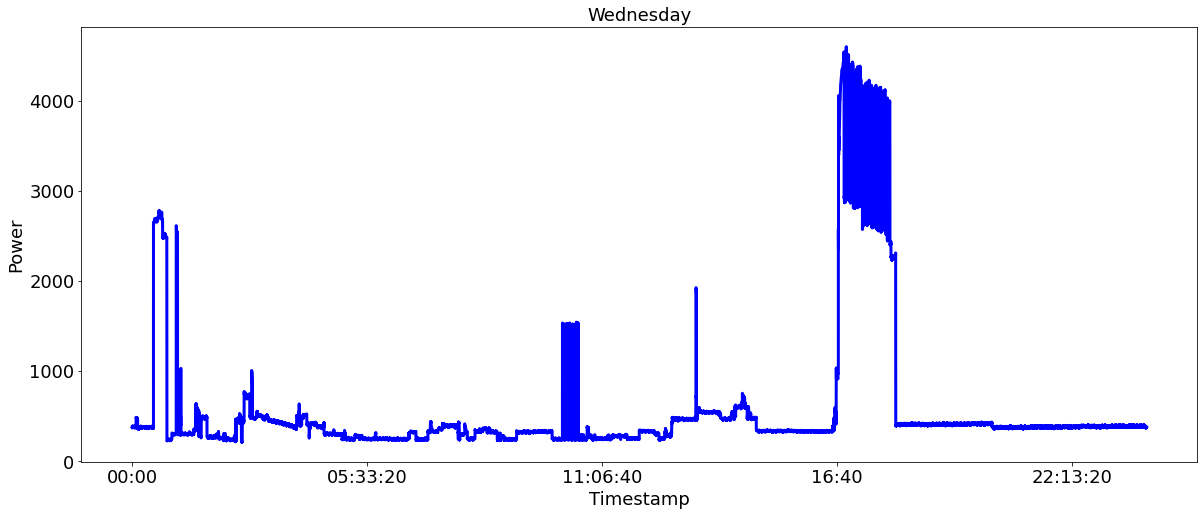

In [24]:
for i in range (1,32):
    start = pd.to_datetime(date(2013,7,i))
    end = start + timedelta(days=1)
    day = start.day_name()
    x = x + 1
    df_1 = df[(df['Timestamp'] >=start) & (df['Timestamp'] < end)]
    print( df_1['Timestamp'])
    df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
    df_1['Timestamp']=df_1['Time']
    df_1.drop('Time',axis=1,inplace=True)
    print(df_1)
    df_1.groupby('Timestamp')['W'].sum().plot(kind='line',linewidth= 3,figsize=(20,8),color='blue',fontsize=18)
    plt.ylabel('Power',fontsize=18)
    plt.xlabel('Timestamp',fontsize=18)
    plt.title(day,fontsize=18)
    plt.show()
    df_1.to_csv(r'Dataset_combined/Day{0}_{1}.csv'.format(x,day))

4130473   2013-08-01 00:00:00
4130474   2013-08-01 00:00:01
4130475   2013-08-01 00:00:03
4130476   2013-08-01 00:00:04
4130477   2013-08-01 00:00:05
                  ...        
4180907   2013-08-01 23:59:54
4180908   2013-08-01 23:59:55
4180909   2013-08-01 23:59:56
4180910   2013-08-01 23:59:58
4180911   2013-08-01 23:59:59
Name: Timestamp, Length: 50439, dtype: datetime64[ns]
        Timestamp           W
4130473  00:00:00  382.725394
4130474  00:00:01  383.812390
4130475  00:00:03  396.628590
4130476  00:00:04  401.049584
4130477  00:00:05  400.773186
...           ...         ...
4180907  23:59:54  393.574291
4180908  23:59:55  393.587391
4180909  23:59:56  393.468512
4180910  23:59:58  393.383608
4180911  23:59:59  393.263689

[50439 rows x 2 columns]


<ipython-input-25-470da2d052ee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-25-470da2d052ee>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

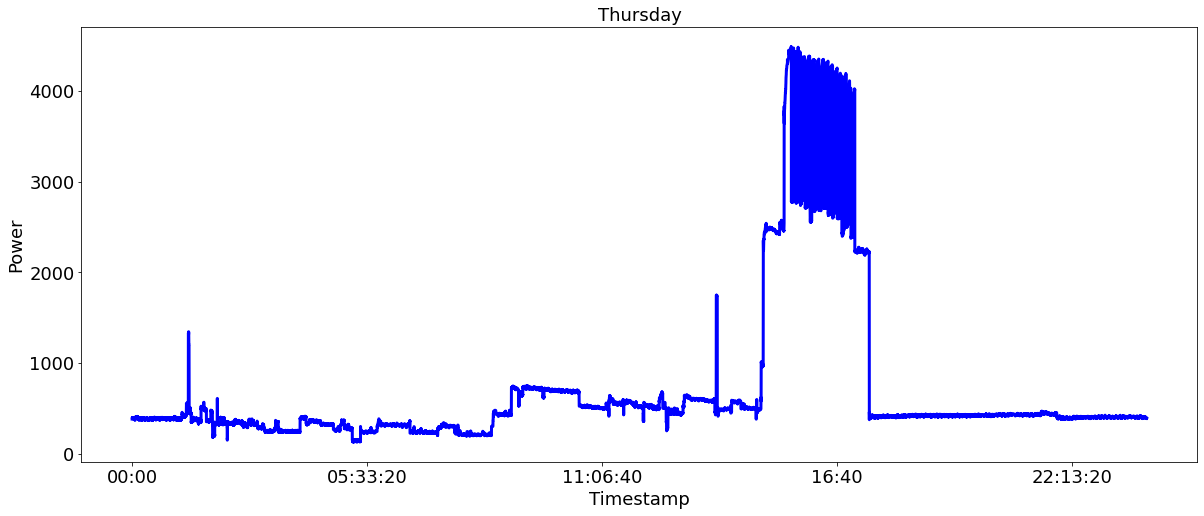

4180912   2013-08-02 00:00:00
4180913   2013-08-02 00:00:01
4180914   2013-08-02 00:00:02
4180915   2013-08-02 00:00:05
4180916   2013-08-02 00:00:08
                  ...        
4234747   2013-08-02 22:19:48
4234748   2013-08-02 22:19:52
4234749   2013-08-02 22:19:53
4234750   2013-08-02 22:19:55
4234751   2013-08-02 22:19:56
Name: Timestamp, Length: 53840, dtype: datetime64[ns]
        Timestamp           W
4180912  00:00:00  393.187895
4180913  00:00:01  393.275307
4180914  00:00:02  393.868895
4180915  00:00:05  408.956613
4180916  00:00:08  405.242199
...           ...         ...
4234747  22:19:48  486.307689
4234748  22:19:52  485.320902
4234749  22:19:53  485.322798
4234750  22:19:55  485.328608
4234751  22:19:56  485.323713

[53840 rows x 2 columns]


<ipython-input-25-470da2d052ee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-25-470da2d052ee>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

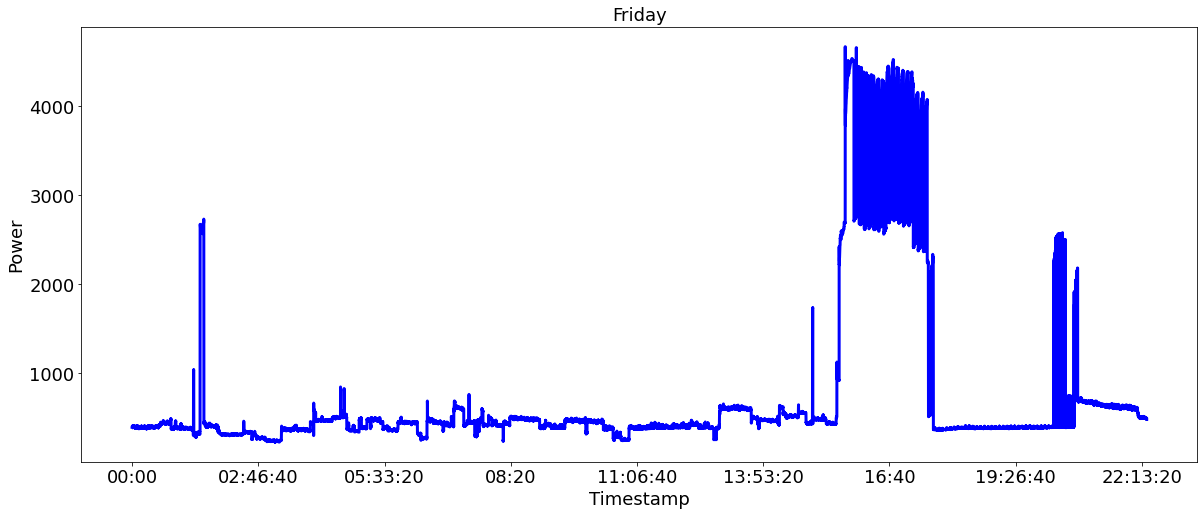

4234752   2013-08-03 00:38:35
4234753   2013-08-03 00:38:36
4234754   2013-08-03 00:38:38
4234755   2013-08-03 00:38:39
4234756   2013-08-03 00:38:40
                  ...        
4288648   2013-08-03 23:59:51
4288649   2013-08-03 23:59:54
4288650   2013-08-03 23:59:57
4288651   2013-08-03 23:59:58
4288652   2013-08-03 23:59:59
Name: Timestamp, Length: 53901, dtype: datetime64[ns]
        Timestamp           W
4234752  00:38:35  484.722594
4234753  00:38:36  484.631798
4234754  00:38:38  485.308604
4234755  00:38:39  485.200588
4234756  00:38:40  484.381989
...           ...         ...
4288648  23:59:51  414.702109
4288649  23:59:54  417.439800
4288650  23:59:57  409.050600
4288651  23:59:58  414.708199
4288652  23:59:59  414.827000

[53901 rows x 2 columns]


<ipython-input-25-470da2d052ee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-25-470da2d052ee>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

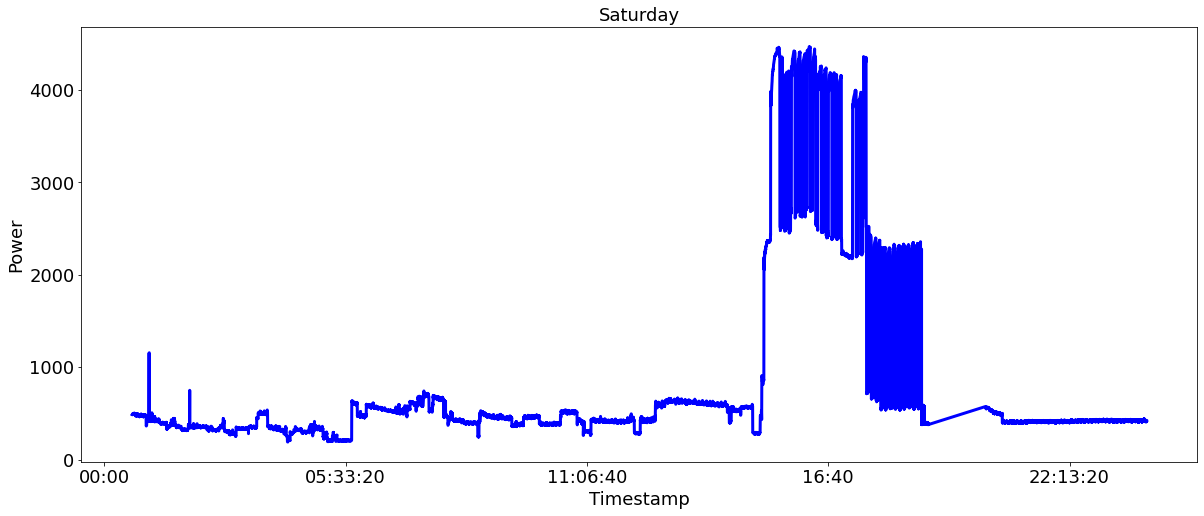

4288653   2013-08-04 00:00:00
4288654   2013-08-04 00:00:01
4288655   2013-08-04 00:00:02
4288656   2013-08-04 00:00:03
4288657   2013-08-04 00:00:04
                  ...        
4346970   2013-08-04 23:59:53
4346971   2013-08-04 23:59:54
4346972   2013-08-04 23:59:56
4346973   2013-08-04 23:59:57
4346974   2013-08-04 23:59:58
Name: Timestamp, Length: 58322, dtype: datetime64[ns]


<ipython-input-25-470da2d052ee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-25-470da2d052ee>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

        Timestamp           W
4288653  00:00:00  414.827000
4288654  00:00:01  419.166194
4288655  00:00:02  431.692307
4288656  00:00:03  431.692307
4288657  00:00:04  432.459192
...           ...         ...
4346970  23:59:53  384.395403
4346971  23:59:54  378.236401
4346972  23:59:56  384.291710
4346973  23:59:57  380.063911
4346974  23:59:58  384.424694

[58322 rows x 2 columns]


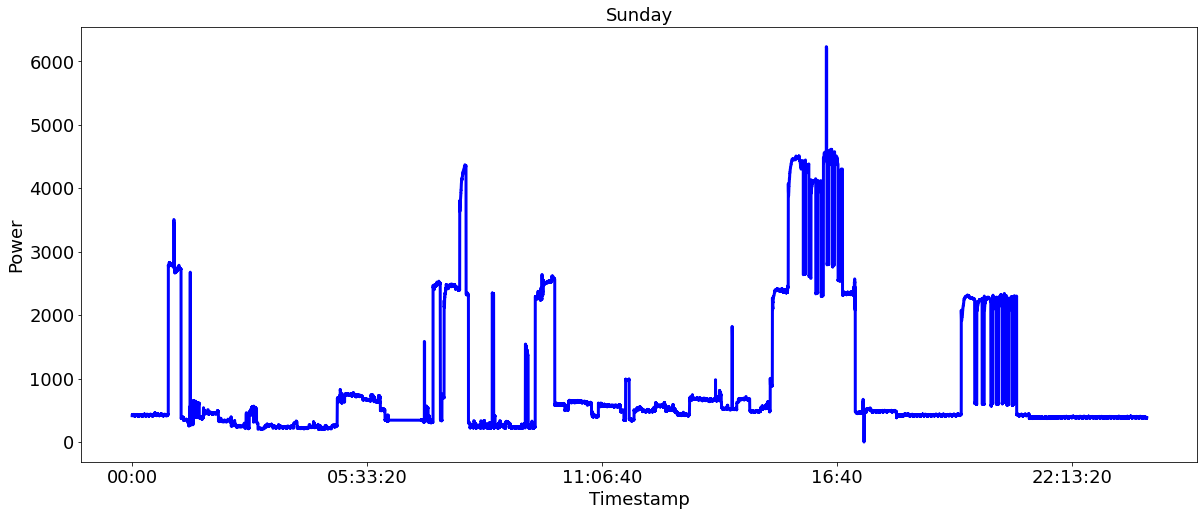

4346975   2013-08-05 00:00:00
4346976   2013-08-05 00:00:01
4346977   2013-08-05 00:00:02
4346978   2013-08-05 00:00:03
4346979   2013-08-05 00:00:04
                  ...        
4391054   2013-08-05 15:33:10
4391055   2013-08-05 15:33:11
4391056   2013-08-05 15:33:12
4391057   2013-08-05 15:33:15
4391058   2013-08-05 15:33:16
Name: Timestamp, Length: 44084, dtype: datetime64[ns]
        Timestamp           W
4346975  00:00:00  384.524092
4346976  00:00:01  375.453090
4346977  00:00:02  399.408600
4346978  00:00:03  400.232792
4346979  00:00:04  394.226805
...           ...         ...
4391054  15:33:10  711.764891
4391055  15:33:11  711.764891
4391056  15:33:12  711.911695
4391057  15:33:15  712.182676
4391058  15:33:16   14.929300

[44084 rows x 2 columns]


<ipython-input-25-470da2d052ee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
<ipython-input-25-470da2d052ee>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

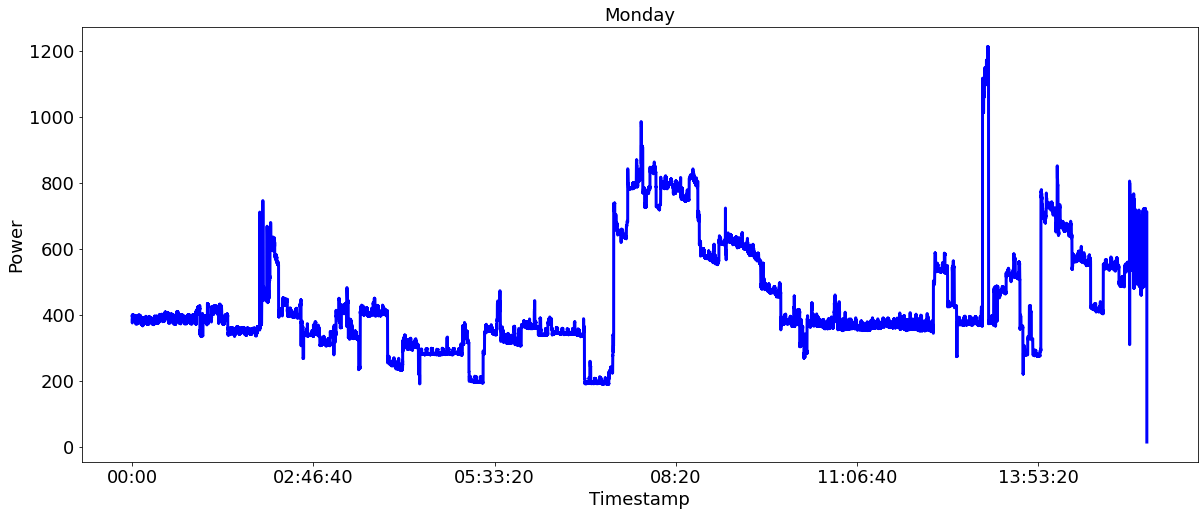

In [25]:
for i in range (1,6):
    start = pd.to_datetime(date(2013,8,i))
    end = start + timedelta(days=1)
    day = start.day_name()
    x = x + 1
    df_1 = df[(df['Timestamp'] >=start) & (df['Timestamp'] < end)]
    print( df_1['Timestamp'])
    df_1['Time']= pd.to_datetime(df_1['Timestamp']).dt.time
    df_1['Timestamp']=df_1['Time']
    df_1.drop('Time',axis=1,inplace=True)
    print(df_1)
    df_1.groupby('Timestamp')['W'].sum().plot(kind='line',linewidth= 3,figsize=(20,8),color='blue',fontsize=18)
    plt.ylabel('Power',fontsize=18)
    plt.xlabel('Timestamp',fontsize=18)
    plt.title(day,fontsize=18)
    plt.show()
    df_1.to_csv(r'Dataset_combined/Day{0}_{1}.csv'.format(x,day))

In [26]:
df

Timestamp           W
0       2013-05-24 00:00:00  282.744995
1       2013-05-24 00:00:01  288.757996
2       2013-05-24 00:00:02  288.757996
3       2013-05-24 00:00:03  297.394012
4       2013-05-24 00:00:04  303.722992
...                     ...         ...
4391054 2013-08-05 15:33:10  711.764891
4391055 2013-08-05 15:33:11  711.764891
4391056 2013-08-05 15:33:12  711.911695
4391057 2013-08-05 15:33:15  712.182676
4391058 2013-08-05 15:33:16   14.929300

[4391059 rows x 2 columns]

In [28]:
df['Day']=pd.to_datetime(df['Timestamp']).dt.dayofweek
df

Timestamp           W  Day
0       2013-05-24 00:00:00  282.744995    4
1       2013-05-24 00:00:01  288.757996    4
2       2013-05-24 00:00:02  288.757996    4
3       2013-05-24 00:00:03  297.394012    4
4       2013-05-24 00:00:04  303.722992    4
...                     ...         ...  ...
4391054 2013-08-05 15:33:10  711.764891    0
4391055 2013-08-05 15:33:11  711.764891    0
4391056 2013-08-05 15:33:12  711.911695    0
4391057 2013-08-05 15:33:15  712.182676    0
4391058 2013-08-05 15:33:16   14.929300    0

[4391059 rows x 3 columns]

In [29]:
df['Hour']=pd.to_datetime(df['Timestamp']).dt.hour
df['Minute']=pd.to_datetime(df['Timestamp']).dt.minute
df['Seconds']=pd.to_datetime(df['Timestamp']).dt.second
df.drop('Timestamp',axis=1,inplace=True)

In [30]:
df

W  Day  Hour  Minute  Seconds
0        282.744995    4     0       0        0
1        288.757996    4     0       0        1
2        288.757996    4     0       0        2
3        297.394012    4     0       0        3
4        303.722992    4     0       0        4
...             ...  ...   ...     ...      ...
4391054  711.764891    0    15      33       10
4391055  711.764891    0    15      33       11
4391056  711.911695    0    15      33       12
4391057  712.182676    0    15      33       15
4391058   14.929300    0    15      33       16

[4391059 rows x 5 columns]

In [31]:
scaler = MinMaxScaler(feature_range=(0,1))
df_1=scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_1,columns=df.columns)
df_scaled

W       Day      Hour    Minute   Seconds
0        0.031729  0.666667  0.000000  0.000000  0.000000
1        0.032404  0.666667  0.000000  0.000000  0.016949
2        0.032404  0.666667  0.000000  0.000000  0.033898
3        0.033373  0.666667  0.000000  0.000000  0.050847
4        0.034083  0.666667  0.000000  0.000000  0.067797
...           ...       ...       ...       ...       ...
4391054  0.079873  0.000000  0.652174  0.559322  0.169492
4391055  0.079873  0.000000  0.652174  0.559322  0.186441
4391056  0.079890  0.000000  0.652174  0.559322  0.203390
4391057  0.079920  0.000000  0.652174  0.559322  0.254237
4391058  0.001675  0.000000  0.652174  0.559322  0.271186

[4391059 rows x 5 columns]

In [32]:
X=df_scaled.drop('W',axis=1)
y=df_scaled['W']
X = np.asarray(X).astype(np.float32)
y= np.asarray(y).astype(np.float32)

In [33]:
df_scaled.isnull().sum()

W          0
Day        0
Hour       0
Minute     0
Seconds    0
dtype: int64

In [34]:
training_size=int(len(df)*0.80)
test_size=len(df)-training_size
X_train,y_train,X_test,y_test=df_scaled.iloc[0:training_size,1:5],df_scaled.iloc[0:training_size,0],df_scaled.iloc[training_size:len(df),1:5],df_scaled.iloc[training_size:len(df),0]
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(3512847, 4) (3512847,) (878212, 4) (878212,)


In [35]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test  = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [36]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(1,4)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 50)             11000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 31,251
Trainable params: 31,251
Non-trainable params: 0
_________________________________________________________________


In [37]:
model_history=model.fit(X_train, y_train, batch_size = 256,epochs = 10, validation_data=(X_test,y_test),verbose=1)

Epoch 1/10
13723/13723 [==============================] - 153s 10ms/step - loss: 0.0096 - val_loss: 0.0055
Epoch 2/10
13723/13723 [==============================] - 130s 9ms/step - loss: 0.0081 - val_loss: 0.0053
Epoch 3/10
13723/13723 [==============================] - 130s 9ms/step - loss: 0.0081 - val_loss: 0.0063
Epoch 4/10
13723/13723 [==============================] - 134s 10ms/step - loss: 0.0080 - val_loss: 0.0057
Epoch 5/10
13723/13723 [==============================] - 178s 13ms/step - loss: 0.0080 - val_loss: 0.0062
Epoch 6/10
13723/13723 [==============================] - 149s 11ms/step - loss: 0.0080 - val_loss: 0.0062
Epoch 7/10
13723/13723 [==============================] - 144s 11ms/step - loss: 0.0079 - val_loss: 0.0064
Epoch 8/10
13723/13723 [==============================] - 142s 10ms/step - loss: 0.0079 - val_loss: 0.0058
Epoch 9/10
13723/13723 [==============================] - 136s 10ms/step - loss: 0.0079 - val_loss: 0.0060
Epoch 10/10
13723/13723 [==============

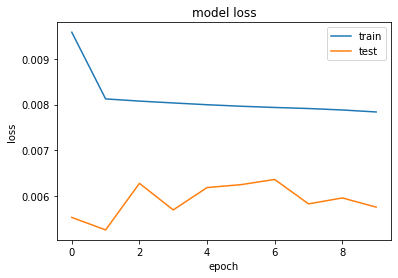

In [38]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [39]:
size = df.shape[1]

In [40]:
yhat = model.predict(X_test)

In [41]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2])

In [42]:
inv_yhat = np.concatenate((yhat, X_test[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat.shape

(878212,)

In [43]:
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y.shape

(878212,)

In [44]:
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 675.936


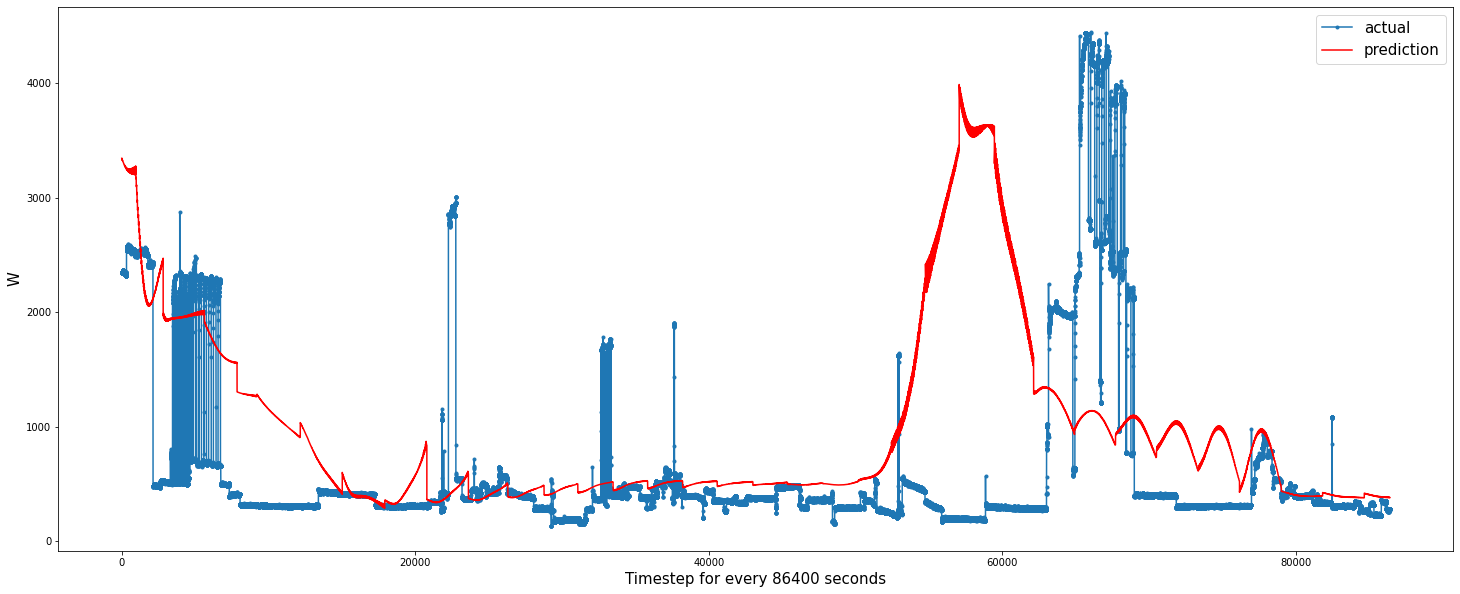

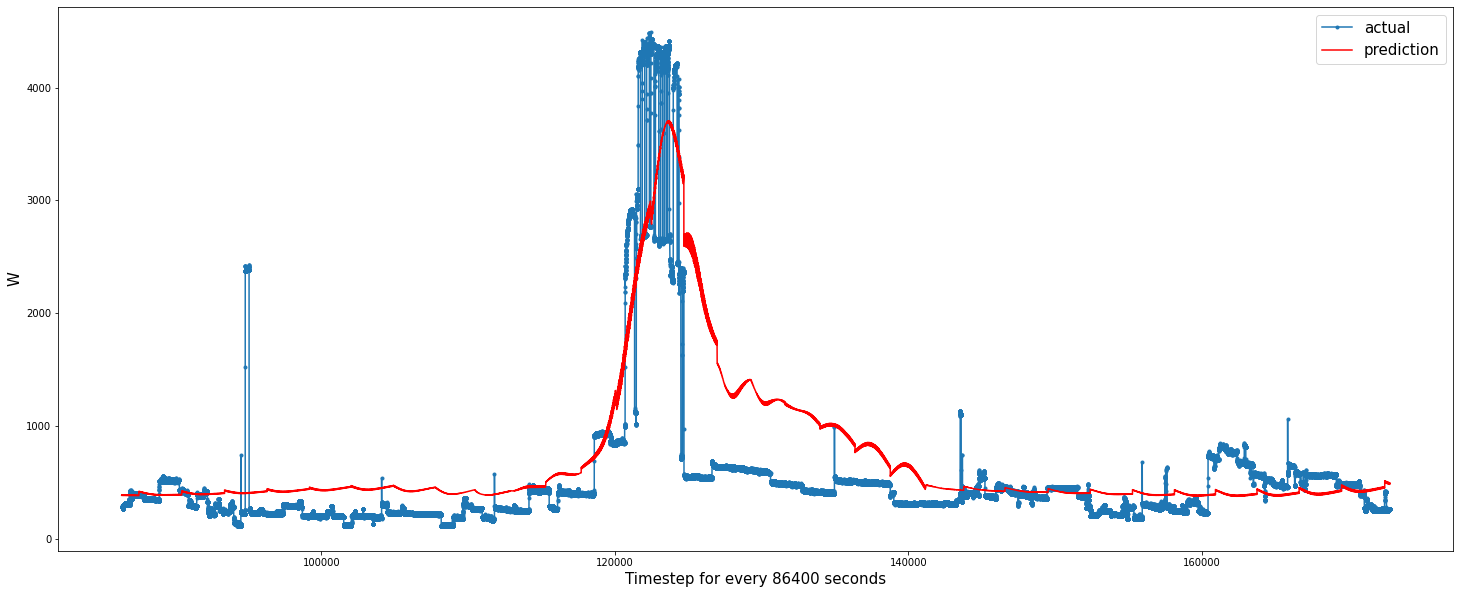

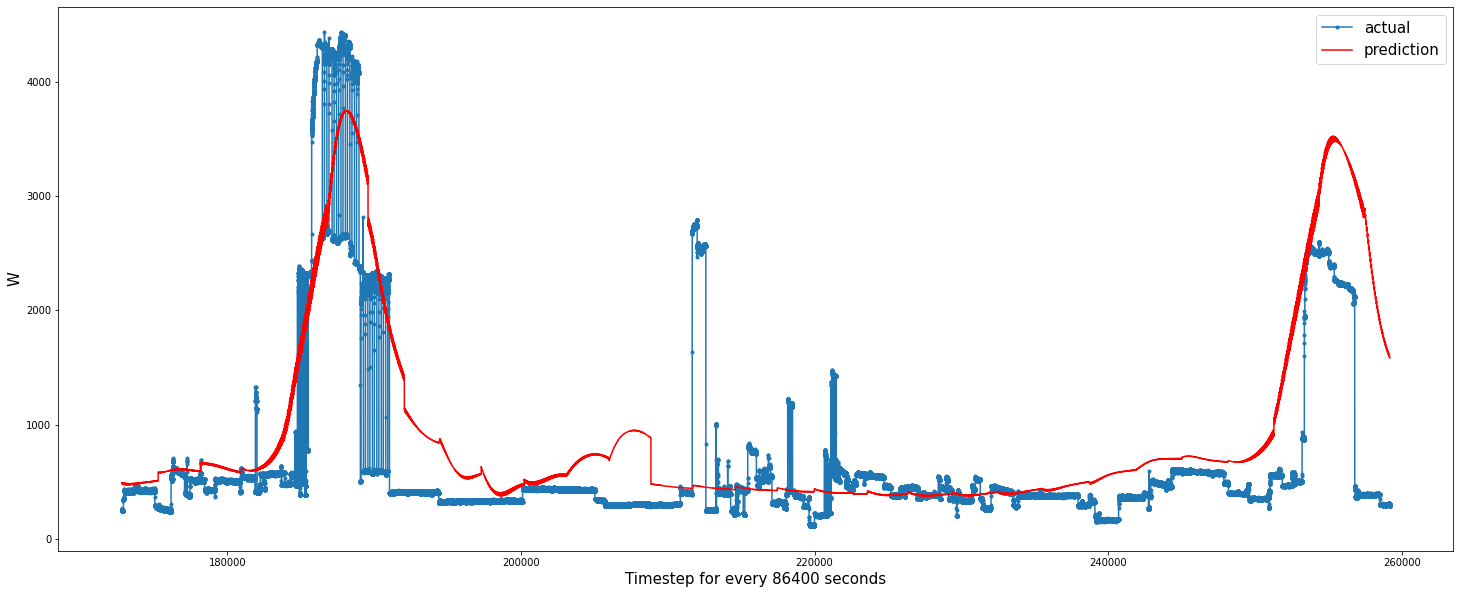

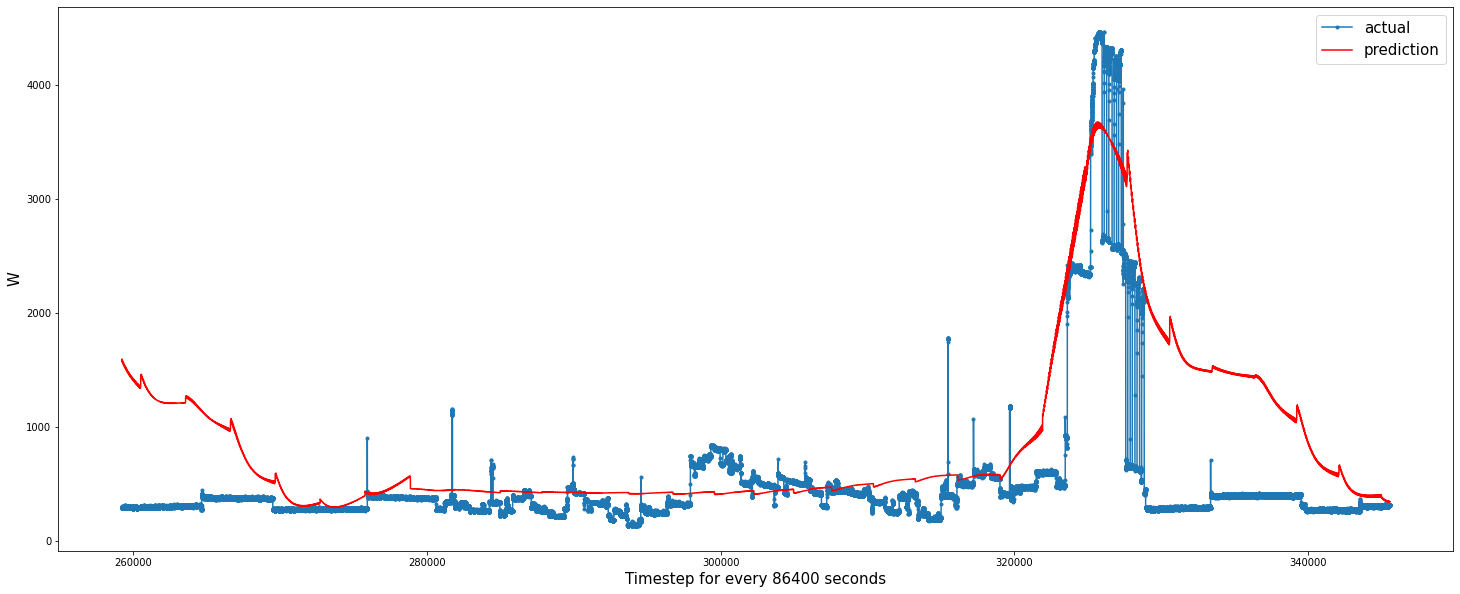

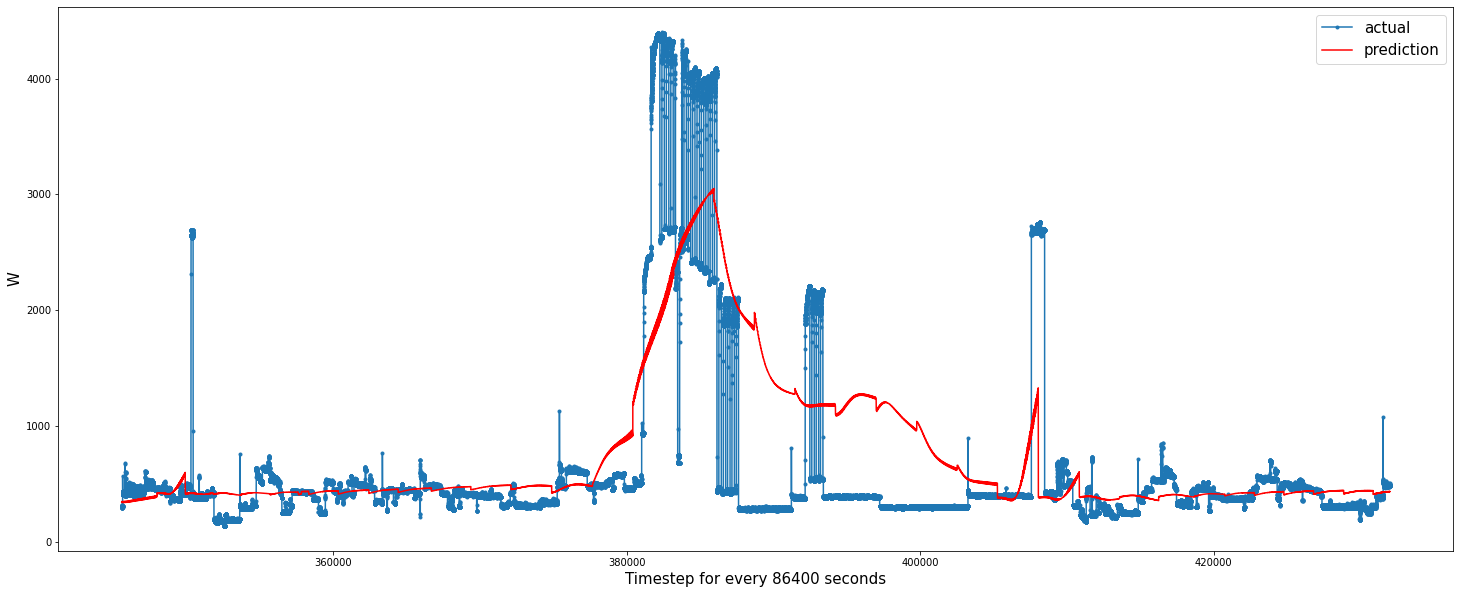

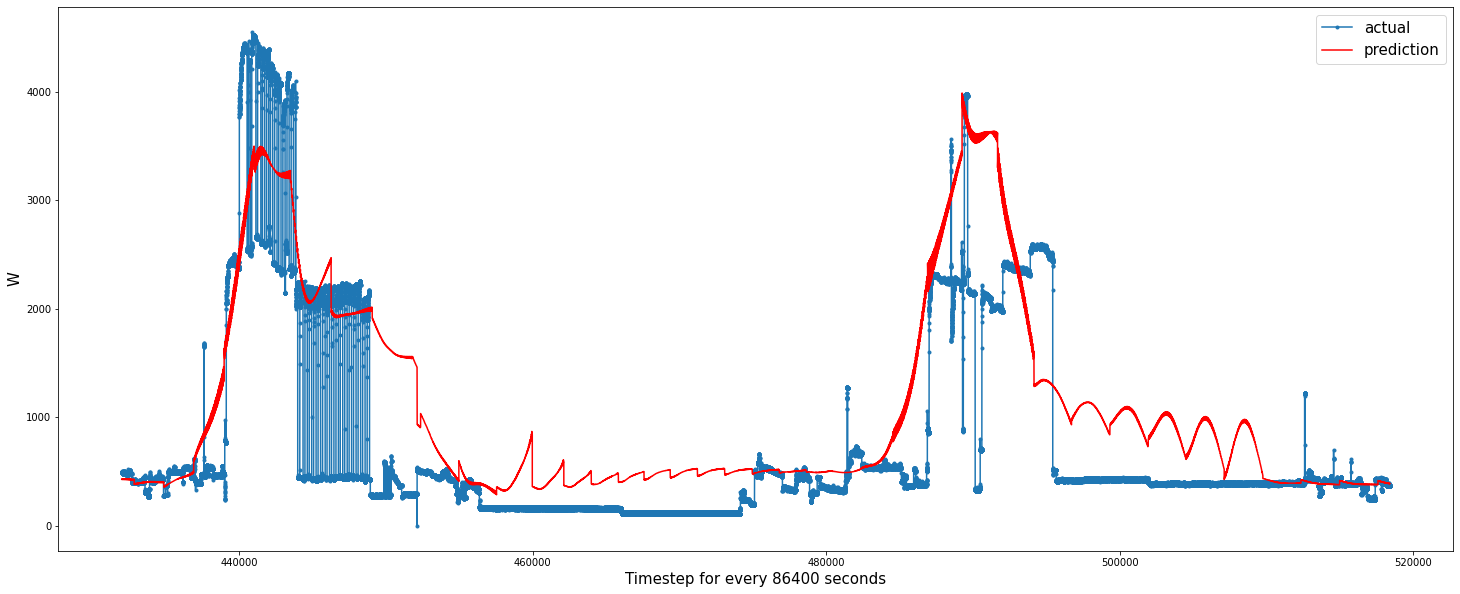

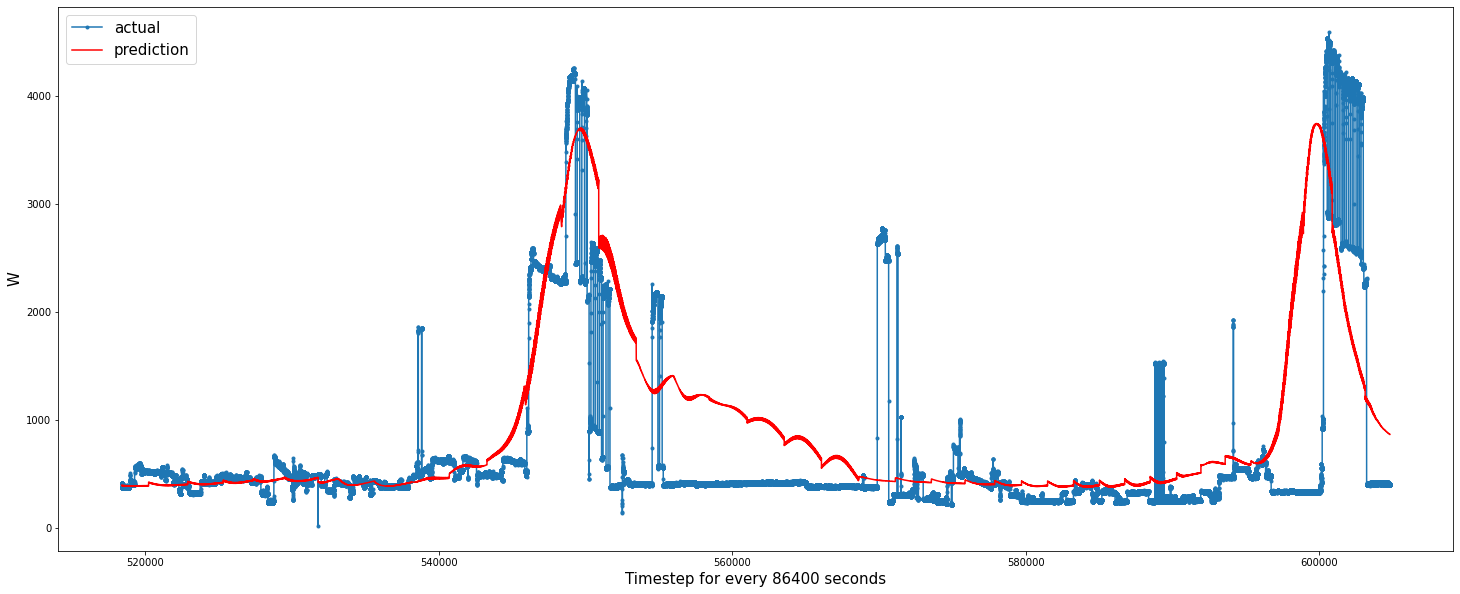

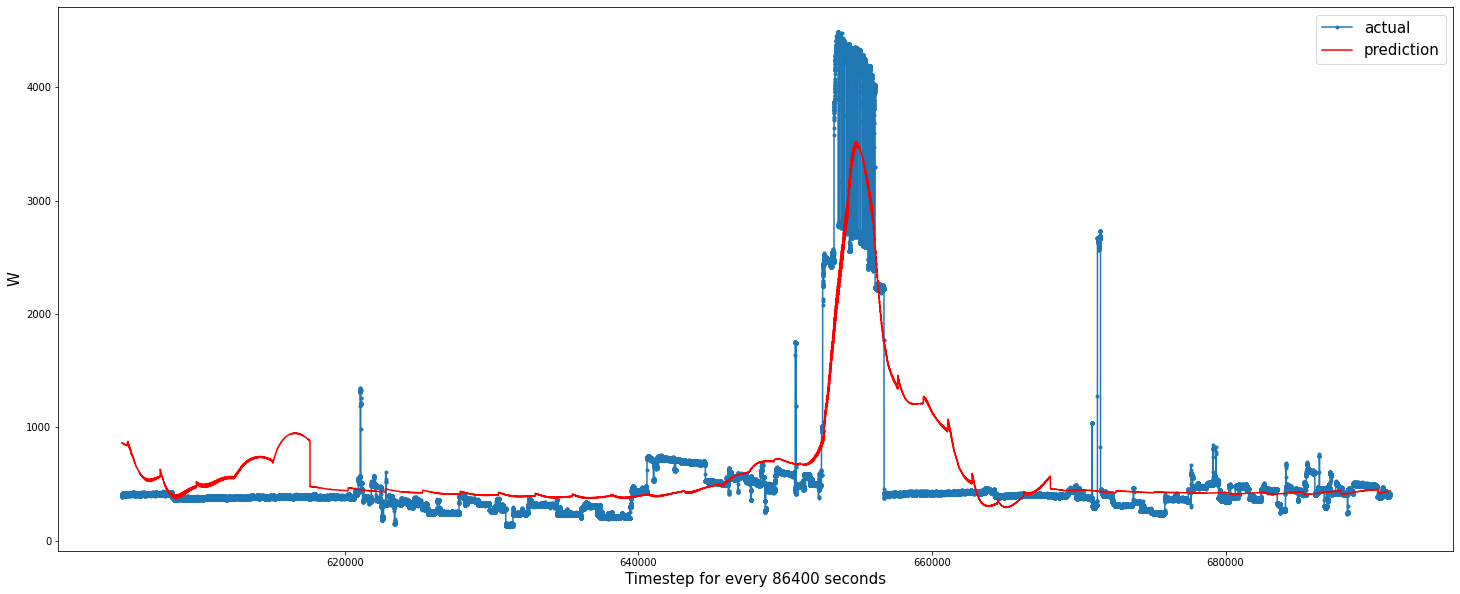

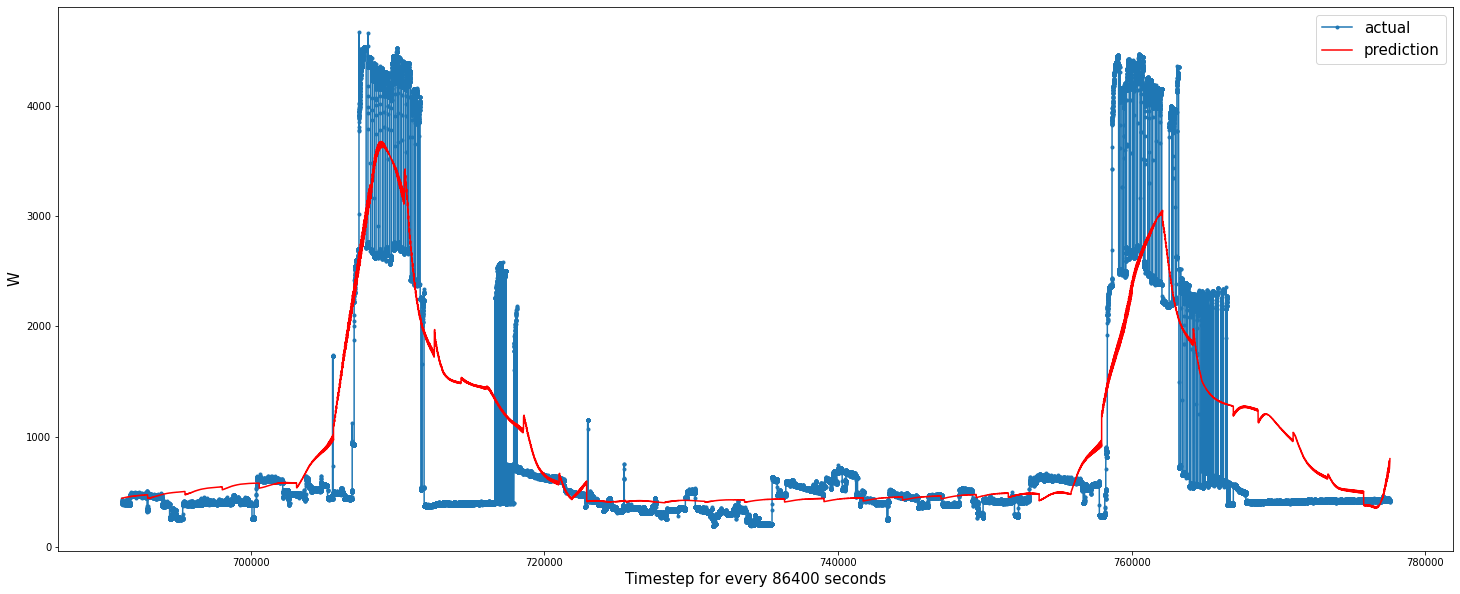

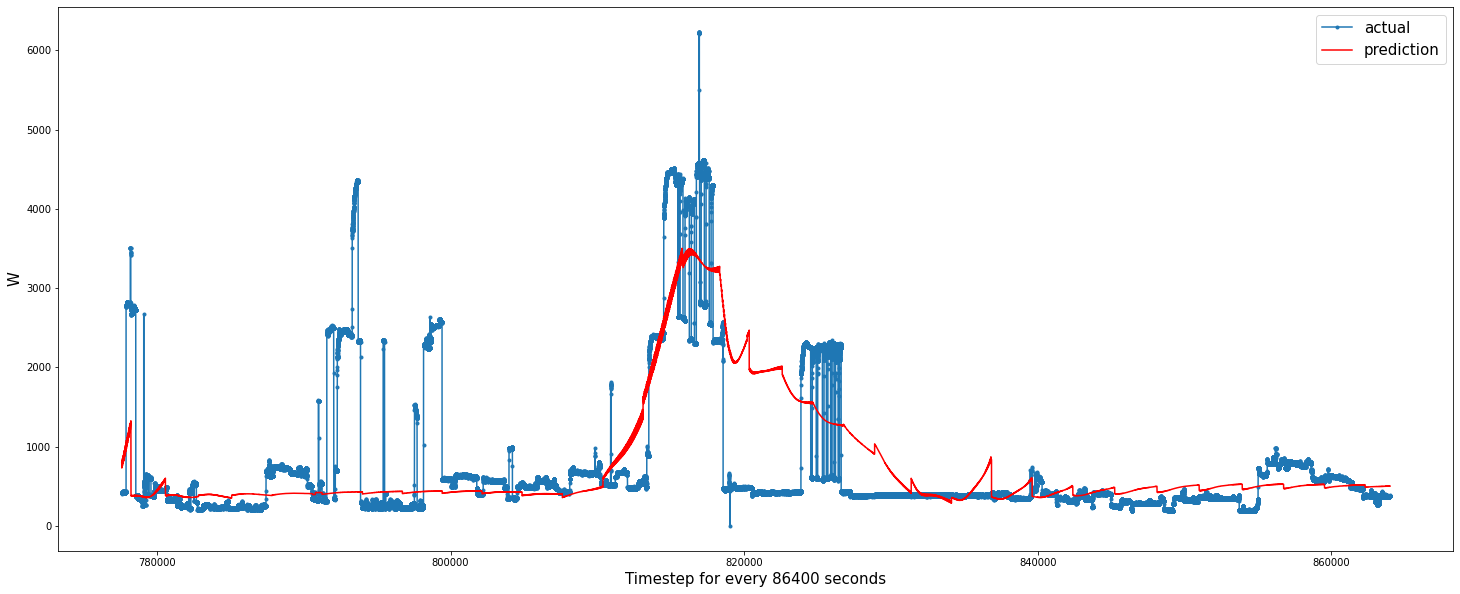

In [71]:
y=0
for i in range(86400,878192,86400):
    aa=[x for x in range(y,i)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, inv_y[y:i], marker='.', label="actual")
    plt.plot(aa, inv_yhat[y:i], 'r', label="prediction")
    y = i
    plt.ylabel(df.columns[0], size=15)
    plt.xlabel('Timestep for every 86400 seconds', size=15)
    plt.legend(fontsize=15)
    plt.show()

In [ ]:
86